<a href="https://colab.research.google.com/github/BusinessAnalyticsHub/Bootcamp_3ed/blob/develop/Grupos%20Tarde/Grupo%203%20-%203DS%20Group/Atividade_entrega_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto Data Science - Grupo 3DS

Foram baixados primeiramente os arquivos de dados telemétricos das cidades de Encantado, Muçum e Santa Tereza, no período de 01/08/2023 a 31/10/2023.
Para o município de Santa Tereza, foram baixados dados de 2 estações: Santa Tereza e Linha José Julio.

Após a primeira reunião com os instrutores, alteramos a coleta de dados para um período de 2 anos.

**Sites Referencia**
- https://www.snirh.gov.br/hidroweb/mapa
- https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime

# Funçoes

In [ ]:
def plotar_matplot4(titulo, labelx, labely, x, y, dataset1, dataset2, dataset3, dataset4, label1, label2, label3, label4, intervalo_data=None):

  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]
      dataset2 = dataset2[(dataset2[x] >= data_inicio) & (dataset2[x] <= data_fim)]
      dataset3 = dataset3[(dataset3[x] >= data_inicio) & (dataset3[x] <= data_fim)]
      dataset4 = dataset4[(dataset4[x] >= data_inicio) & (dataset4[x] <= data_fim)]

  # Plotar os dados com os labels fornecidos
  eixo.plot(x, y, data=dataset1, label=label1, linestyle='-')
  eixo.plot(x, y, data=dataset2, label=label2, linestyle='-')
  eixo.plot(x, y, data=dataset3, label=label3, linestyle='-')
  eixo.plot(x, y, data=dataset4, label=label4, linestyle='-')

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo

In [ ]:
def plotar_1_intervalo(titulo, labelx, labely, x, y, dataset1, label1, intervalo_data=None):

  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]

  # Plotar os dados com os labels fornecidos
  eixo.plot(x, y, data=dataset1, label=label1, linestyle='-')

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo

In [ ]:
def plotar_boxplot(titulo, labelx, labely, x, y, dataset, tipo='linha'):
    # Verificar se o dataset não está vazio
    if dataset.empty:
        print("O dataset está vazio.")
        return

    # Verificar se as colunas especificadas existem no dataset
    if x not in dataset.columns or y not in dataset.columns:
        print(f"As colunas '{x}' e '{y}' devem existir no dataset.")
        return

    fig = plt.figure(figsize=(15, 8))
    eixo = fig.add_axes([0, 0, 1, 1])

    if tipo == 'linha':
        eixo.plot(dataset[x], dataset[y], marker='o', linestyle='-')  # Gráfico de linha com pontos
    elif tipo == 'boxplot':
        # Remover nulos apenas da coluna y
        dataset_cleaned = dataset.dropna(subset=[y])
        eixo.boxplot(dataset_cleaned[y], vert=True)
        eixo.set_xticklabels([labelx])  # Rótulo do eixo x

    # Configurar título e rótulos dos eixos
    eixo.set_title(titulo, fontsize=25, pad=15)
    eixo.set_xlabel(labelx, fontsize=15)
    eixo.set_ylabel(labely, fontsize=15)

    plt.show()

In [ ]:
def plotar_boxplot4(titulo, labelx, labely, x, y, dataset1, dataset2, dataset3, dataset4, label1, label2, label3, label4, intervalo_data=None):
  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]
      dataset2 = dataset2[(dataset2[x] >= data_inicio) & (dataset2[x] <= data_fim)]
      dataset3 = dataset3[(dataset3[x] >= data_inicio) & (dataset3[x] <= data_fim)]
      dataset4 = dataset4[(dataset4[x] >= data_inicio) & (dataset4[x] <= data_fim)]

  # Criar uma lista com os dados para o boxplot, ignorando dados nulos
  dados_boxplot = [
      dataset1[y].dropna().values,
      dataset2[y].dropna().values,
      dataset3[y].dropna().values,
      dataset4[y].dropna().values
  ]

  # Plotar o boxplot
  eixo.boxplot(dados_boxplot, labels=[label1, label2, label3, label4])

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo


In [ ]:
import matplotlib.pyplot as plt

def plotar_chuva_nivel(dataset, titulo, labelx, labely1, labely2, coluna_data, coluna_chuva, coluna_nivel, intervalo_data=None):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dataset[coluna_data], dataset[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dataset[coluna_data], dataset[coluna_chuva], color='g', alpha=0.6, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')

    # Título e legendas
    fig.suptitle(titulo, fontsize=25)  # Removi o parâmetro `pad`
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.show()



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plotar_chuva_nivel_agrupa_ambos(dataset, titulo, labelx, labely1, labely2, coluna_data, coluna_chuva, coluna_nivel, intervalo_data=None, frequencia='D'):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Converter a coluna de data para datetime, caso ainda não esteja
    dataset[coluna_data] = pd.to_datetime(dataset[coluna_data])

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Agrupar por frequência especificada (D - dia, W - semana, M - mês, H - hora)
    dados_agrupados = dataset.resample(frequencia, on=coluna_data).agg({coluna_chuva: 'sum', coluna_nivel: 'mean'}).reset_index()

    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dados_agrupados[coluna_data], dados_agrupados[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dados_agrupados[coluna_data], dados_agrupados[coluna_chuva], color='g', alpha=0.6, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plotar_chuva_nivel_agrupa_chuva(dataset, titulo, labelx, labely1, labely2, coluna_data, coluna_chuva, coluna_nivel, intervalo_data=None, frequencia='D'):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Converter a coluna de data para datetime, caso ainda não esteja
    dataset[coluna_data] = pd.to_datetime(dataset[coluna_data])

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Agrupar os dados de chuva pela frequência especificada (D - dia, W - semana, M - mês, H - hora)
    dados_chuva_agrupados = dataset.resample(frequencia, on=coluna_data).agg({coluna_chuva: 'sum'}).reset_index()

    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dataset[coluna_data], dataset[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dados_chuva_agrupados[coluna_data], dados_chuva_agrupados[coluna_chuva], color='g', alpha=0.6, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')

    # Título e legendas
    fig.suptitle(titulo, fontsize=25)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.show()


In [ ]:
df_Encantado = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86720000-ENCANTADO.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86510000-MUCUM.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472600-SANTA%20TEREZA.csv', encoding='ISO-8859-1', delimiter=';')
df_Lin_JJ = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472000-LINHA%20JOSE%20JULIO.csv', encoding='ISO-8859-1', delimiter=';')

In [ ]:
df_Encantado['Data_Hora'] = pd.to_datetime(df_Encantado['Data'] + ' ' + df_Encantado['Hora'], format='%d/%m/%Y %H:%M:%S')
df_Encantado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071 entries, 0 to 6070
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          6071 non-null   object        
 1   Hora          6071 non-null   object        
 2   Chuva (mm)    6071 non-null   object        
 3   Nível (cm)    6071 non-null   object        
 4   Vazão (m3/s)  3709 non-null   object        
 5   Unnamed: 5    0 non-null      float64       
 6   Data_Hora     6071 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 332.1+ KB


In [ ]:
df_Encantado.head()

Data      Hora      Chuva (mm)        Nível (cm) Vazão (m3/s)  \
0  01/08/2023  02:30:00  0               228                     251.8   
1  01/08/2023  02:45:00  0               228                     251.8   
2  01/08/2023  03:00:00  0               228                     251.8   
3  01/08/2023  03:15:00  0               227                     248.1   
4  01/08/2023  03:30:00  0               227                     248.1   

   Unnamed: 5           Data_Hora  
0         NaN 2023-08-01 02:30:00  
1         NaN 2023-08-01 02:45:00  
2         NaN 2023-08-01 03:00:00  
3         NaN 2023-08-01 03:15:00  
4         NaN 2023-08-01 03:30:00

In [ ]:
df_Encantado.tail()

Data      Hora      Chuva (mm)        Nível (cm) Vazão (m3/s)  \
6066  30/10/2023  23:00:00  0               197                     146.1   
6067  30/10/2023  23:15:00  0               197                     146.1   
6068  30/10/2023  23:30:00  0               197                     146.1   
6069  30/10/2023  23:45:00  0               197                     146.1   
6070  31/10/2023  00:00:00  0               197                     146.1   

      Unnamed: 5           Data_Hora  
6066         NaN 2023-10-30 23:00:00  
6067         NaN 2023-10-30 23:15:00  
6068         NaN 2023-10-30 23:30:00  
6069         NaN 2023-10-30 23:45:00  
6070         NaN 2023-10-31 00:00:00

In [ ]:
'''
#fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

#eixo.scatter(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'])
eixo.plot(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Encantado Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)
'''

"\n#fig = plt.figure(figsize=(15,8))\neixo = fig.add_axes([0,0,1,1])\n\n#eixo.scatter(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'])\neixo.plot(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações\neixo.set_title('Encantado Nivel', fontsize=25, pad=15)\neixo.set_xlabel('Data', fontsize=15)\neixo.set_ylabel('Nivel', fontsize=15)\n"

# Base de dados de 1 ano

## Carregando base de dados

In [ ]:
df_Encantado24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Encantado23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')

In [ ]:
df_Encantado24 = df_Encantado24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Encantado23 = df_Encantado23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Mucum24 = df_Mucum24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Mucum23 = df_Mucum23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Sta_Tereza24 = df_Sta_Tereza24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Sta_Tereza23 = df_Sta_Tereza23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Jose_Julio24 = df_Jose_Julio24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Jose_Julio23 = df_Jose_Julio23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)

In [ ]:
df_Encantado24.head()

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
0  23/10/2024 15:00        0.0      100.0         0.11
1  23/10/2024 14:45        0.0      100.0         0.11
2  23/10/2024 14:30        0.0      100.0         0.11
3  23/10/2024 14:15        0.0       99.0          NaN
4  23/10/2024 14:00        0.0       99.0          NaN

In [ ]:
df_Encantado24.tail()

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
35119  22/10/2023 16:15        NaN        NaN          NaN
35120  22/10/2023 16:00        NaN        NaN          NaN
35121  22/10/2023 15:45        NaN        NaN          NaN
35122  22/10/2023 15:30        NaN        NaN          NaN
35123  22/10/2023 15:15        NaN        NaN          NaN

In [ ]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35124 entries, 0 to 35123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data/Hora    35124 non-null  object 
 1   Chuva(mm)    34991 non-null  float64
 2   Nivel(cm)    25415 non-null  float64
 3   Vazao(m3/s)  26309 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
print('Quantidade de linhas e colunas:', df_Encantado24.shape)
print('Quantidade de dados nulos:', df_Encantado24.isna().sum().sum())

Quantidade de linhas e colunas: (35124, 4)
Quantidade de dados nulos: 18657


## - Alterar Dtype Data/Hora para variavel datetime

In [ ]:
df_Encantado24['Data/Hora'] = pd.to_datetime(df_Encantado24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado23['Data/Hora'] = pd.to_datetime(df_Encantado23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum24['Data/Hora'] = pd.to_datetime(df_Mucum24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum23['Data/Hora'] = pd.to_datetime(df_Mucum23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza24['Data/Hora'] = pd.to_datetime(df_Sta_Tereza24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza23['Data/Hora'] = pd.to_datetime(df_Sta_Tereza23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio24['Data/Hora'] = pd.to_datetime(df_Jose_Julio24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio23['Data/Hora'] = pd.to_datetime(df_Jose_Julio23['Data/Hora'], format='%d/%m/%Y %H:%M')

In [ ]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35124 entries, 0 to 35123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    35124 non-null  datetime64[ns]
 1   Chuva(mm)    34991 non-null  float64       
 2   Nivel(cm)    25415 non-null  float64       
 3   Vazao(m3/s)  26309 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 MB


## - Unindo as bases de dados de 2 anos separados em uma unica base

In [ ]:
df_Encantado_unico = pd.concat([df_Encantado24, df_Encantado23]).drop_duplicates().reset_index(drop=True)
df_Encantado_unico['Data/Hora'] = pd.to_datetime(df_Encantado_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum_unico = pd.concat([df_Mucum24, df_Mucum23]).drop_duplicates().reset_index(drop=True)
df_Mucum_unico['Data/Hora'] = pd.to_datetime(df_Mucum_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza_unico = pd.concat([df_Sta_Tereza24, df_Sta_Tereza23]).drop_duplicates().reset_index(drop=True)
df_Sta_Tereza_unico['Data/Hora'] = pd.to_datetime(df_Sta_Tereza_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio_unico = pd.concat([df_Jose_Julio24, df_Jose_Julio23]).drop_duplicates().reset_index(drop=True)
df_Jose_Julio_unico['Data/Hora'] = pd.to_datetime(df_Jose_Julio_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    62248 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


In [ ]:
df_Encantado_sem_trat = pd.concat([df_Encantado24, df_Encantado23]).drop_duplicates().reset_index(drop=True)
df_Encantado_sem_trat['Data/Hora'] = pd.to_datetime(df_Encantado_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum_sem_trat = pd.concat([df_Mucum24, df_Mucum23]).drop_duplicates().reset_index(drop=True)
df_Mucum_sem_trat['Data/Hora'] = pd.to_datetime(df_Mucum_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza_sem_trat = pd.concat([df_Sta_Tereza24, df_Sta_Tereza23]).drop_duplicates().reset_index(drop=True)
df_Sta_Tereza_sem_trat['Data/Hora'] = pd.to_datetime(df_Sta_Tereza_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio_sem_trat = pd.concat([df_Jose_Julio24, df_Jose_Julio23]).drop_duplicates().reset_index(drop=True)
df_Jose_Julio_sem_trat['Data/Hora'] = pd.to_datetime(df_Jose_Julio_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado_sem_trat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    62248 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


In [ ]:
df_Mucum_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69397 entries, 0 to 69396
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    69397 non-null  datetime64[ns]
 1   Chuva(mm)    69201 non-null  float64       
 2   Nivel(cm)    68913 non-null  float64       
 3   Vazao(m3/s)  68913 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.1 MB


In [ ]:
df_Mucum_sem_trat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69397 entries, 0 to 69396
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    69397 non-null  datetime64[ns]
 1   Chuva(mm)    69201 non-null  float64       
 2   Nivel(cm)    68913 non-null  float64       
 3   Vazao(m3/s)  68913 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.1 MB


In [ ]:
df_Sta_Tereza_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37003 entries, 0 to 37002
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    37003 non-null  datetime64[ns]
 1   Chuva(mm)    36961 non-null  float64       
 2   Nivel(cm)    36870 non-null  float64       
 3   Vazao(m3/s)  0 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 MB


In [ ]:
df_Jose_Julio_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67289 entries, 0 to 67288
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    67289 non-null  datetime64[ns]
 1   Chuva(mm)    66981 non-null  float64       
 2   Nivel(cm)    55443 non-null  float64       
 3   Vazao(m3/s)  55443 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.1 MB


In [ ]:
df_Encantado_unico.head()

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
0 2024-10-23 15:00:00        0.0      100.0         0.11
1 2024-10-23 14:45:00        0.0      100.0         0.11
2 2024-10-23 14:30:00        0.0      100.0         0.11
3 2024-10-23 14:15:00        0.0       99.0          NaN
4 2024-10-23 14:00:00        0.0       99.0          NaN

In [ ]:
df_Encantado_unico.tail()

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
64809 2022-10-22 16:15:00        0.0      223.0        233.2
64810 2022-10-22 16:00:00        0.0      224.0        236.9
64811 2022-10-22 15:45:00        0.0      226.0        244.3
64812 2022-10-22 15:30:00        0.0      226.0        244.3
64813 2022-10-22 15:15:00        0.0      227.0        248.1

# Vasão

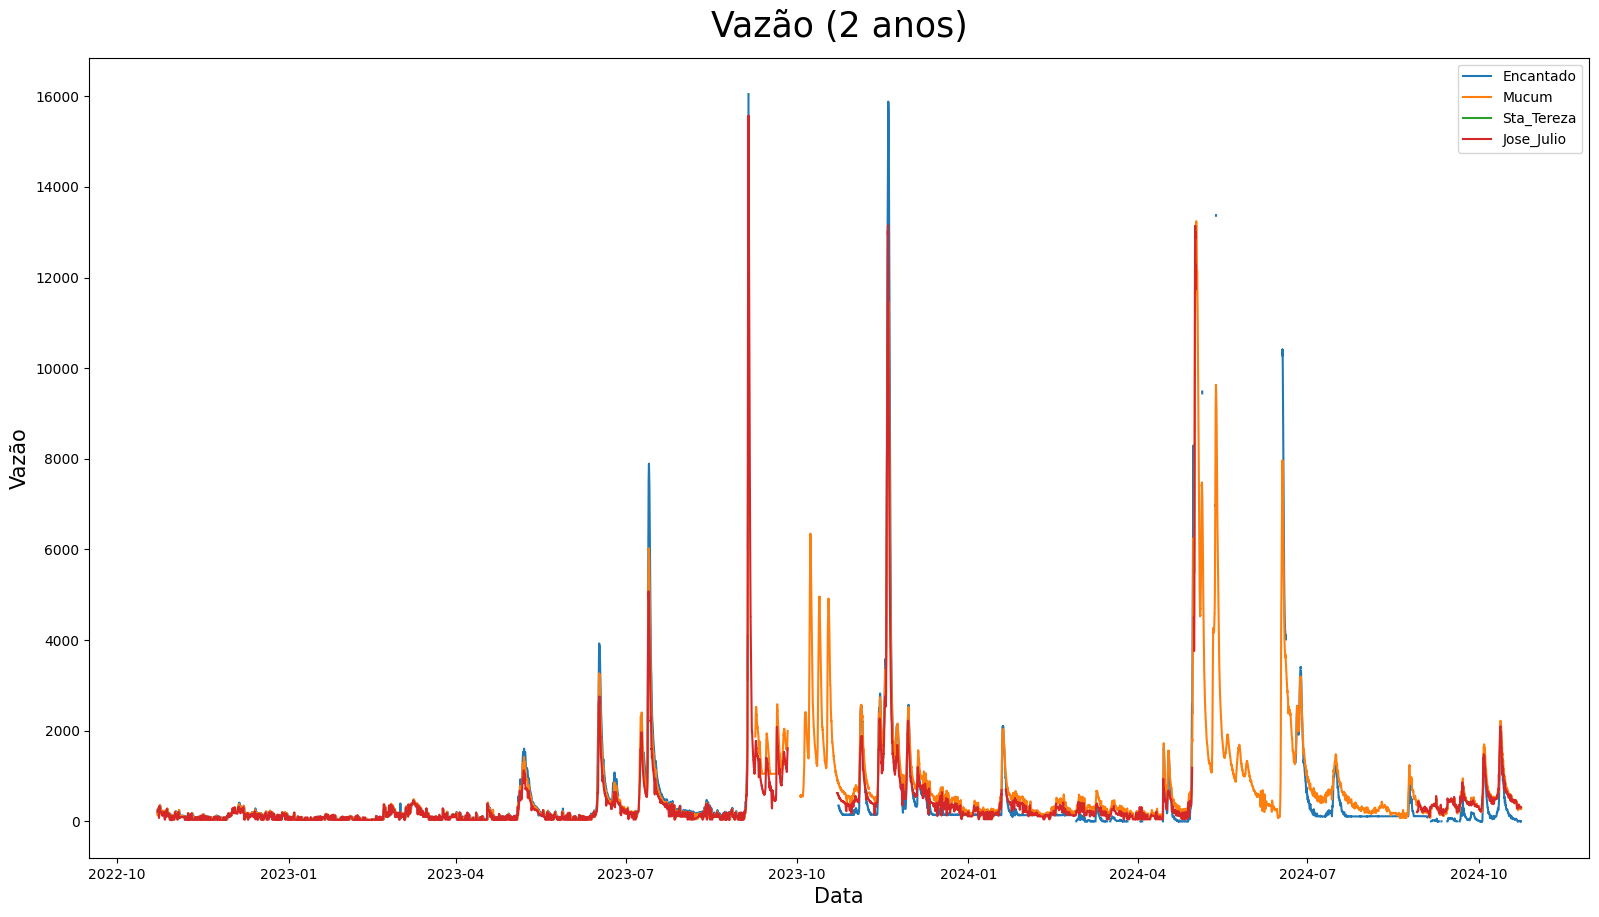

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-10-17')
data_fim = pd.to_datetime('2024-12-21')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão (2 anos)', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

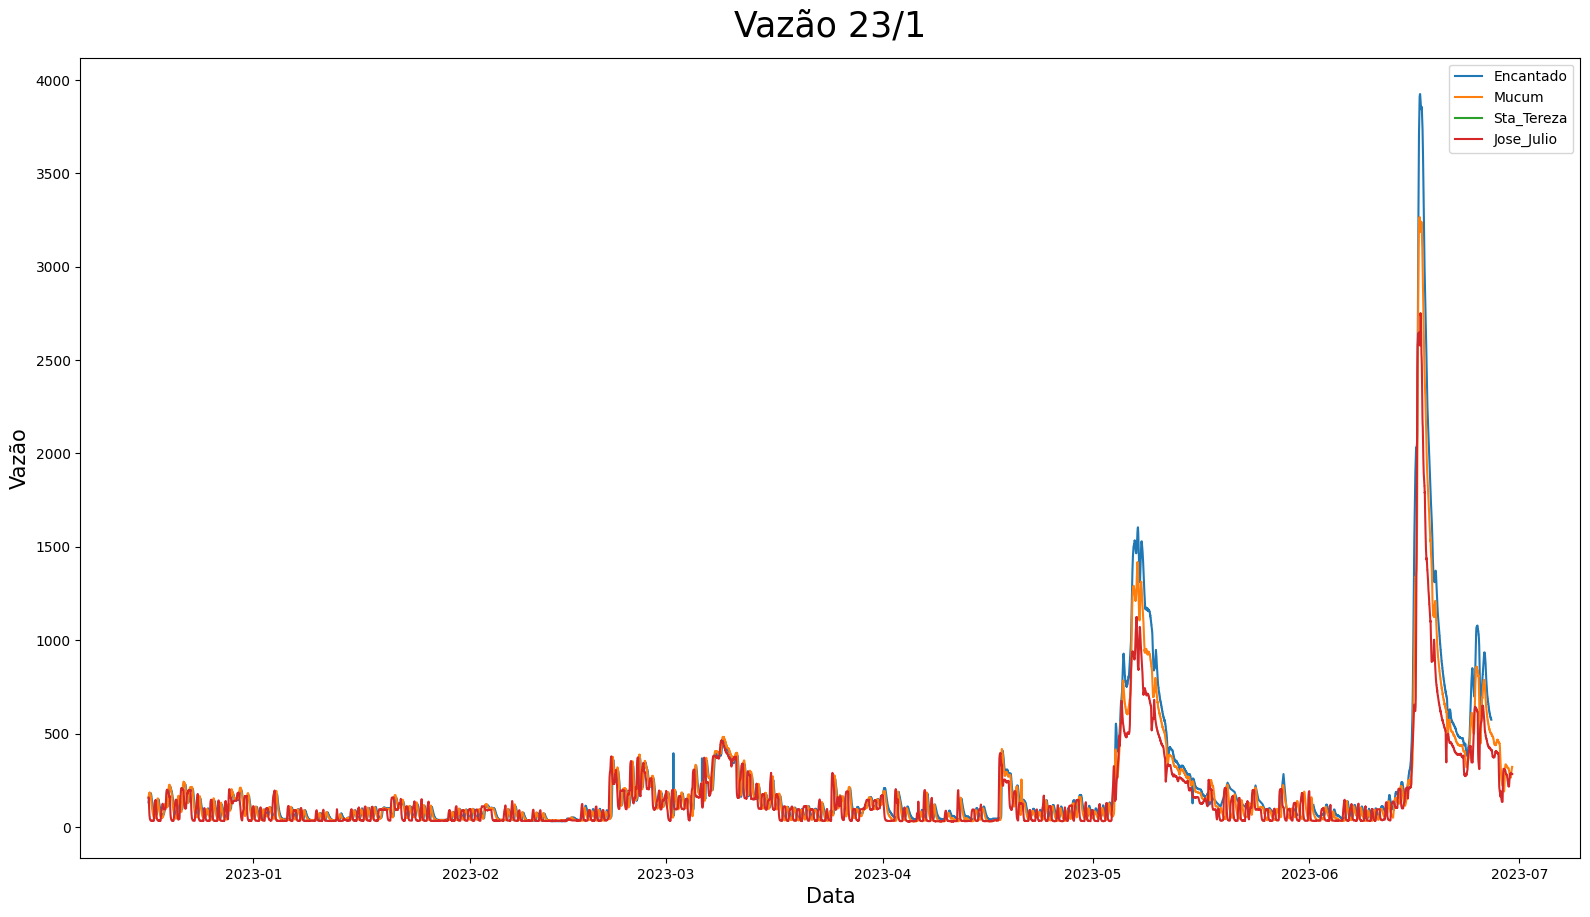

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-12-17')
data_fim = pd.to_datetime('2023-06-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 23/1', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

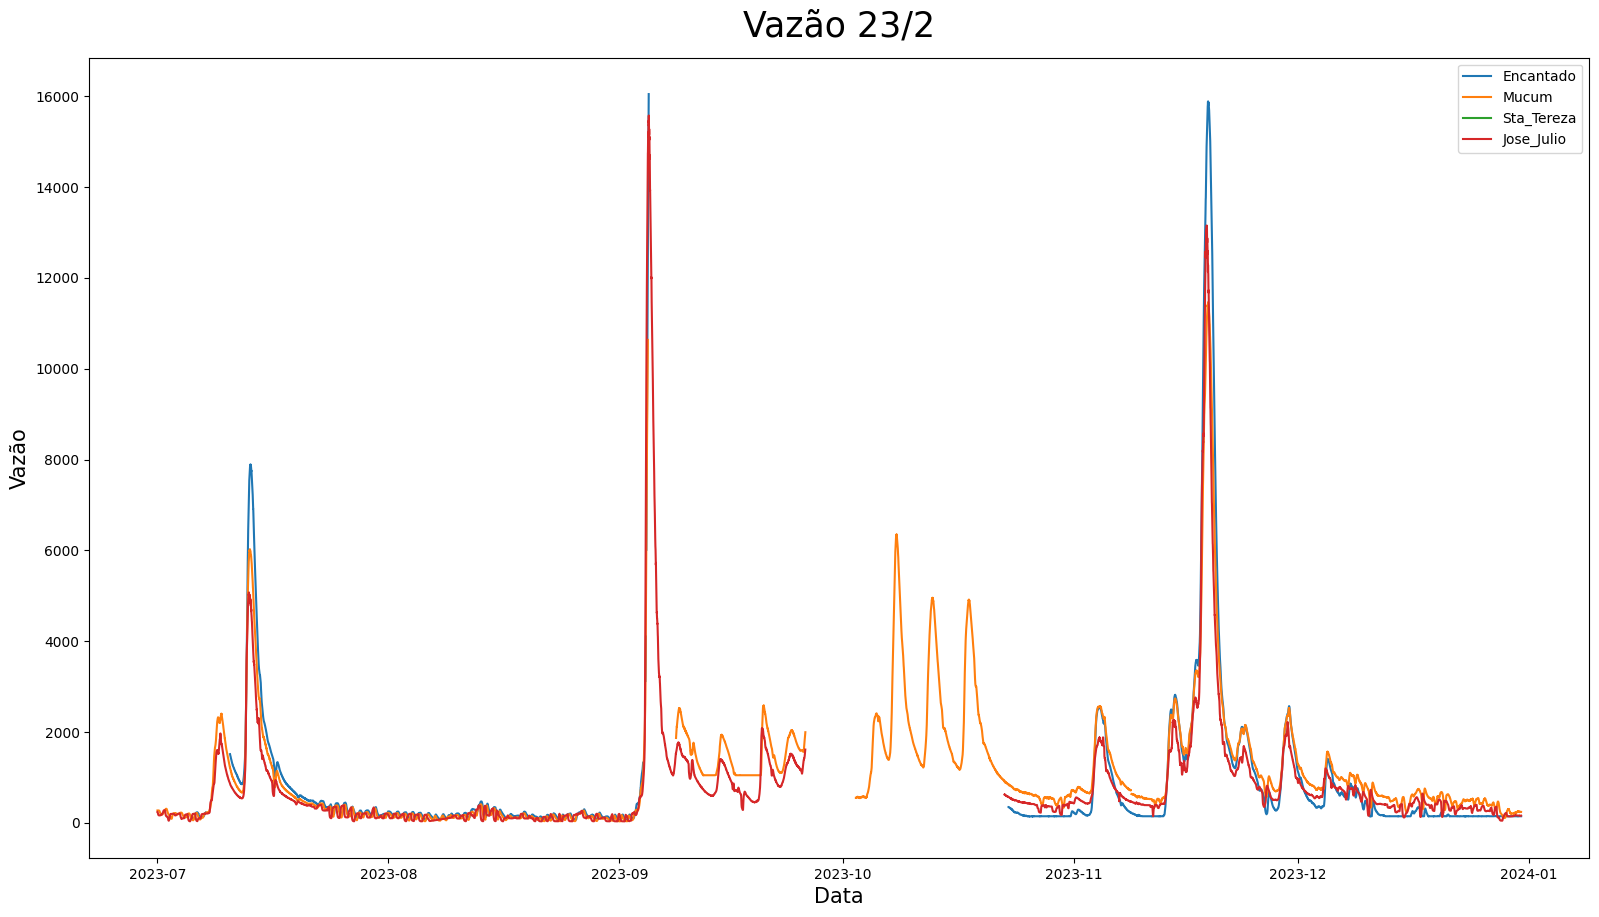

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-7-01')
data_fim = pd.to_datetime('2023-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 23/2', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

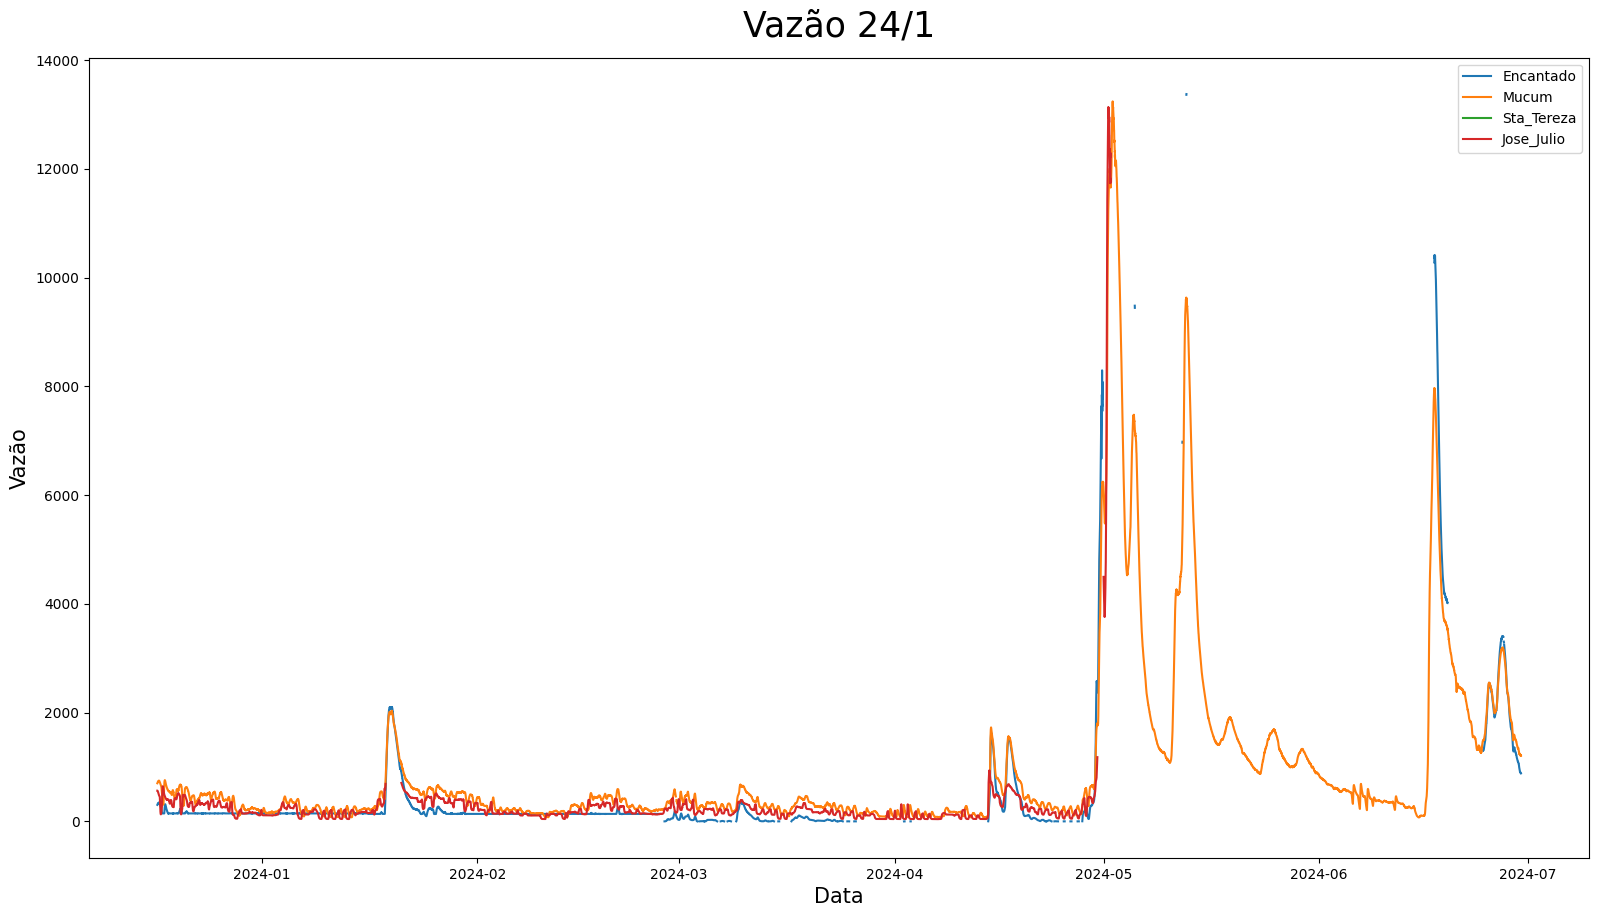

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-17')
data_fim = pd.to_datetime('2024-06-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 24/1', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

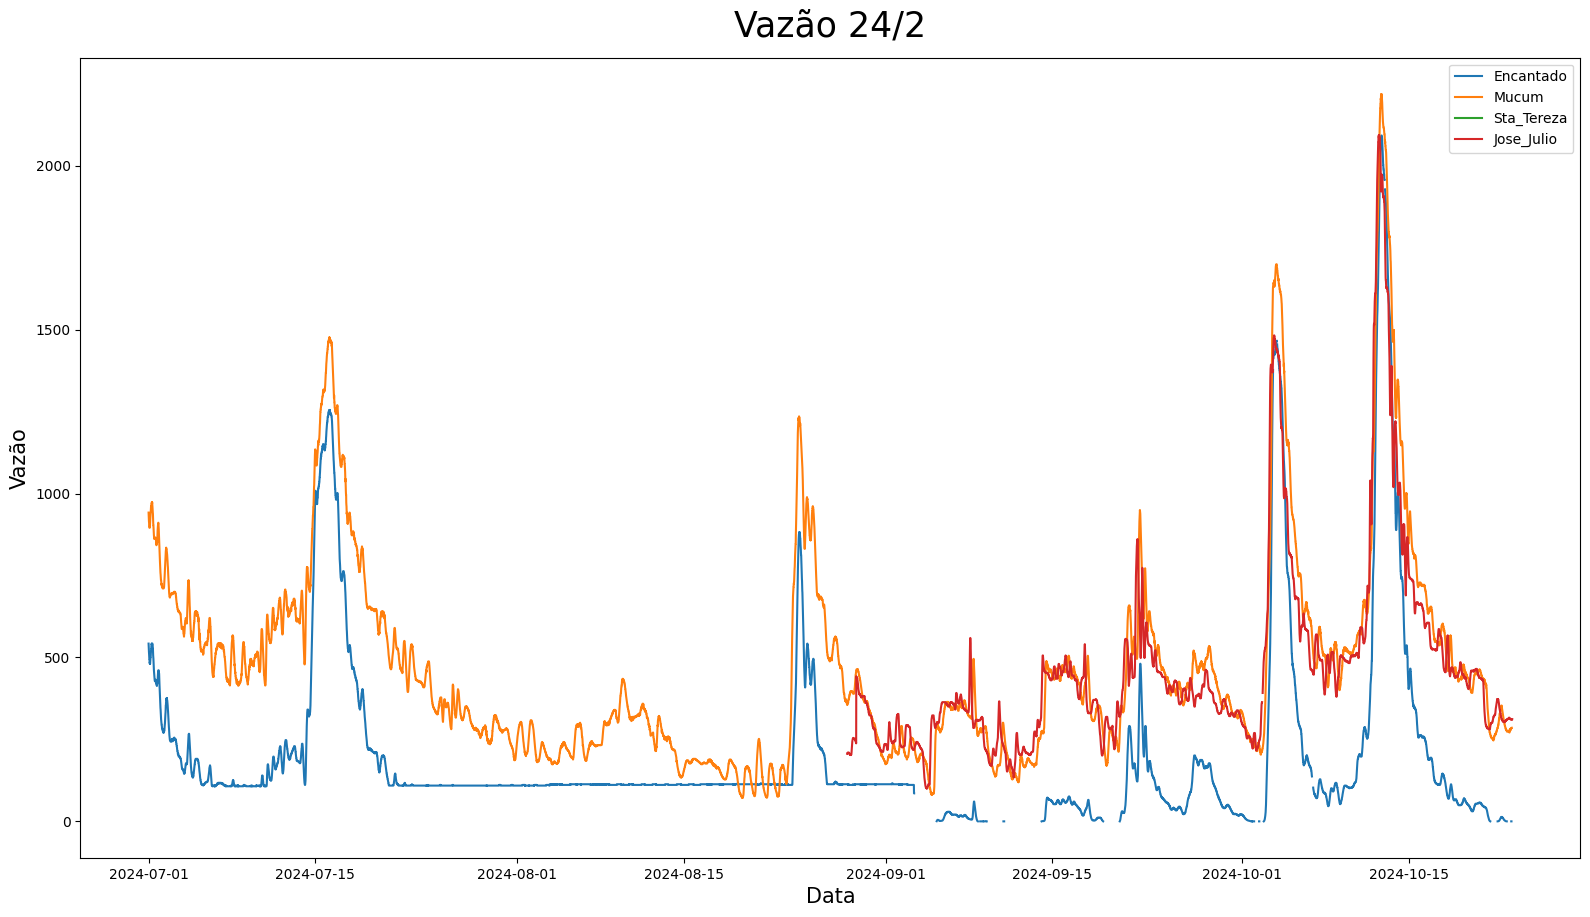

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-7-01')
data_fim = pd.to_datetime('2024-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 24/2', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

# Tratamento de dados chuva

In [ ]:
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    62248 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


Para chuva vamos substituir valores nulos por zeros

In [ ]:
'''
df_Encantado_unico['Chuva(mm)'] = df_Encantado_unico['Chuva(mm)'].fillna(0)
df_Mucum_unico['Chuva(mm)'] = df_Mucum_unico['Chuva(mm)'].fillna(0)
df_Sta_Tereza_unico['Chuva(mm)'] = df_Sta_Tereza_unico['Chuva(mm)'].fillna(0)
df_Jose_Julio_unico['Chuva(mm)'] = df_Jose_Julio_unico['Chuva(mm)'].fillna(0)
'''

"\ndf_Encantado_unico['Chuva(mm)'] = df_Encantado_unico['Chuva(mm)'].fillna(0)\ndf_Mucum_unico['Chuva(mm)'] = df_Mucum_unico['Chuva(mm)'].fillna(0)\ndf_Sta_Tereza_unico['Chuva(mm)'] = df_Sta_Tereza_unico['Chuva(mm)'].fillna(0)\ndf_Jose_Julio_unico['Chuva(mm)'] = df_Jose_Julio_unico['Chuva(mm)'].fillna(0)\n"

para vazão vamos interpolar os valores nulos (descontinuado)



In [ ]:
df_Encantado_unico['Chuva(mm)'] = df_Encantado_unico['Chuva(mm)'].interpolate(method='linear')
df_Mucum_unico['Chuva(mm)'] = df_Mucum_unico['Chuva(mm)'].interpolate(method='linear')
df_Sta_Tereza_unico['Chuva(mm)'] = df_Sta_Tereza_unico['Chuva(mm)'].interpolate(method='linear')
df_Jose_Julio_unico['Chuva(mm)'] = df_Jose_Julio_unico['Chuva(mm)'].interpolate(method='linear')

In [ ]:
'''
df_Encantado_unico['Vazao(m3/s)'] = df_Encantado_unico['Vazao(m3/s)'].interpolate(method='linear')
df_Mucum_unico['Vazao(m3/s)'] = df_Mucum_unico['Vazao(m3/s)'].interpolate(method='linear')
df_Sta_Tereza_unico['Vazao(m3/s)'] = df_Sta_Tereza_unico['Vazao(m3/s)'].interpolate(method='linear')
df_Jose_Julio_unico['Vazao(m3/s)'] = df_Jose_Julio_unico['Vazao(m3/s)'].interpolate(method='linear')
'''

"\ndf_Encantado_unico['Vazao(m3/s)'] = df_Encantado_unico['Vazao(m3/s)'].interpolate(method='linear')\ndf_Mucum_unico['Vazao(m3/s)'] = df_Mucum_unico['Vazao(m3/s)'].interpolate(method='linear')\ndf_Sta_Tereza_unico['Vazao(m3/s)'] = df_Sta_Tereza_unico['Vazao(m3/s)'].interpolate(method='linear')\ndf_Jose_Julio_unico['Vazao(m3/s)'] = df_Jose_Julio_unico['Vazao(m3/s)'].interpolate(method='linear')\n"

conferir se sobrou algum valor nulo para chuva e vazão

In [ ]:
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    64814 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


# SHIFT

Para remover os valores nulos do Nivel da agua nos 4 pontos de coleta de dados será necessario fazer uma combinação dos valores faltantes de cada cidade com os valores existentes das outras.

Mas para isto é necessario fazer os valores não ter difereça de data pois cada cidade atinge o maximo em tempos diferentes e cada medidor possui um ponto de referencia diferente.

*   Deslocar a data
*   Fazer que tenha niveis semelhantes



In [ ]:
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    64814 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


## Pré deslocamento

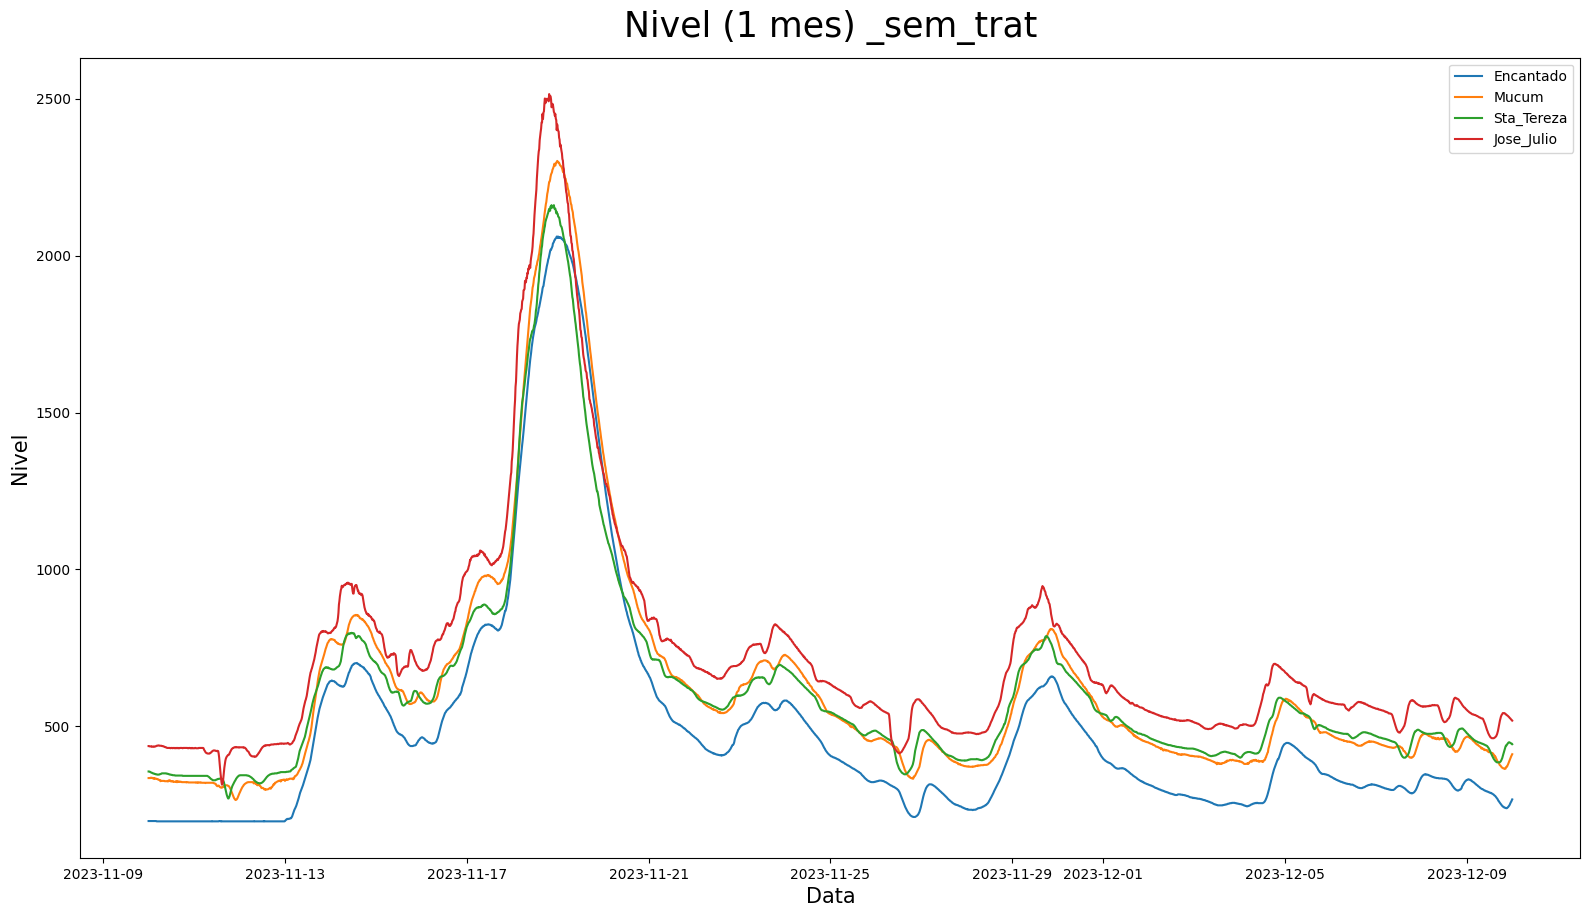

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (1 mes) _sem_trat', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_sem_trat, df_Mucum_sem_trat, df_Sta_Tereza_sem_trat, df_Jose_Julio_sem_trat,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

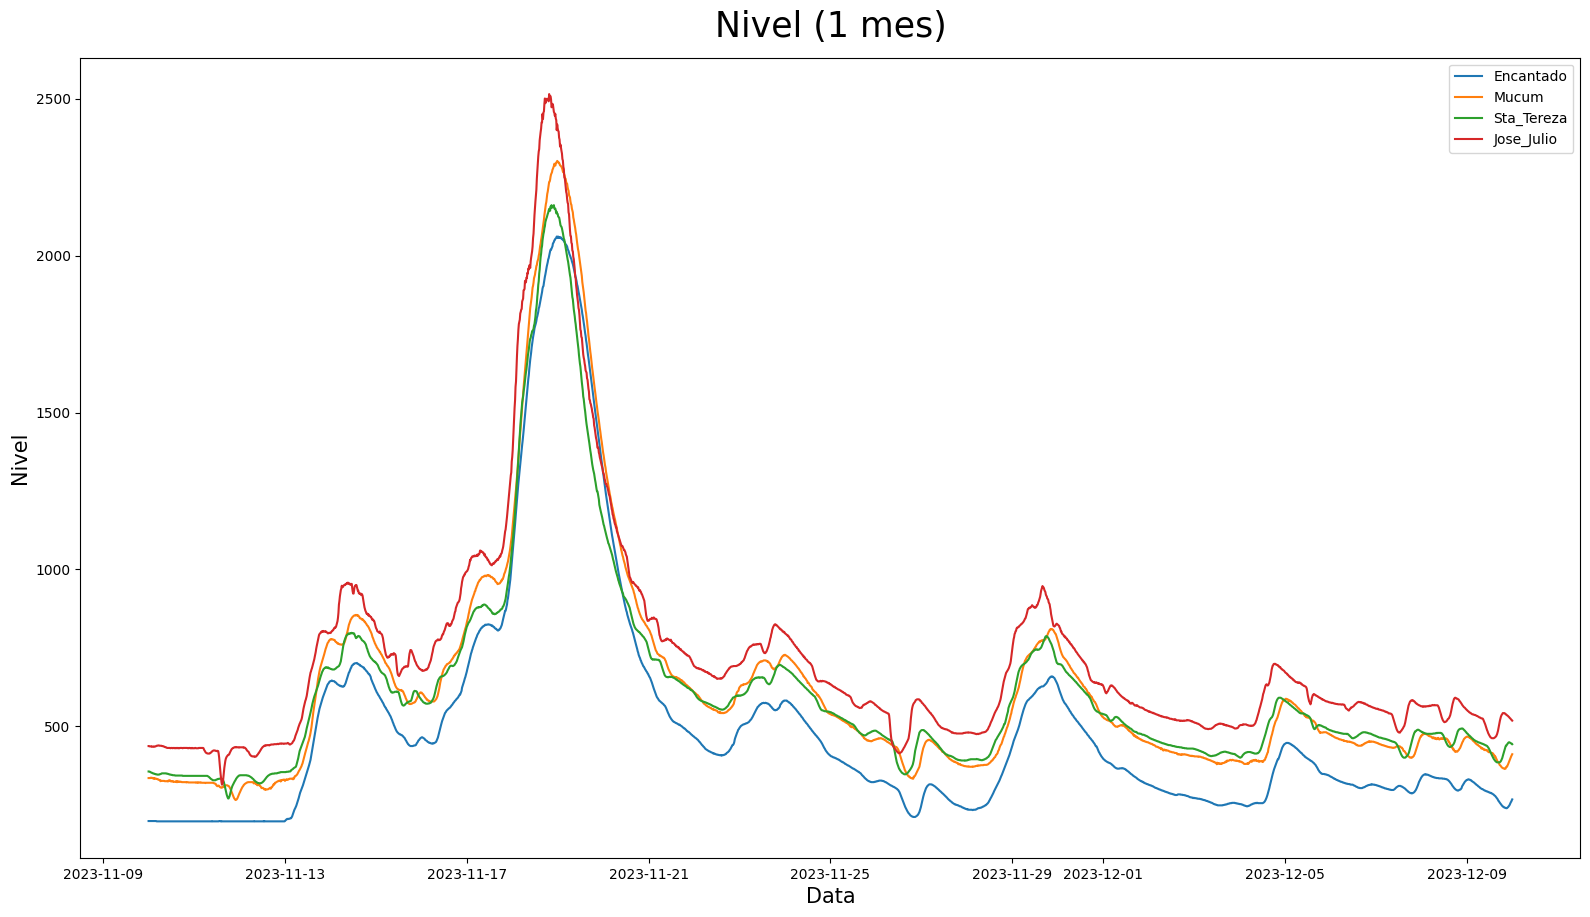

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (1 mes)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

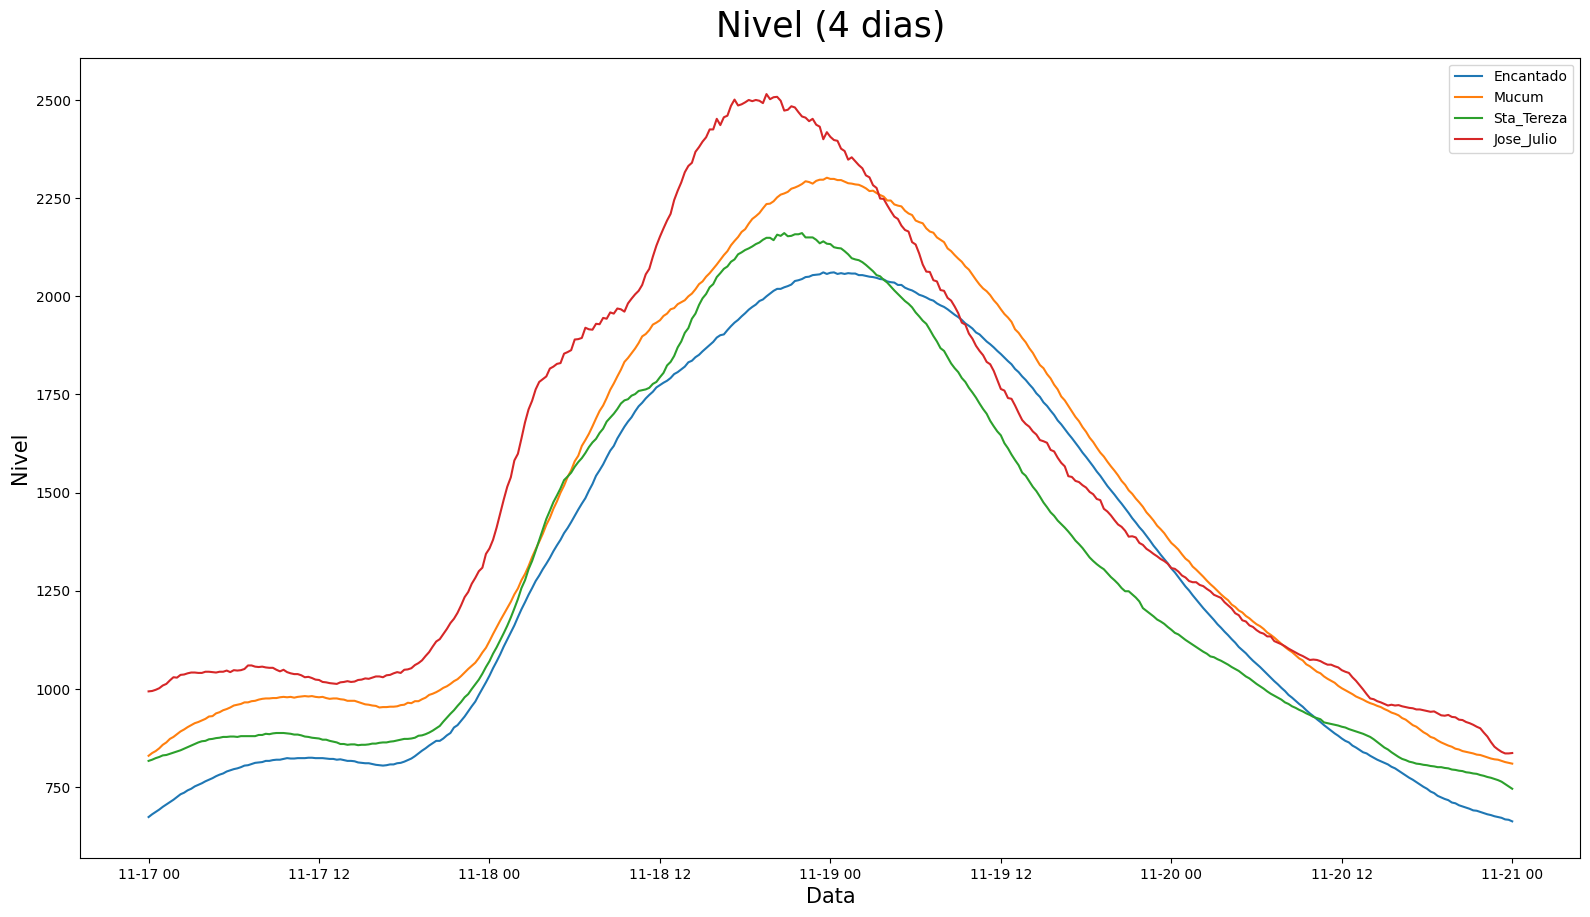

In [ ]:
39# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-17')
data_fim = pd.to_datetime('2023-11-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (4 dias)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

## Deslocamento a partir da data

ao deslocar as datas temos que remover as extremidades pois ficaremos com valores das datas nulos

In [ ]:
import pandas as pd

def deslocar_data_series(tabela1, tabela2, tabela3, tabela4, coluna_data, shift1=0, shift2=0, shift3=0, shift4=0):
    """
    Desloca a coluna de data em cada tabela de acordo com os valores de shift fornecidos
    e remove valores nulos nas extremidades para manter todas as tabelas alinhadas.

    Parâmetros:
    - tabela1, tabela2, tabela3, tabela4: tabelas de dados pandas DataFrame.
    - coluna_data: nome da coluna de data.
    - shift1, shift2, shift3, shift4: valores de deslocamento para cada tabela (em unidades de linha).

    Retorna:
    - Quatro tabelas alinhadas e sem valores nulos nas extremidades.
    """

    # Aplicar os deslocamentos na coluna de data em cada tabela
    tabela1[coluna_data] = tabela1[coluna_data].shift(shift1)
    tabela2[coluna_data] = tabela2[coluna_data].shift(shift2)
    tabela3[coluna_data] = tabela3[coluna_data].shift(shift3)
    tabela4[coluna_data] = tabela4[coluna_data].shift(shift4)

    # Sincronizar os índices removendo valores nulos das extremidades, com base no maior deslocamento
    max_shift = max(shift1, shift2, shift3, shift4)
    min_shift = min(shift1, shift2, shift3, shift4)

    # Recortar todas as tabelas para o mesmo intervalo de dados, removendo extremidades com nulos
    tabela1 = tabela1.iloc[max_shift:min_shift].reset_index(drop=True)
    tabela2 = tabela2.iloc[max_shift:min_shift].reset_index(drop=True)
    tabela3 = tabela3.iloc[max_shift:min_shift].reset_index(drop=True)
    tabela4 = tabela4.iloc[max_shift:min_shift].reset_index(drop=True)

    return tabela1, tabela2, tabela3, tabela4

In [ ]:
# Definir os deslocamentos específicos para cada tabela
# shift1, shift2, shift3, shift4 = -12, -12, 7, 15
shift1, shift2, shift3, shift4 = -1, -1, 7, 15

# Alinhar as tabelas
df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico = deslocar_data_series(
    df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
    coluna_data='Data/Hora',
    shift1=shift1, shift2=shift2, shift3=shift3, shift4=shift4
)

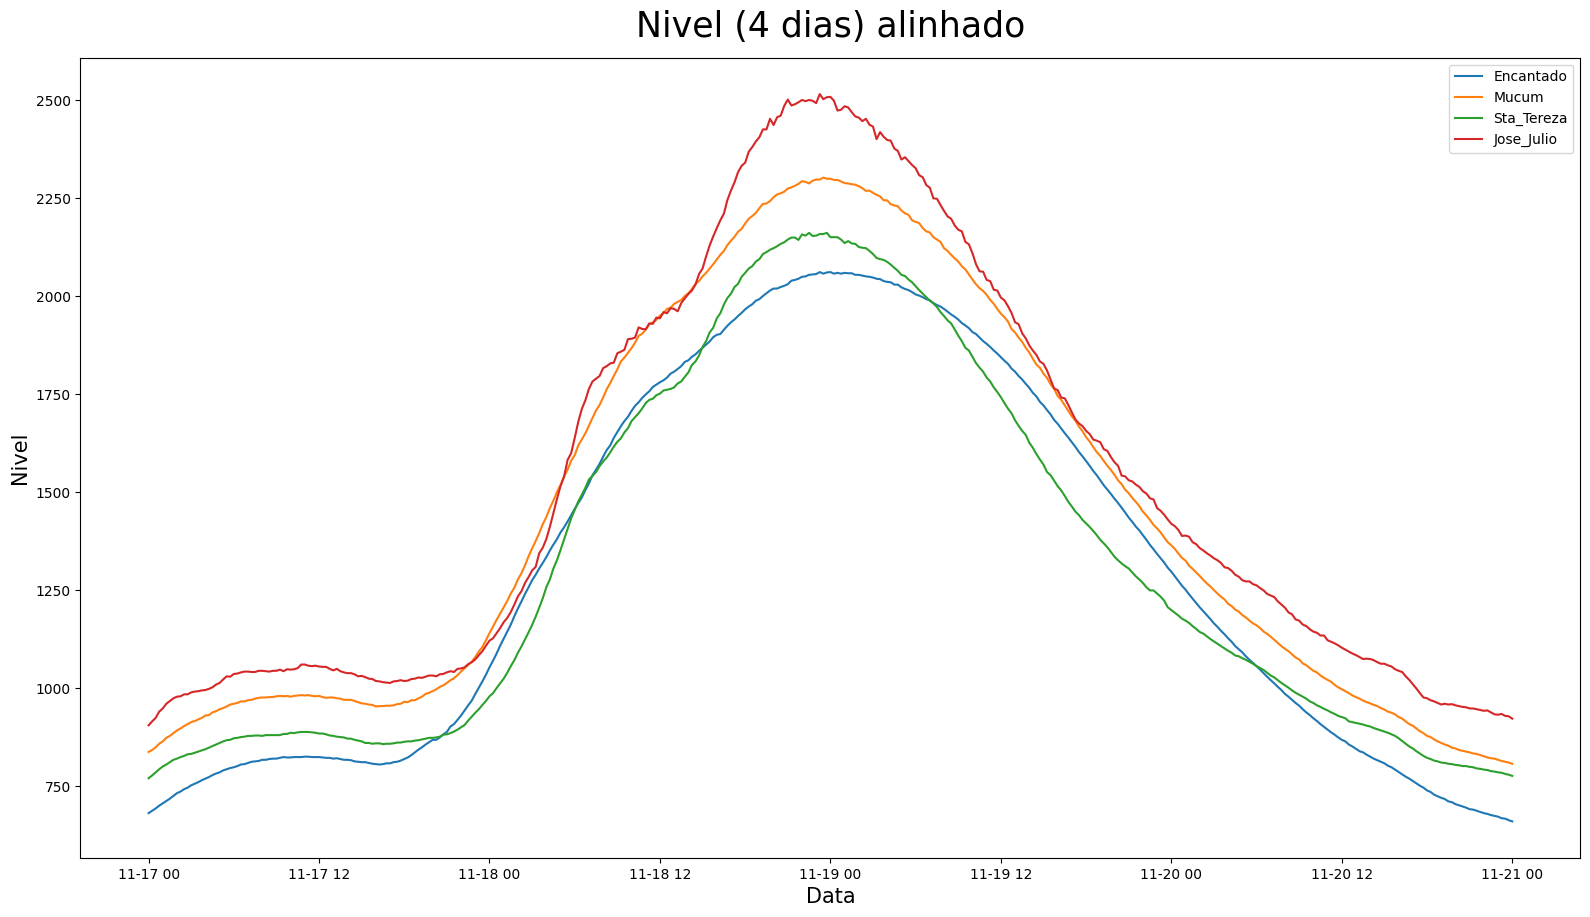

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-17')
data_fim = pd.to_datetime('2023-11-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (4 dias) alinhado', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64798 entries, 0 to 64797
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64798 non-null  datetime64[ns]
 1   Chuva(mm)    64798 non-null  float64       
 2   Nivel(cm)    52702 non-null  float64       
 3   Vazao(m3/s)  53608 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


- Confirmando se os dados das extremidades foram removidos

In [ ]:
df_Jose_Julio_unico.head(21)

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
0  2024-10-23 16:30:00        0.0      397.0       312.04
1  2024-10-23 16:15:00        0.0      397.0       312.04
2  2024-10-23 16:00:00        0.0      397.0       312.04
3  2024-10-23 15:45:00        0.0      398.0       314.34
4  2024-10-23 15:30:00        0.0      398.0       314.34
5  2024-10-23 15:15:00        0.0      398.0       314.34
6  2024-10-23 15:00:00        0.0      398.0       314.34
7  2024-10-23 14:45:00        0.0      398.0       314.34
8  2024-10-23 14:30:00        0.0      398.0       314.34
9  2024-10-23 14:15:00        0.0      398.0       314.34
10 2024-10-23 14:00:00        0.0      399.0       316.64
11 2024-10-23 13:45:00        0.0      398.0       314.34
12 2024-10-23 13:30:00        0.0      398.0       314.34
13 2024-10-23 13:15:00        0.0      398.0       314.34
14 2024-10-23 13:00:00        0.0      398.0       314.34
15 2024-10-23 12:45:00        0.0      398.0       314.34
16 2024-10-23 12:30:00        0.0      398.0       314.34
17 2024-10-23 12:15:00        0.0      398.0       314.34
18 2024-10-23 12:00:00        0.0      397.0       312.04
19 2024-10-23 11:45:00        0.0      397.0       312.04
20 2024-10-23 11:30:00        0.0      397.0       312.04

In [ ]:
df_Sta_Tereza_unico.head(21)

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
0  2024-10-23 13:30:00        0.0      258.0          NaN
1  2024-10-23 13:15:00        0.0      258.0          NaN
2  2024-10-23 13:00:00        0.0      258.0          NaN
3  2024-10-23 12:45:00        0.0      258.0          NaN
4  2024-10-23 12:30:00        0.0      258.0          NaN
5  2024-10-23 12:15:00        0.0      257.0          NaN
6  2024-10-23 12:00:00        0.0      257.0          NaN
7  2024-10-23 11:45:00        0.0      257.0          NaN
8  2024-10-23 11:30:00        0.0      257.0          NaN
9  2024-10-23 11:15:00        0.0      257.0          NaN
10 2024-10-23 11:00:00        0.0      257.0          NaN
11 2024-10-23 10:45:00        0.0      257.0          NaN
12 2024-10-23 10:30:00        0.0      256.0          NaN
13 2024-10-23 10:15:00        0.0      256.0          NaN
14 2024-10-23 10:00:00        0.0      256.0          NaN
15 2024-10-23 09:45:00        0.0      256.0          NaN
16 2024-10-23 09:30:00        0.0      256.0          NaN
17 2024-10-23 09:15:00        0.0      256.0          NaN
18 2024-10-23 09:00:00        0.0      255.0          NaN
19 2024-10-23 08:45:00        0.0      255.0          NaN
20 2024-10-23 08:30:00        0.0      255.0          NaN

In [ ]:
df_Mucum_unico.tail(21)

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
69360 2022-10-22 20:30:00        0.0      182.0        164.5
69361 2022-10-22 20:15:00        0.0      177.0        154.8
69362 2022-10-22 20:00:00        0.0      172.0        145.5
69363 2022-10-22 19:45:00        0.0      169.0        140.0
69364 2022-10-22 19:30:00        0.0      166.0        134.6
69365 2022-10-22 19:15:00        0.0      165.0        132.9
69366 2022-10-22 19:00:00        0.0      164.0        131.1
69367 2022-10-22 18:45:00        0.0      165.0        132.9
69368 2022-10-22 18:30:00        0.0      166.0        134.6
69369 2022-10-22 18:15:00        0.0      167.0        136.4
69370 2022-10-22 18:00:00        0.0      169.0        140.0
69371 2022-10-22 17:45:00        0.0      172.0        145.5
69372 2022-10-22 17:30:00        0.0      174.0        149.2
69373 2022-10-22 17:15:00        0.0      177.0        154.8
69374 2022-10-22 17:00:00        0.0      180.0        160.6
69375 2022-10-22 16:45:00        0.0      182.0        164.5
69376 2022-10-22 16:30:00        0.0      185.0        170.4
69377 2022-10-22 16:15:00        0.0      188.0        176.4
69378 2022-10-22 16:00:00        0.0      191.0        182.5
69379 2022-10-22 15:45:00        0.0      194.0        188.7
69380 2022-10-22 15:30:00        0.0      197.0        195.1

In [ ]:
df_Encantado_unico.tail(21)

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
64777 2022-10-22 20:15:00        0.0      201.0        158.4
64778 2022-10-22 20:00:00        0.0      202.0        161.5
64779 2022-10-22 19:45:00        0.0      203.0        164.6
64780 2022-10-22 19:30:00        0.0      204.0        167.8
64781 2022-10-22 19:15:00        0.0      206.0        174.3
64782 2022-10-22 19:00:00        0.0      207.0        177.5
64783 2022-10-22 18:45:00        0.0      208.0        180.8
64784 2022-10-22 18:30:00        0.0      210.0        187.5
64785 2022-10-22 18:15:00        0.0      211.0        190.8
64786 2022-10-22 18:00:00        0.0      213.0        197.6
64787 2022-10-22 17:45:00        0.0      214.0        201.1
64788 2022-10-22 17:30:00        0.0      215.0        204.6
64789 2022-10-22 17:15:00        0.0      217.0        211.6
64790 2022-10-22 17:00:00        0.0      218.0        215.1
64791 2022-10-22 16:45:00        0.0      220.0        222.2
64792 2022-10-22 16:30:00        0.0      221.0        225.9
64793 2022-10-22 16:15:00        0.0      222.0        229.5
64794 2022-10-22 16:00:00        0.0      223.0        233.2
64795 2022-10-22 15:45:00        0.0      224.0        236.9
64796 2022-10-22 15:30:00        0.0      226.0        244.3
64797 2022-10-22 15:15:00        0.0      226.0        244.3

## Deslocamento dos dados em relação do nivel

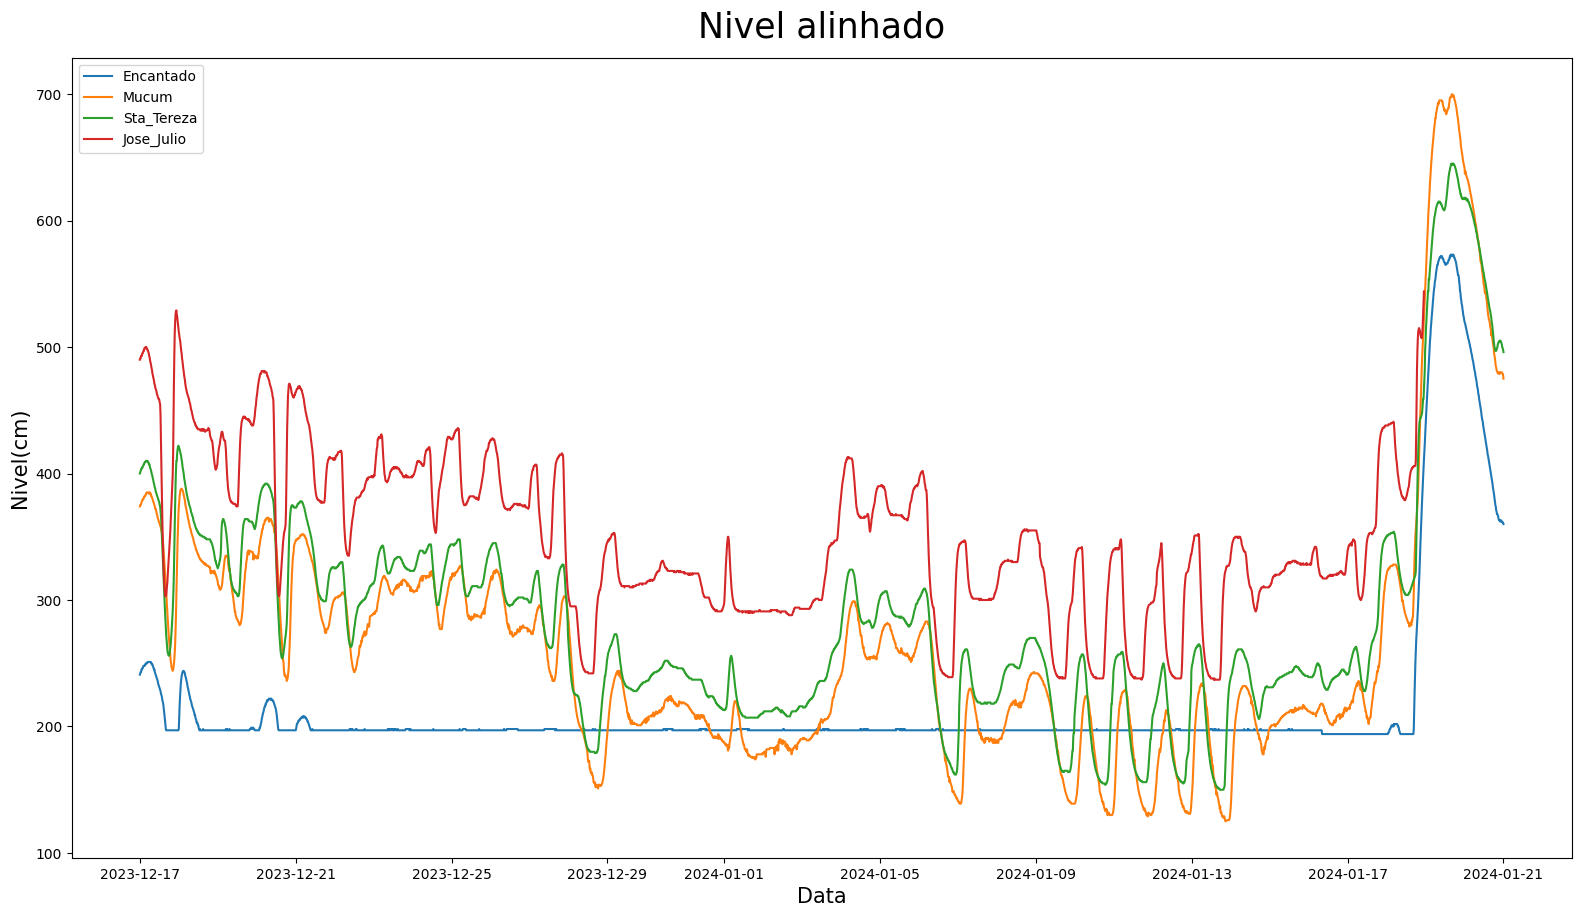

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-17')
data_fim = pd.to_datetime('2024-01-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel alinhado', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

no grafico aciima notamos que os valores não tem diferença em questão temporal mas vemoz que possuem niveis diferentes

- Os Valores abaixo são para eles terem uma diferença geral semelhante

In [ ]:
df_Encantado_unico['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'] + 180
df_Mucum_unico['Nivel(cm)'] = df_Mucum_unico['Nivel(cm)'] + 70
df_Sta_Tereza_unico['Nivel(cm)'] = df_Sta_Tereza_unico['Nivel(cm)'] + 50
df_Jose_Julio_unico['Nivel(cm)'] = df_Jose_Julio_unico['Nivel(cm)'] - 40

- Os graficos abaixo foram separados em faixa de 6 meses para facilitar a visualização

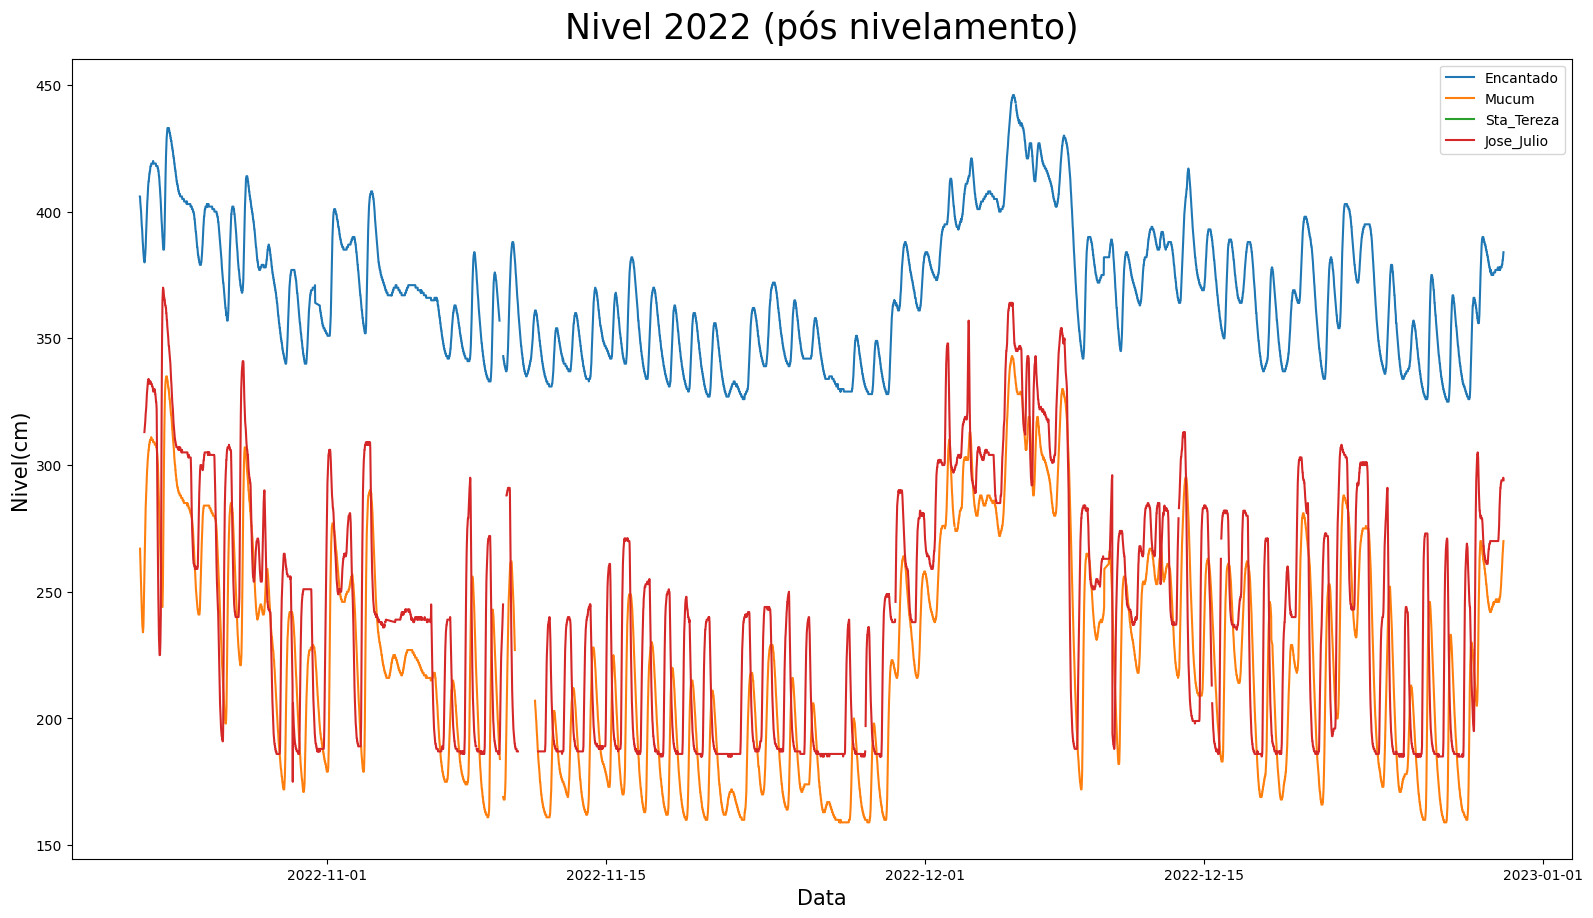

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-06-1')
data_fim = pd.to_datetime('2022-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2022 (pós nivelamento)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

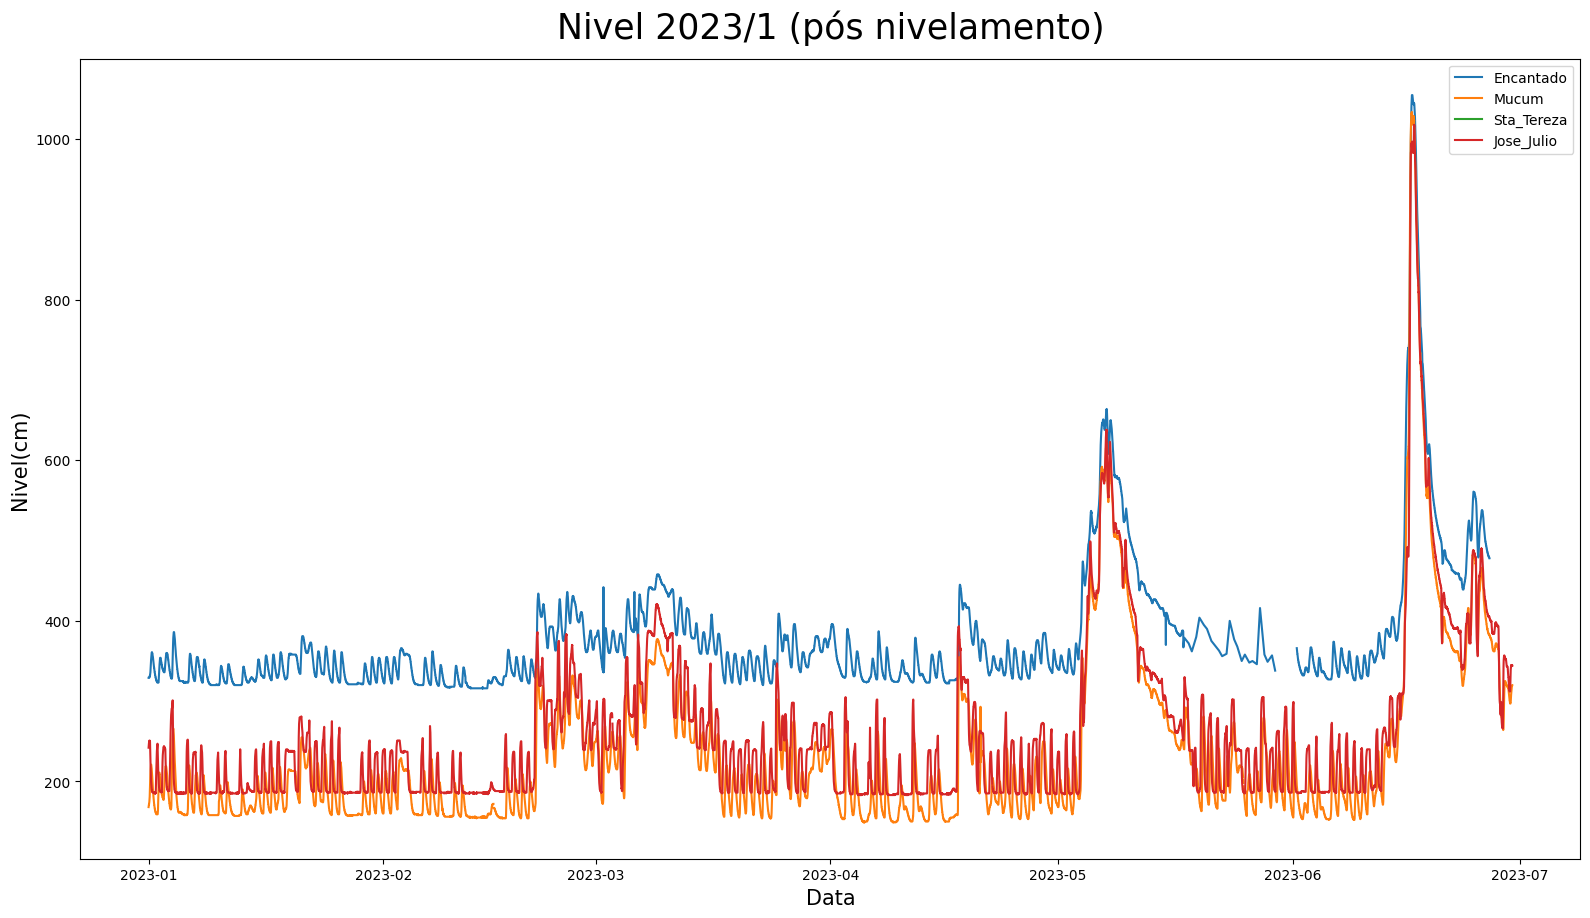

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-01-1')
data_fim = pd.to_datetime('2023-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2023/1 (pós nivelamento)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

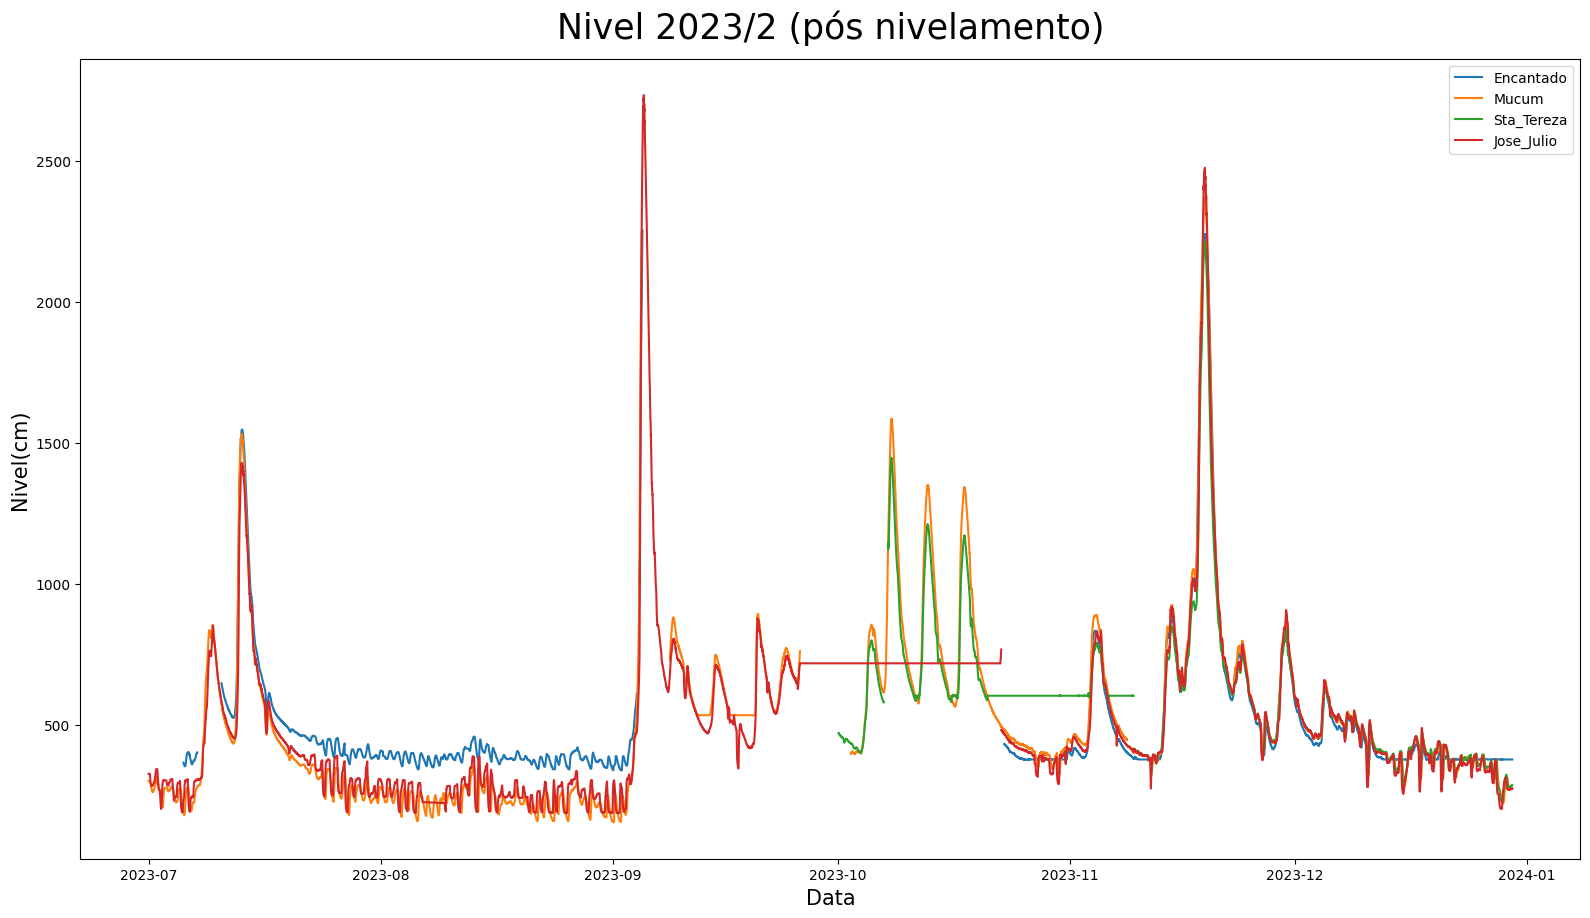

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-07-1')
data_fim = pd.to_datetime('2023-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2023/2 (pós nivelamento)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

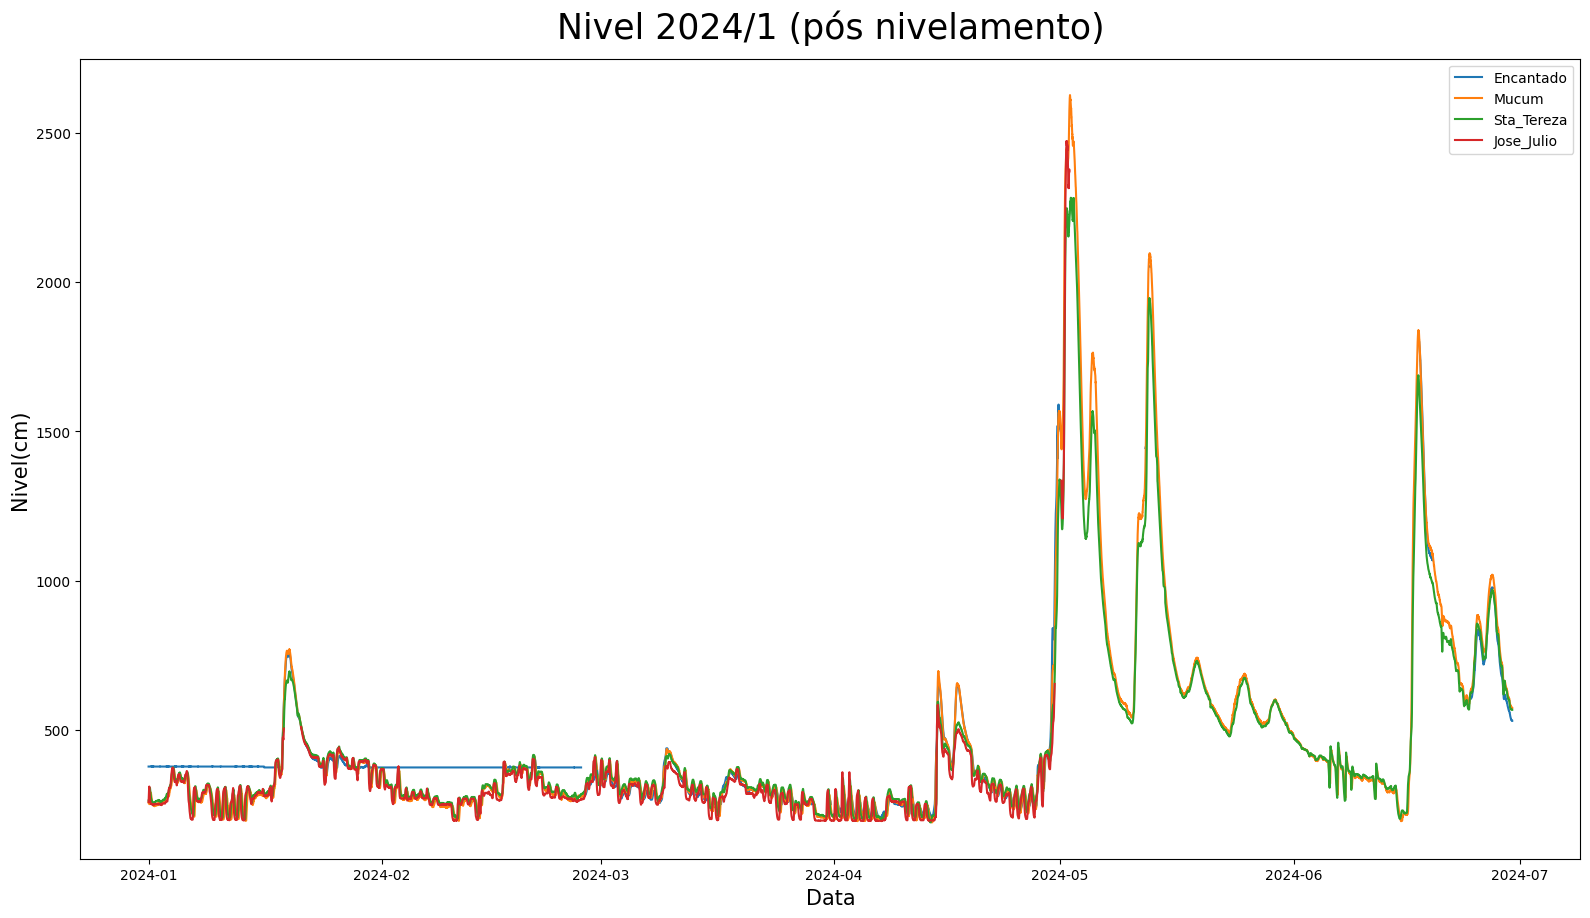

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-01-1')
data_fim = pd.to_datetime('2024-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2024/1 (pós nivelamento)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

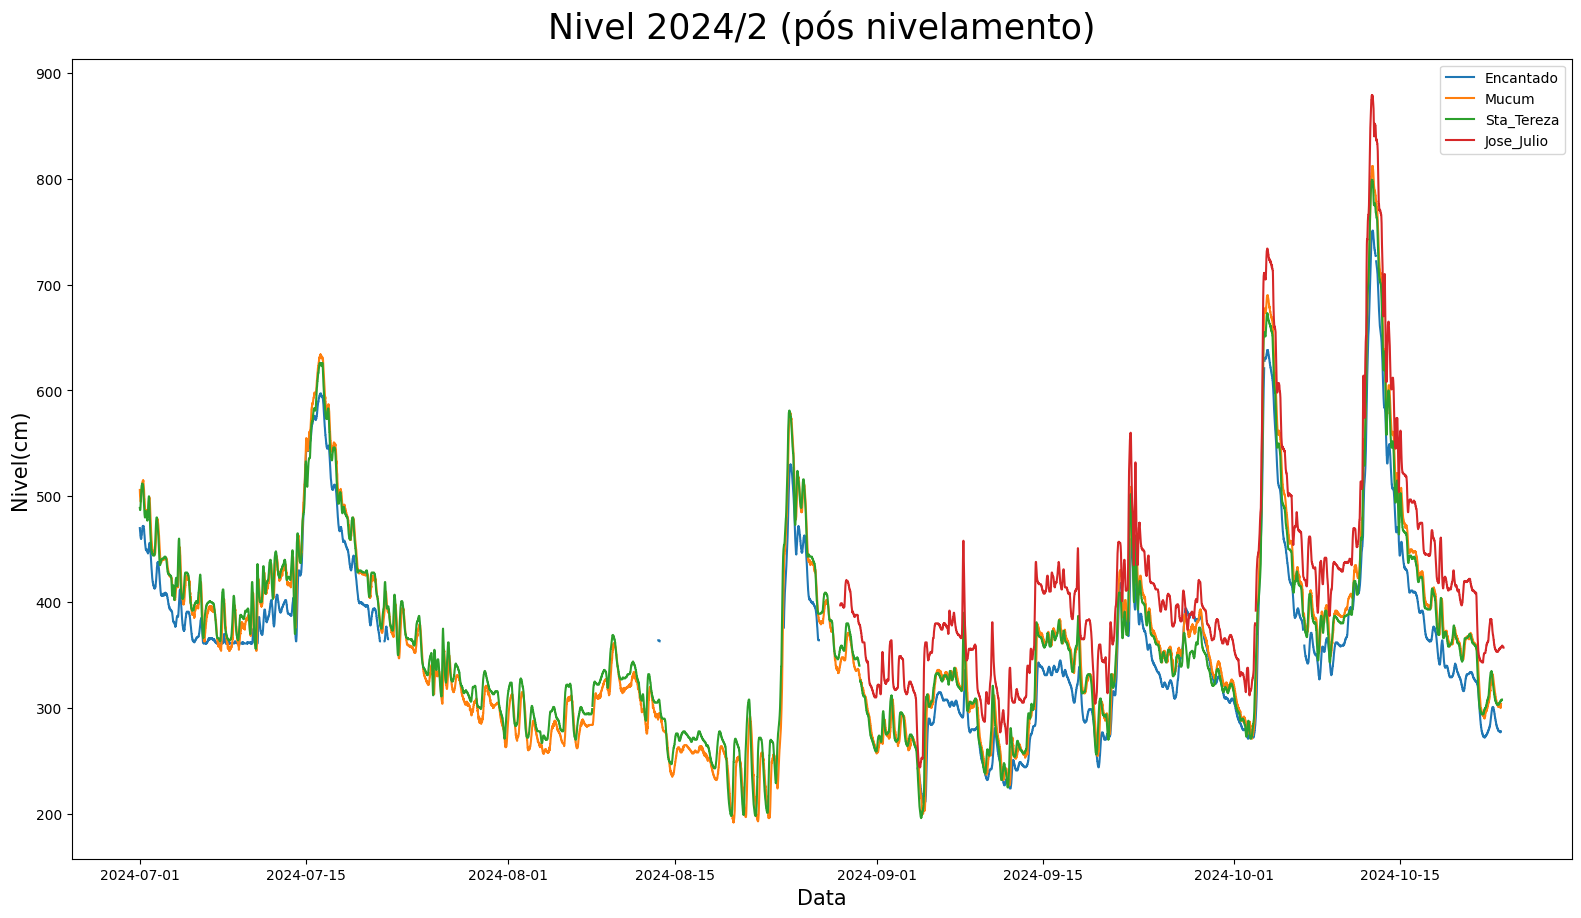

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2024/2 (pós nivelamento)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

Foi possivel notar que em faixas temporais há diferença de altura pois o medidor deve ter sido realocado do ponto original

*   Será necessario fazer ajustes em faixas temporais especifica



In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-06-1')
data_fim = pd.to_datetime('2022-12-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicio) &
                        (df_Encantado_unico['Data/Hora'] <= data_fim),
                        'Nivel(cm)'] -= 100

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-06-1')
data_fim = pd.to_datetime('2022-12-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Mucum_unico.loc[(df_Mucum_unico['Data/Hora'] >= data_inicio) &
                        (df_Mucum_unico['Data/Hora'] <= data_fim),
                        'Nivel(cm)'] += 20

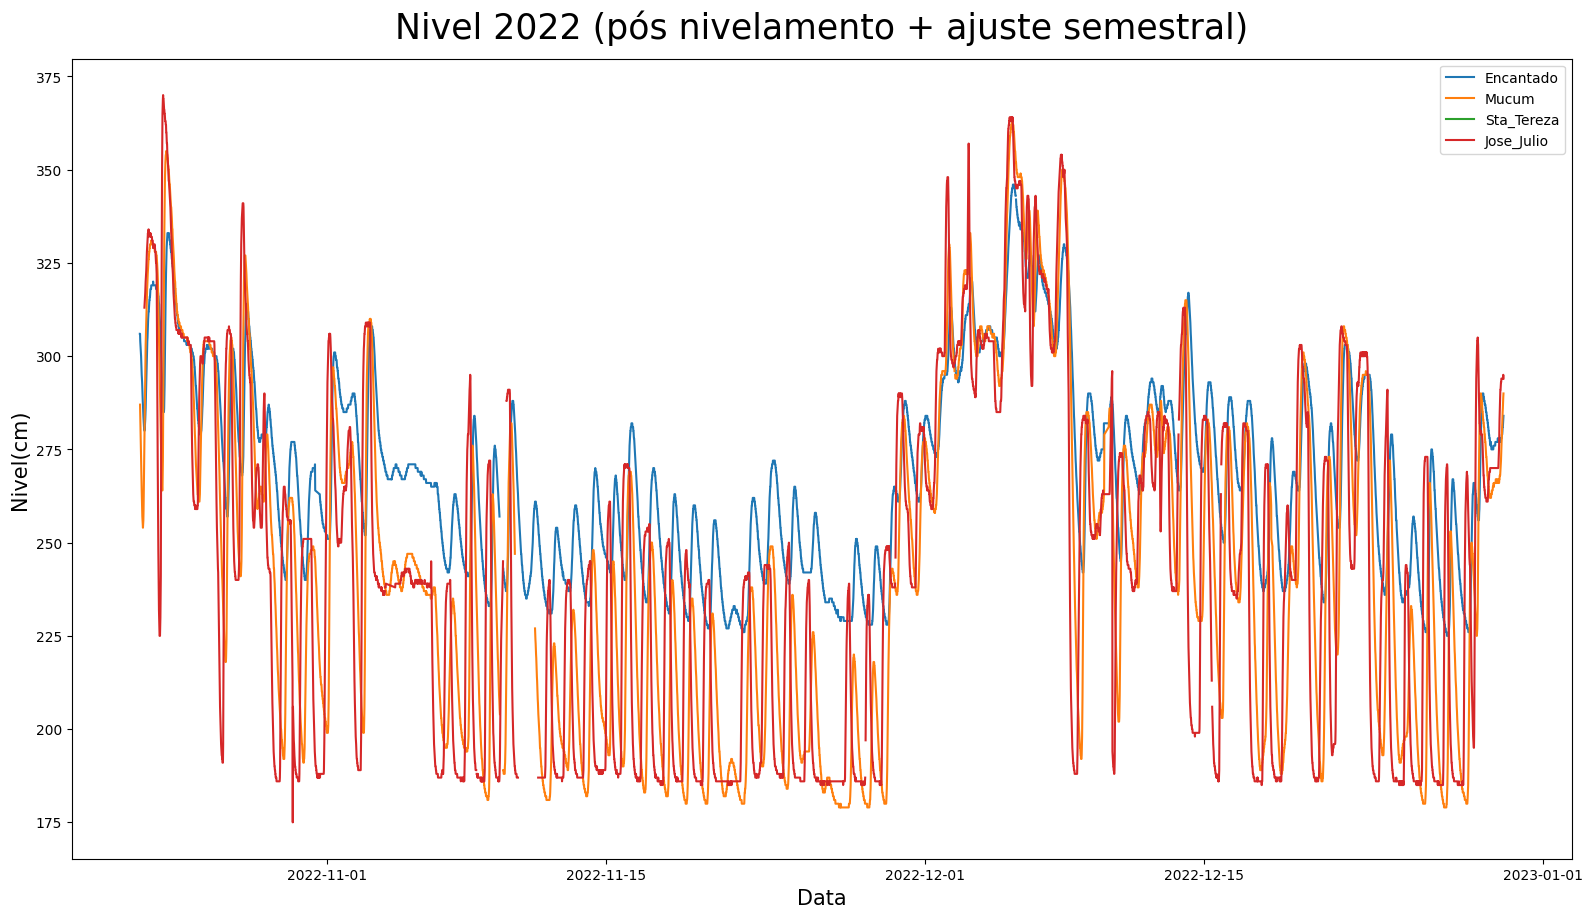

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-06-1')
data_fim = pd.to_datetime('2022-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2022 (pós nivelamento + ajuste semestral)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-01-1')
data_fim = pd.to_datetime('2023-6-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicio) &
                        (df_Encantado_unico['Data/Hora'] <= data_fim),
                        'Nivel(cm)'] -= 100

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-01-1')
data_fim = pd.to_datetime('2023-6-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Mucum_unico.loc[(df_Mucum_unico['Data/Hora'] >= data_inicio) &
                        (df_Mucum_unico['Data/Hora'] <= data_fim),
                        'Nivel(cm)'] += 20

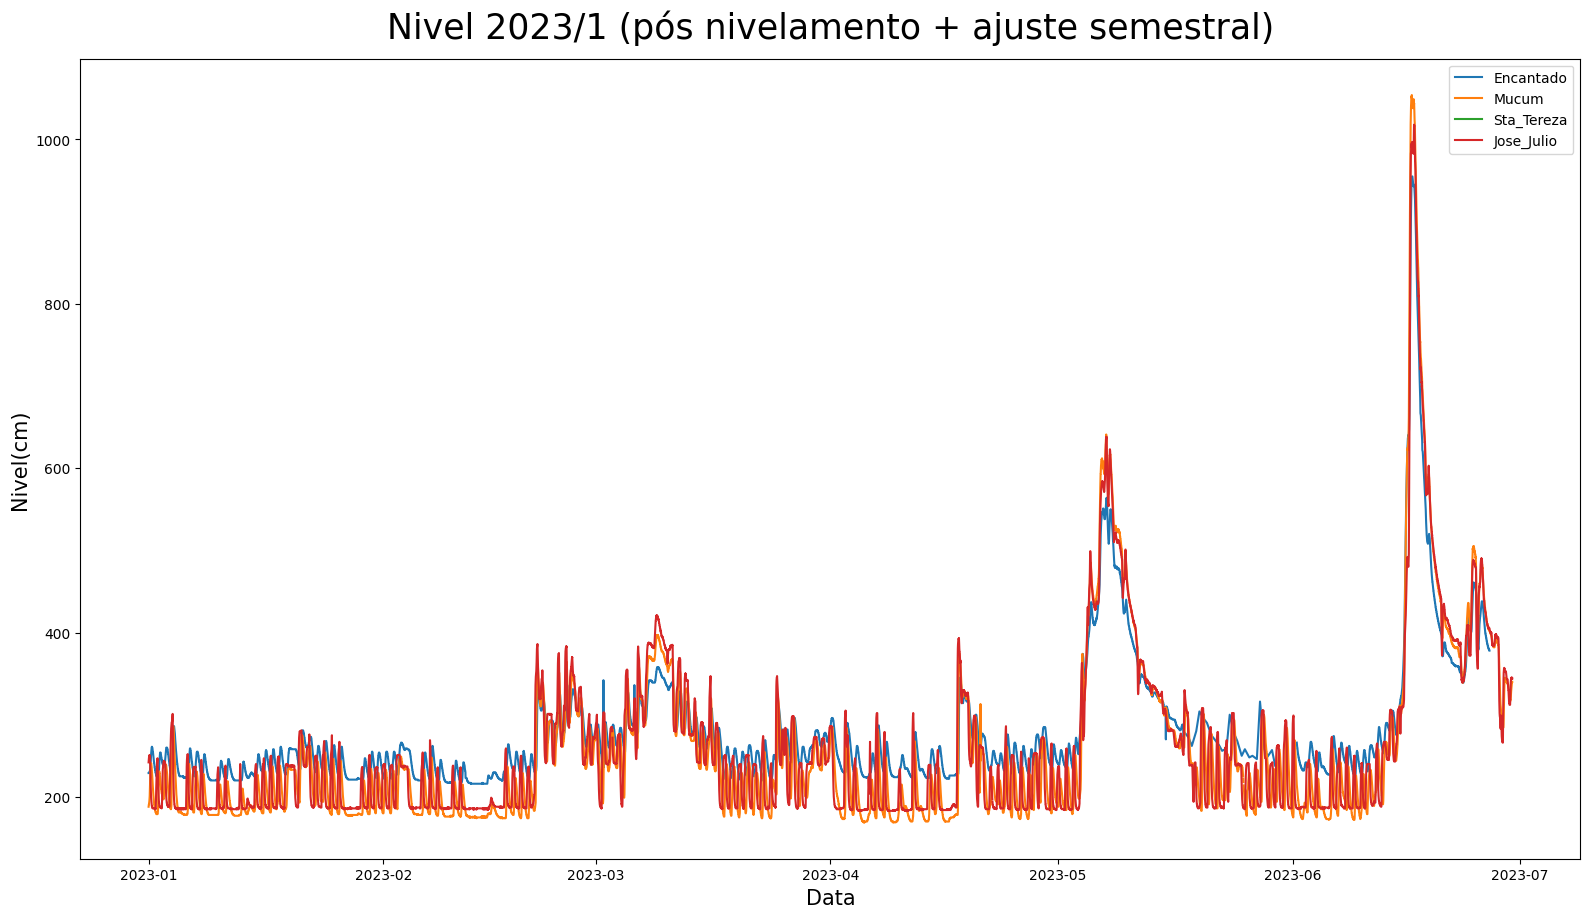

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-01-1')
data_fim = pd.to_datetime('2023-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2023/1 (pós nivelamento + ajuste semestral)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-07-1')
data_fim = pd.to_datetime('2023-10-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicio) &
                        (df_Encantado_unico['Data/Hora'] <= data_fim),
                        'Nivel(cm)'] -= 100

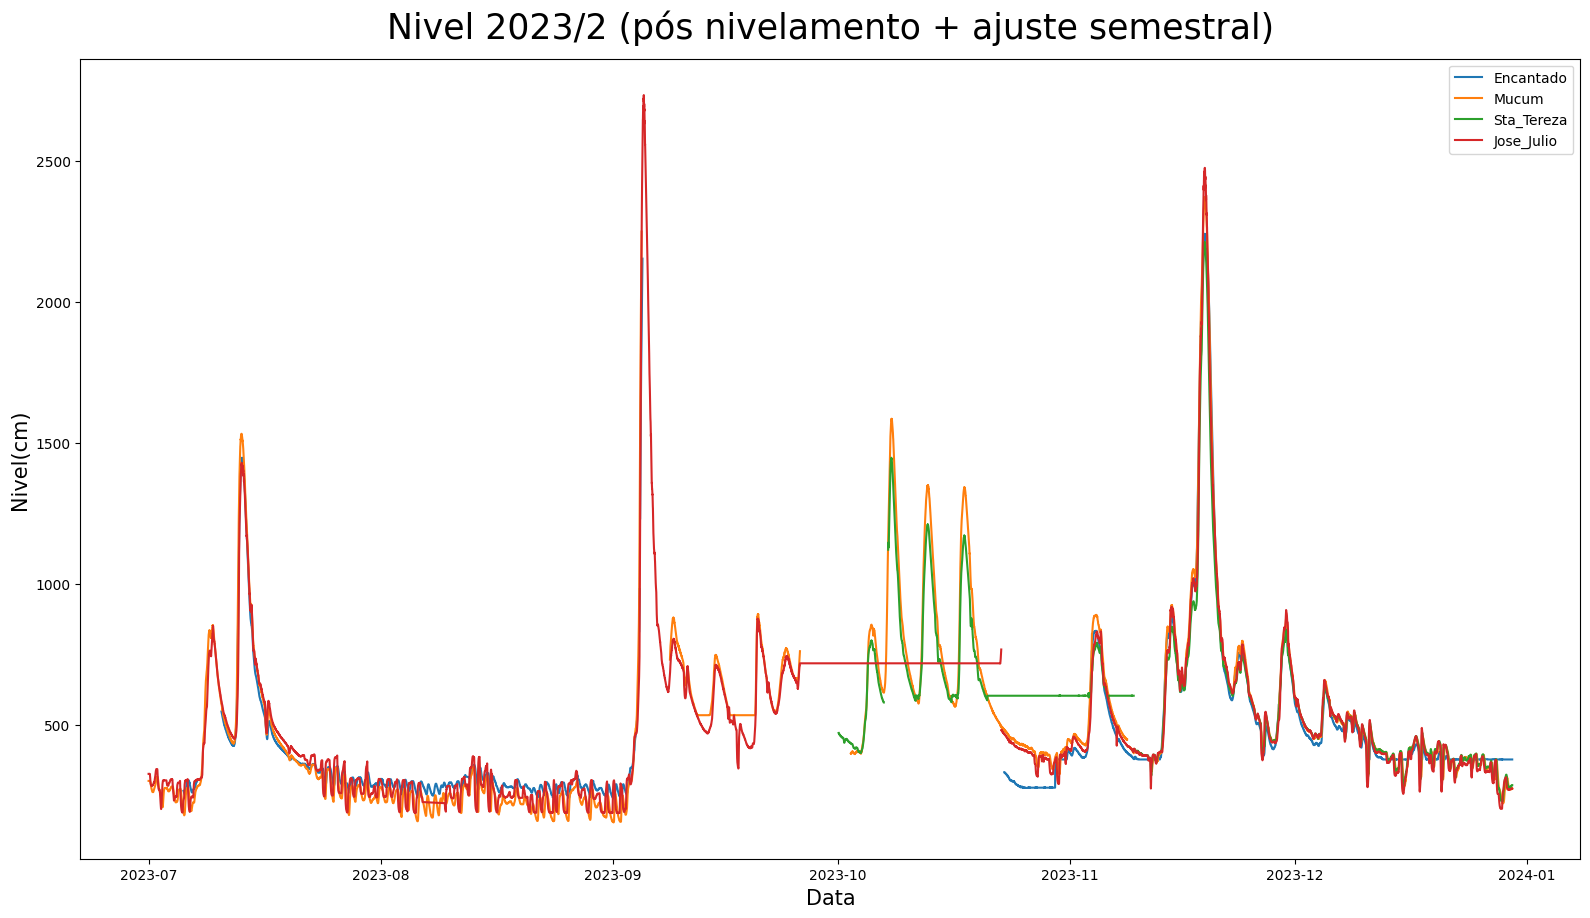

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-07-1')
data_fim = pd.to_datetime('2023-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2023/2 (pós nivelamento + ajuste semestral)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-06-20')
data_fim = pd.to_datetime('2024-12-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Jose_Julio_unico.loc[(df_Jose_Julio_unico['Data/Hora'] >= data_inicio) &
                        (df_Jose_Julio_unico['Data/Hora'] <= data_fim),
                        'Nivel(cm)'] -= 40

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2024-8-1')
data_final = pd.to_datetime('2024-8-15')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-06-20')
data_fim = pd.to_datetime('2024-12-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicio) &
                        (df_Encantado_unico['Data/Hora'] <= data_fim),
                        'Nivel(cm)'] += 20

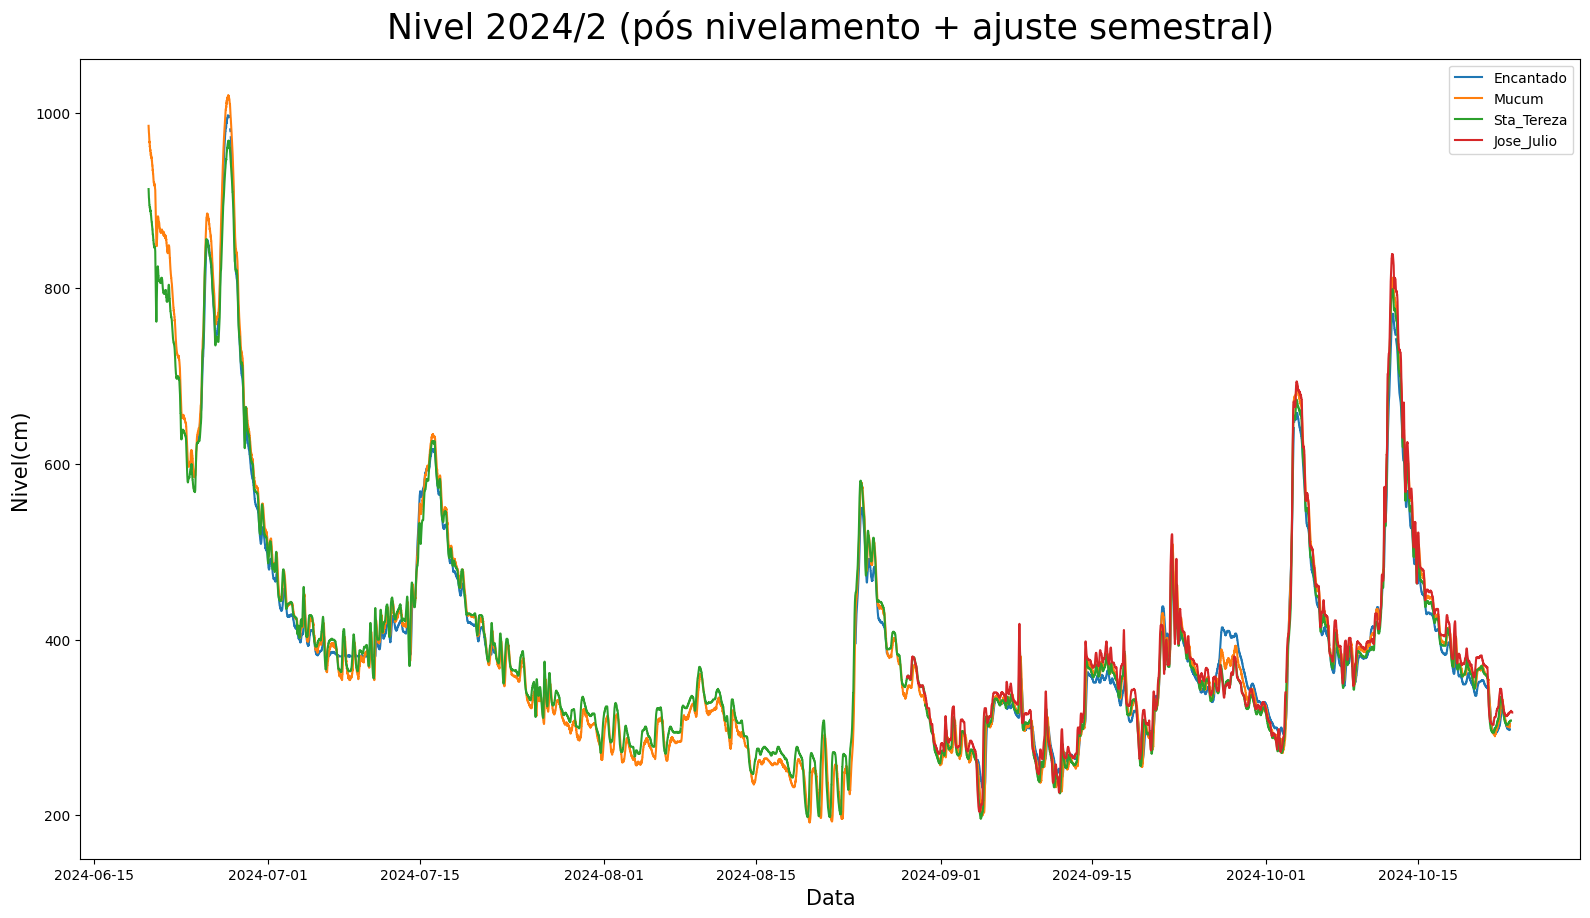

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-06-20')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2024/2 (pós nivelamento + ajuste semestral)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

## Fazendo correção nos graficos de Nivel

Nos graficos há medidas constantes não refletindo na realidade, provavelmente falha no medidor
- Vamos remover estes valores

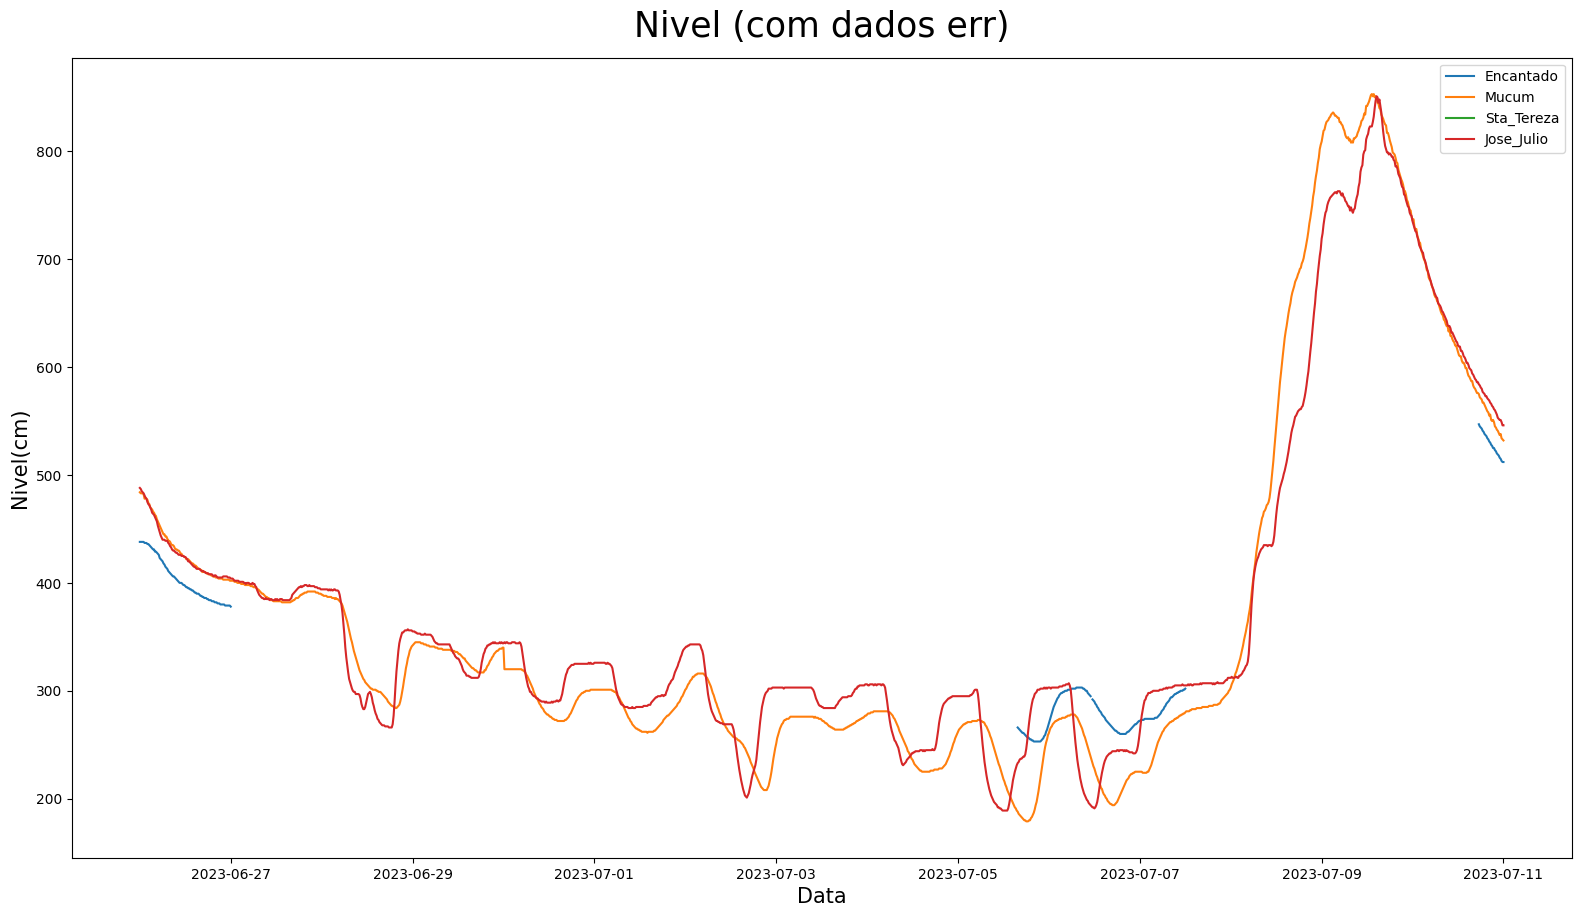

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-06-26')
data_fim = pd.to_datetime('2023-7-11')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-06-26')
data_final = pd.to_datetime('2023-7-11')
# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

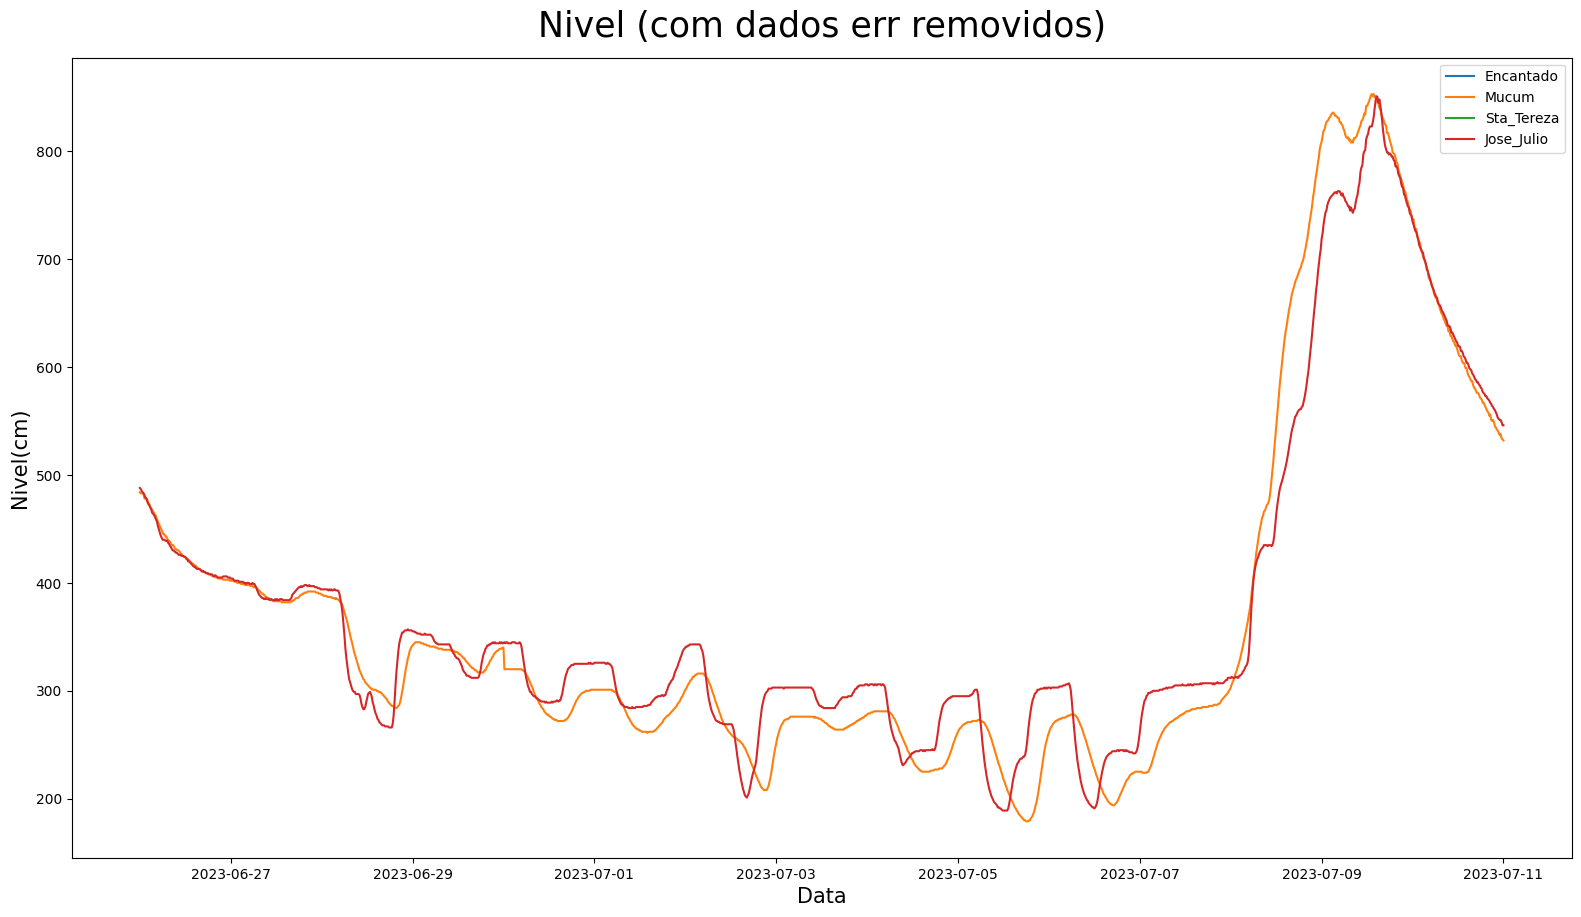

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-06-26')
data_fim = pd.to_datetime('2023-7-11')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err removidos)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

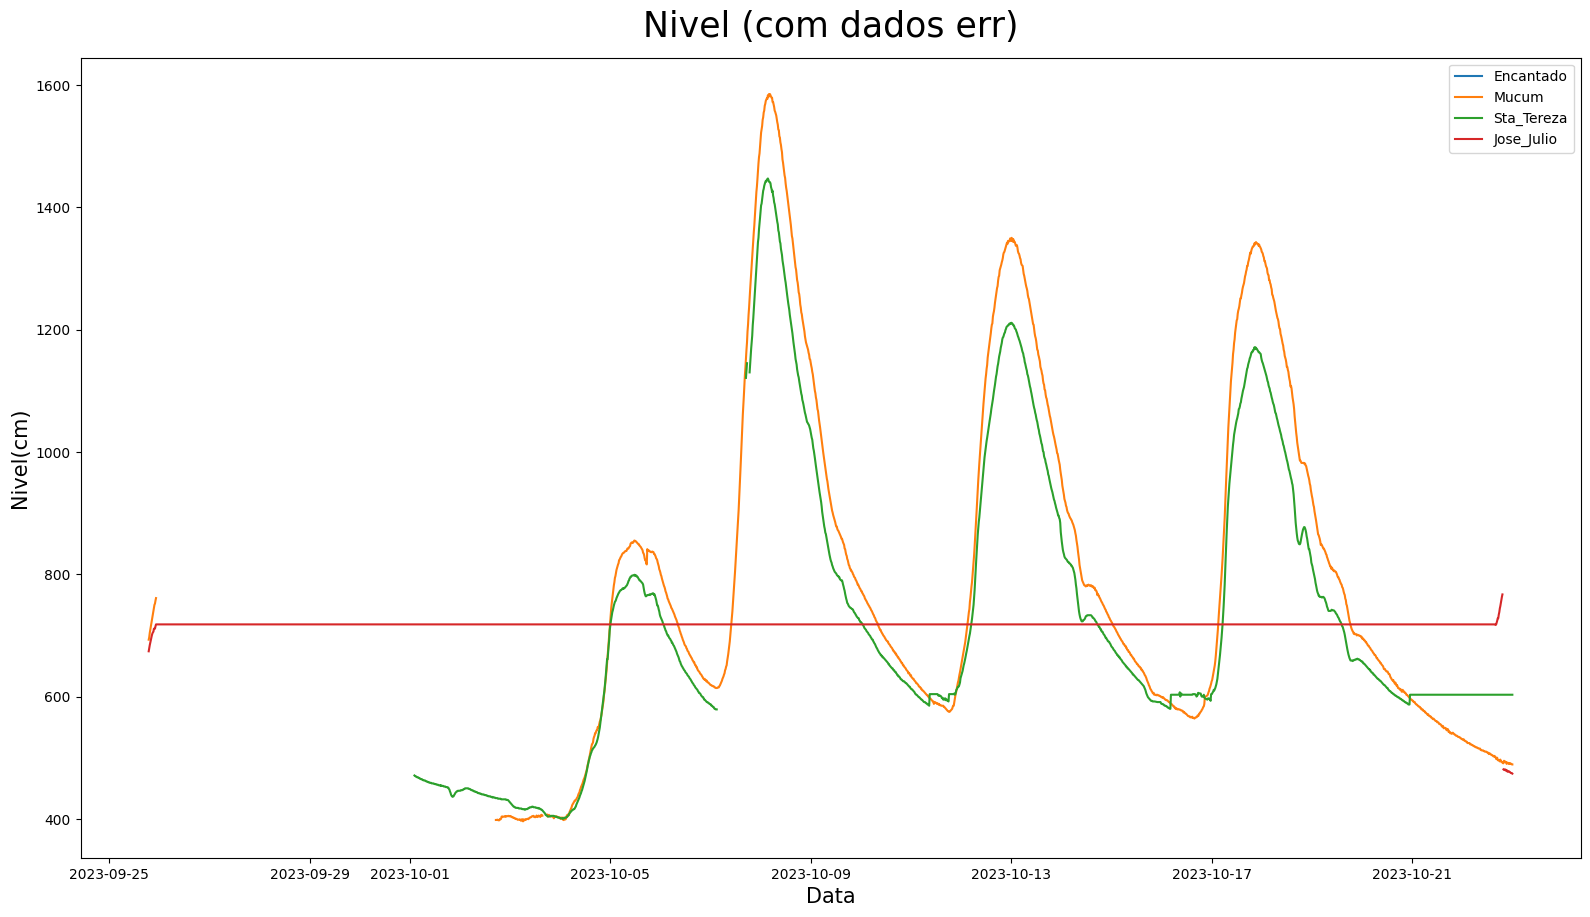

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-25 19:00')
data_fim = pd.to_datetime('2023-10-23')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-09-25 19:00')
data_final = pd.to_datetime('2023-10-23')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Jose_Julio_unico.loc[(df_Jose_Julio_unico['Data/Hora'] >= data_inicial) &
                        (df_Jose_Julio_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

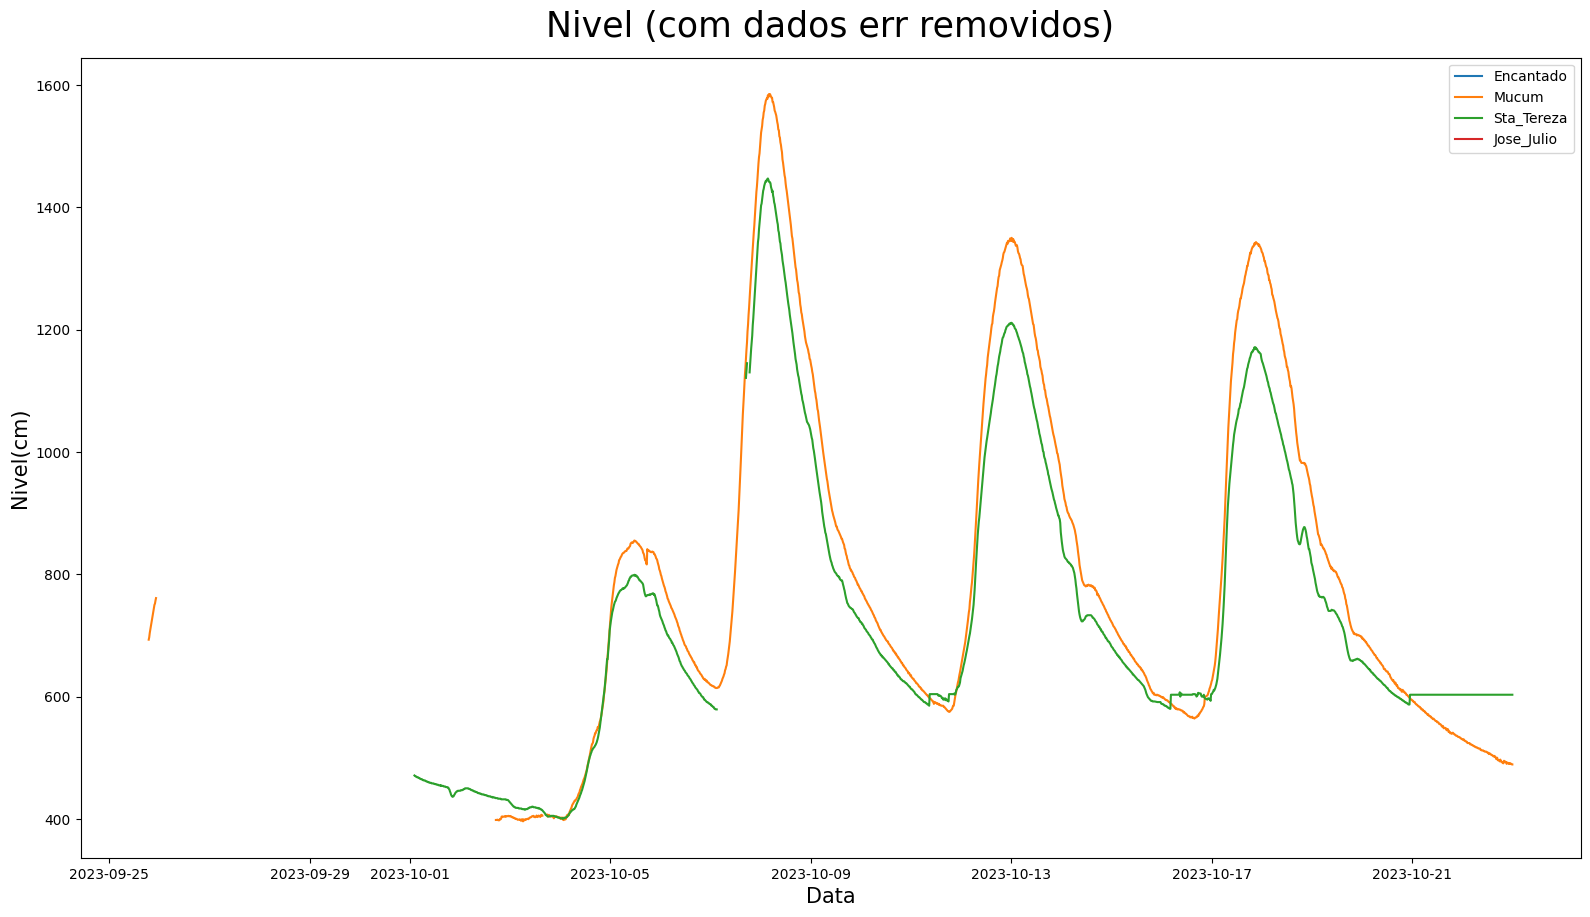

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-25 19:00')
data_fim = pd.to_datetime('2023-10-23')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err removidos)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

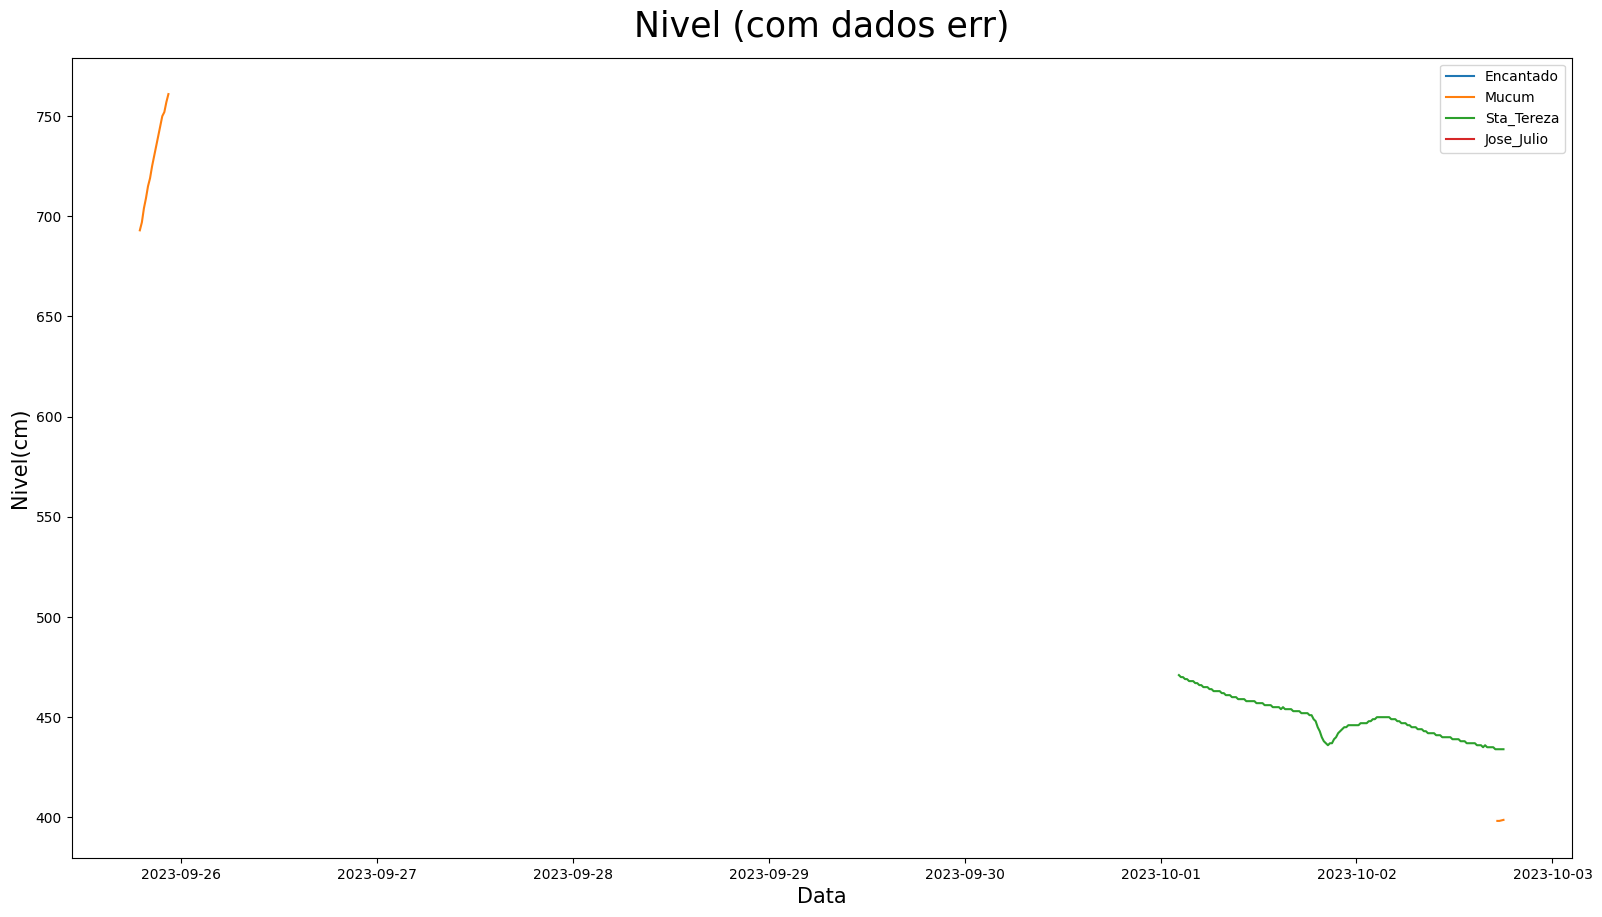

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-25 19:00')
data_fim = pd.to_datetime('2023-10-2 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-09-25 19:00')
data_final = pd.to_datetime('2023-10-2 18:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Mucum_unico.loc[(df_Mucum_unico['Data/Hora'] >= data_inicial) &
                        (df_Mucum_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

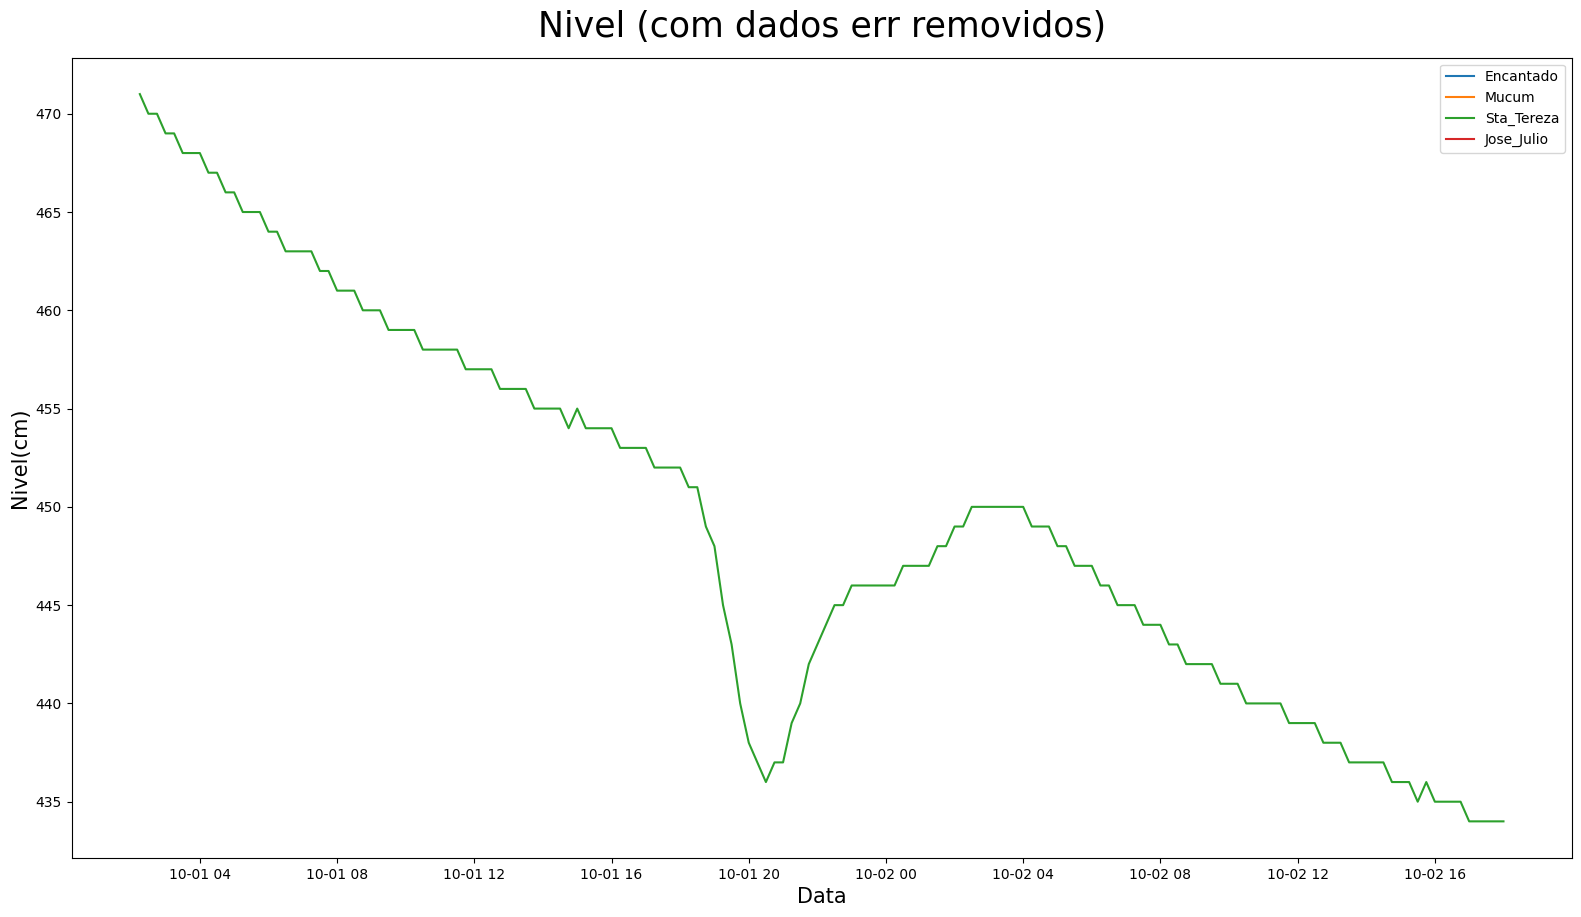

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-25 19:00')
data_fim = pd.to_datetime('2023-10-2 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err removidos)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

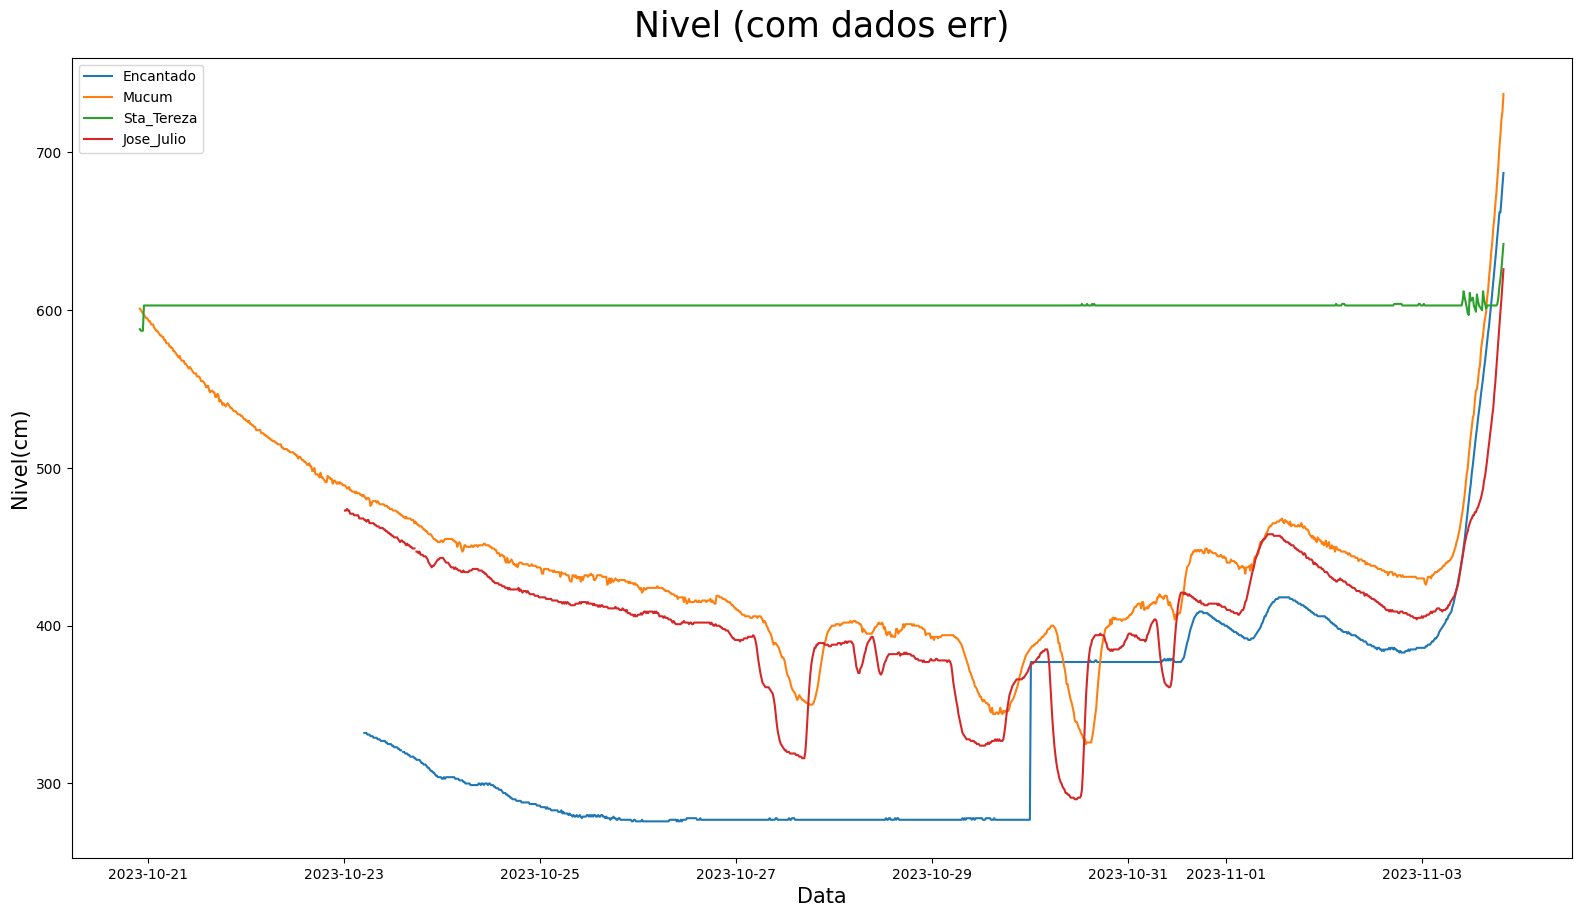

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-10-20 22:00')
data_fim = pd.to_datetime('2023-11-3 20:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-10-20 22:00')
data_final = pd.to_datetime('2023-11-3 20:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Sta_Tereza_unico.loc[(df_Sta_Tereza_unico['Data/Hora'] >= data_inicial) &
                        (df_Sta_Tereza_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-10-20 22:00')
data_final = pd.to_datetime('2023-10-31 16:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

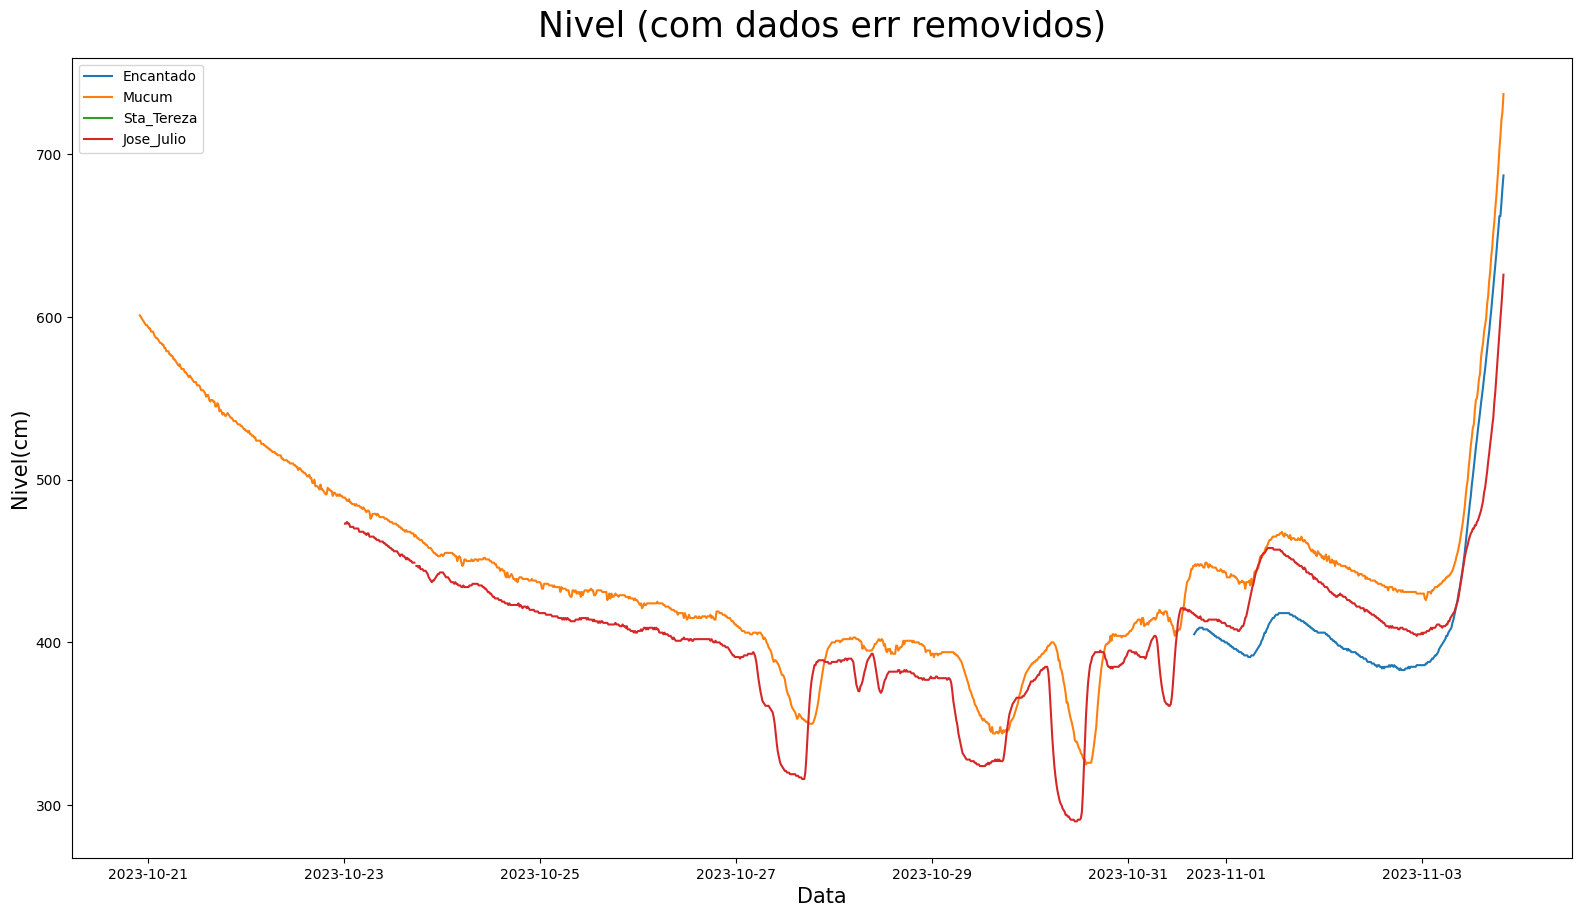

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-10-20 22:00')
data_fim = pd.to_datetime('2023-11-3 20:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err removidos)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

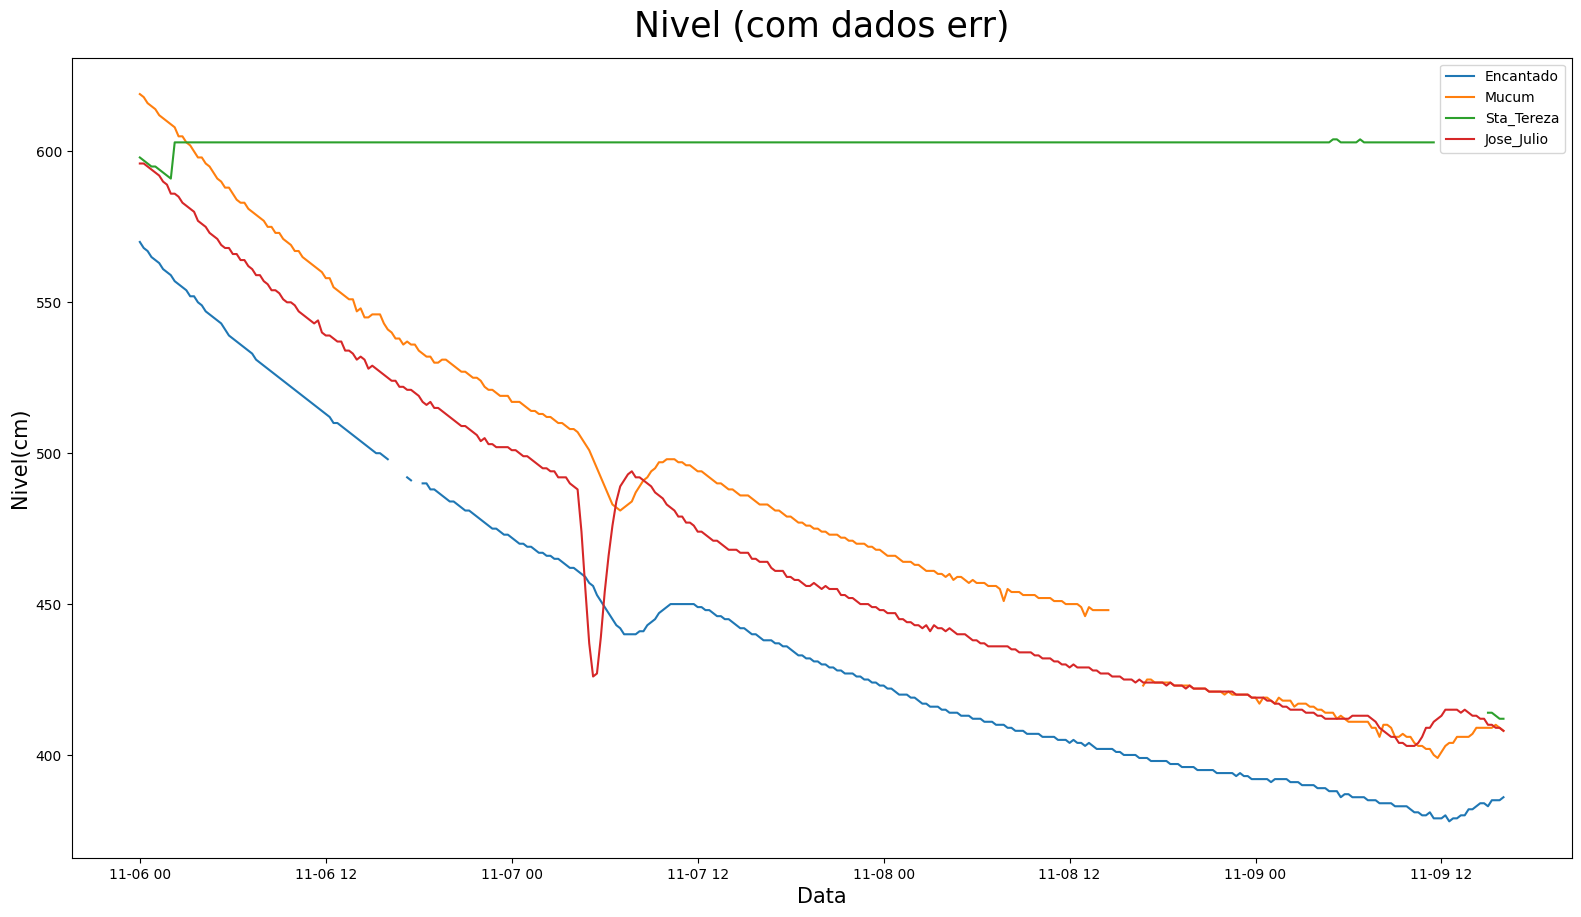

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-6')
data_fim = pd.to_datetime('2023-11-9 16:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-11-6')
data_final = pd.to_datetime('2023-11-9 16:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Sta_Tereza_unico.loc[(df_Sta_Tereza_unico['Data/Hora'] >= data_inicial) &
                        (df_Sta_Tereza_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

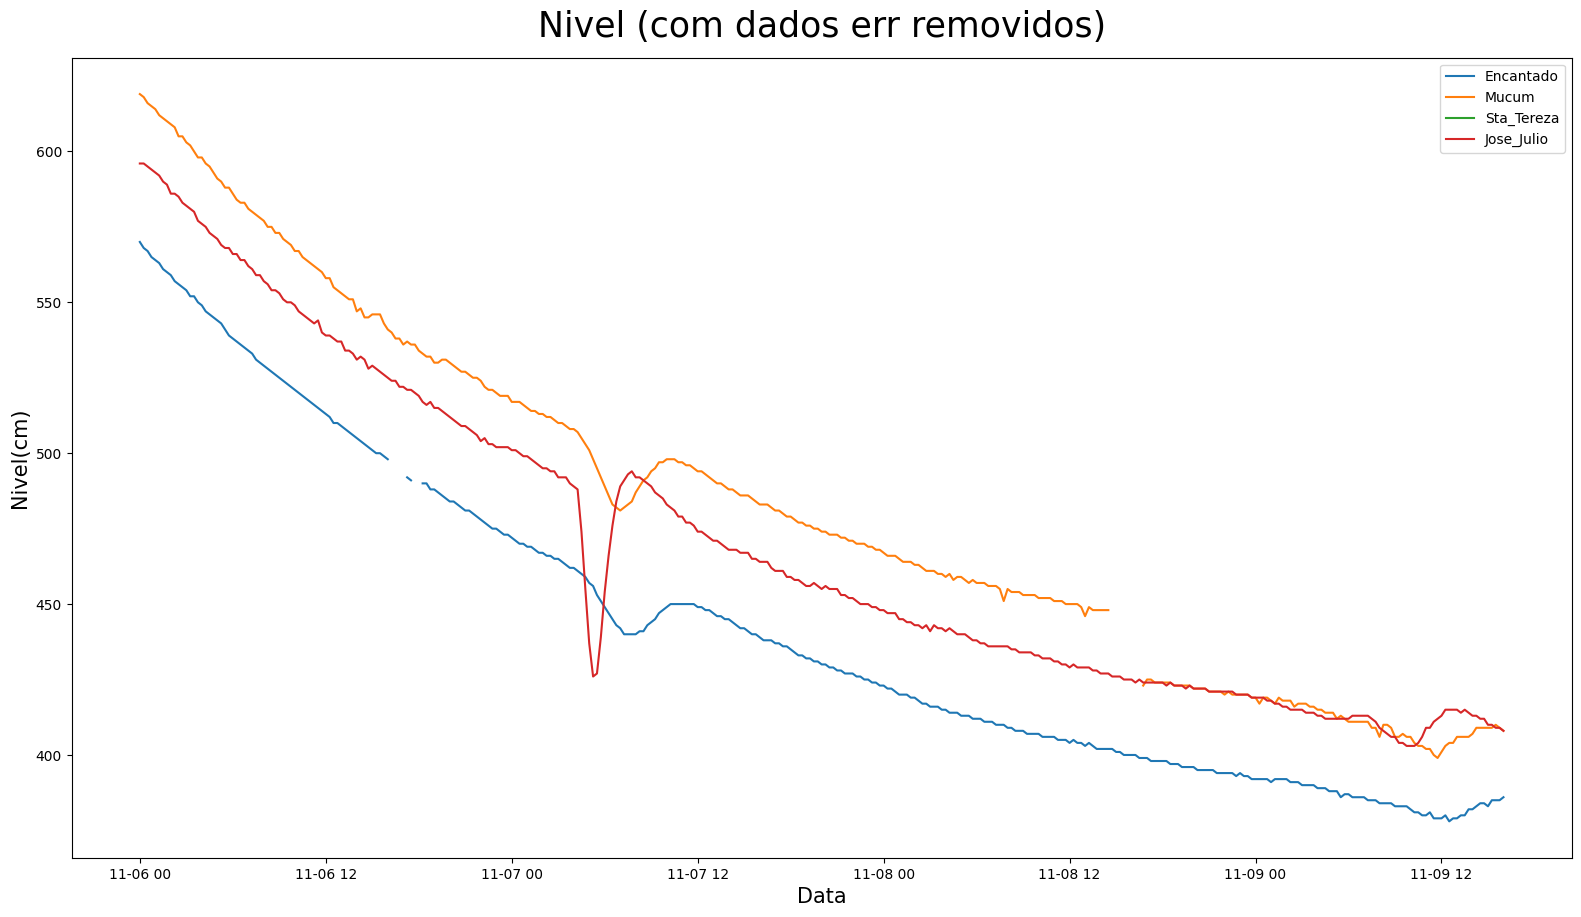

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-6')
data_fim = pd.to_datetime('2023-11-9 16:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err removidos)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

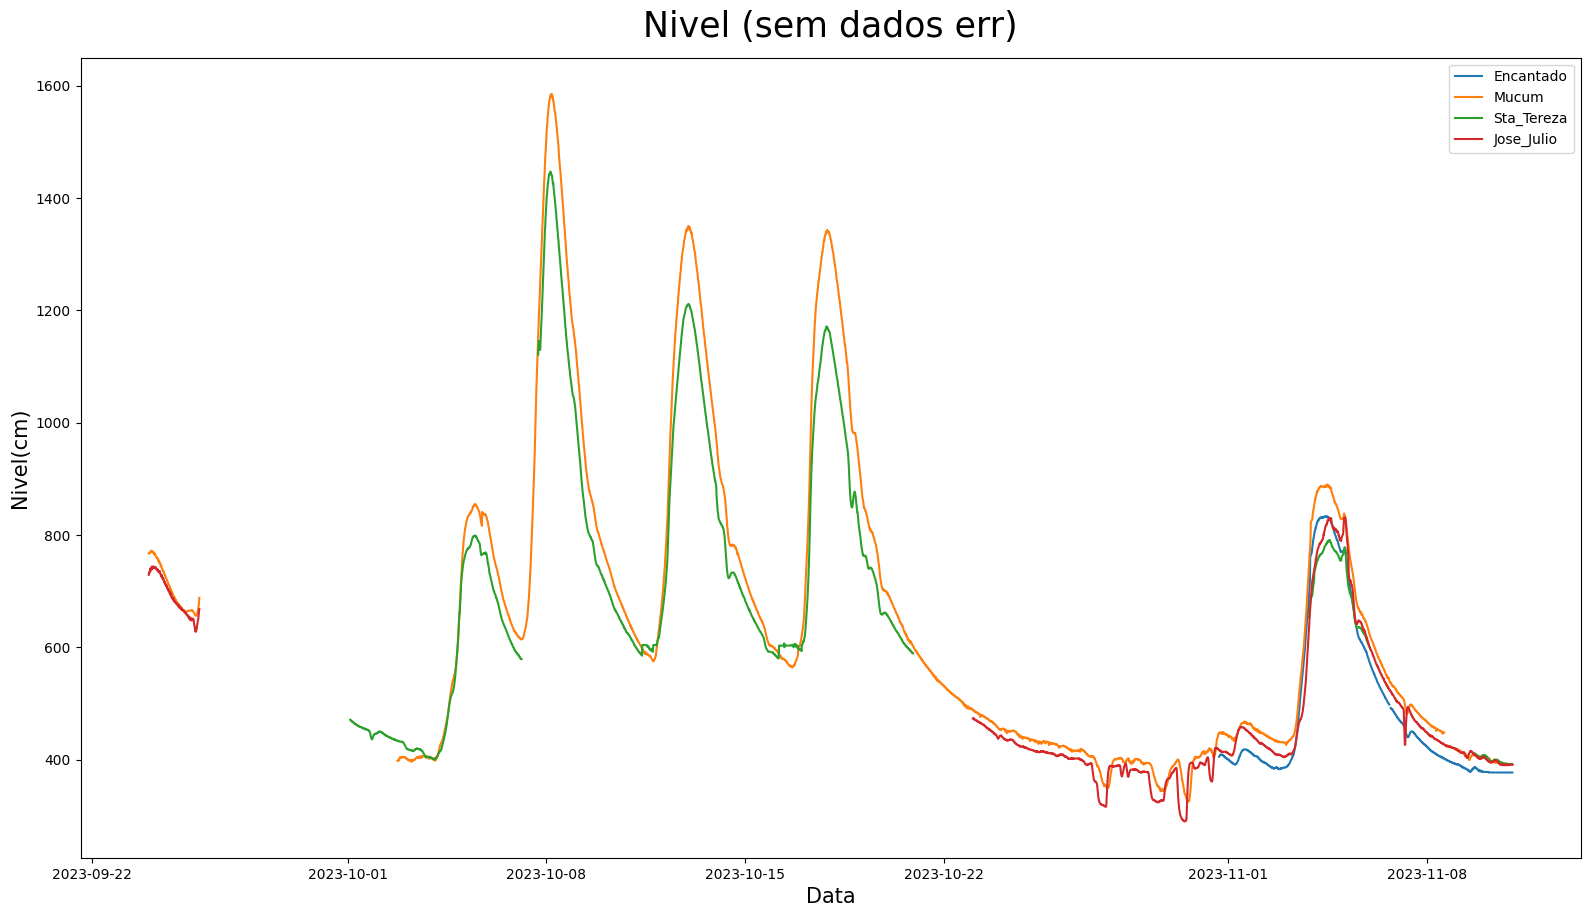

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-24')
data_fim = pd.to_datetime('2023-11-11')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (sem dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

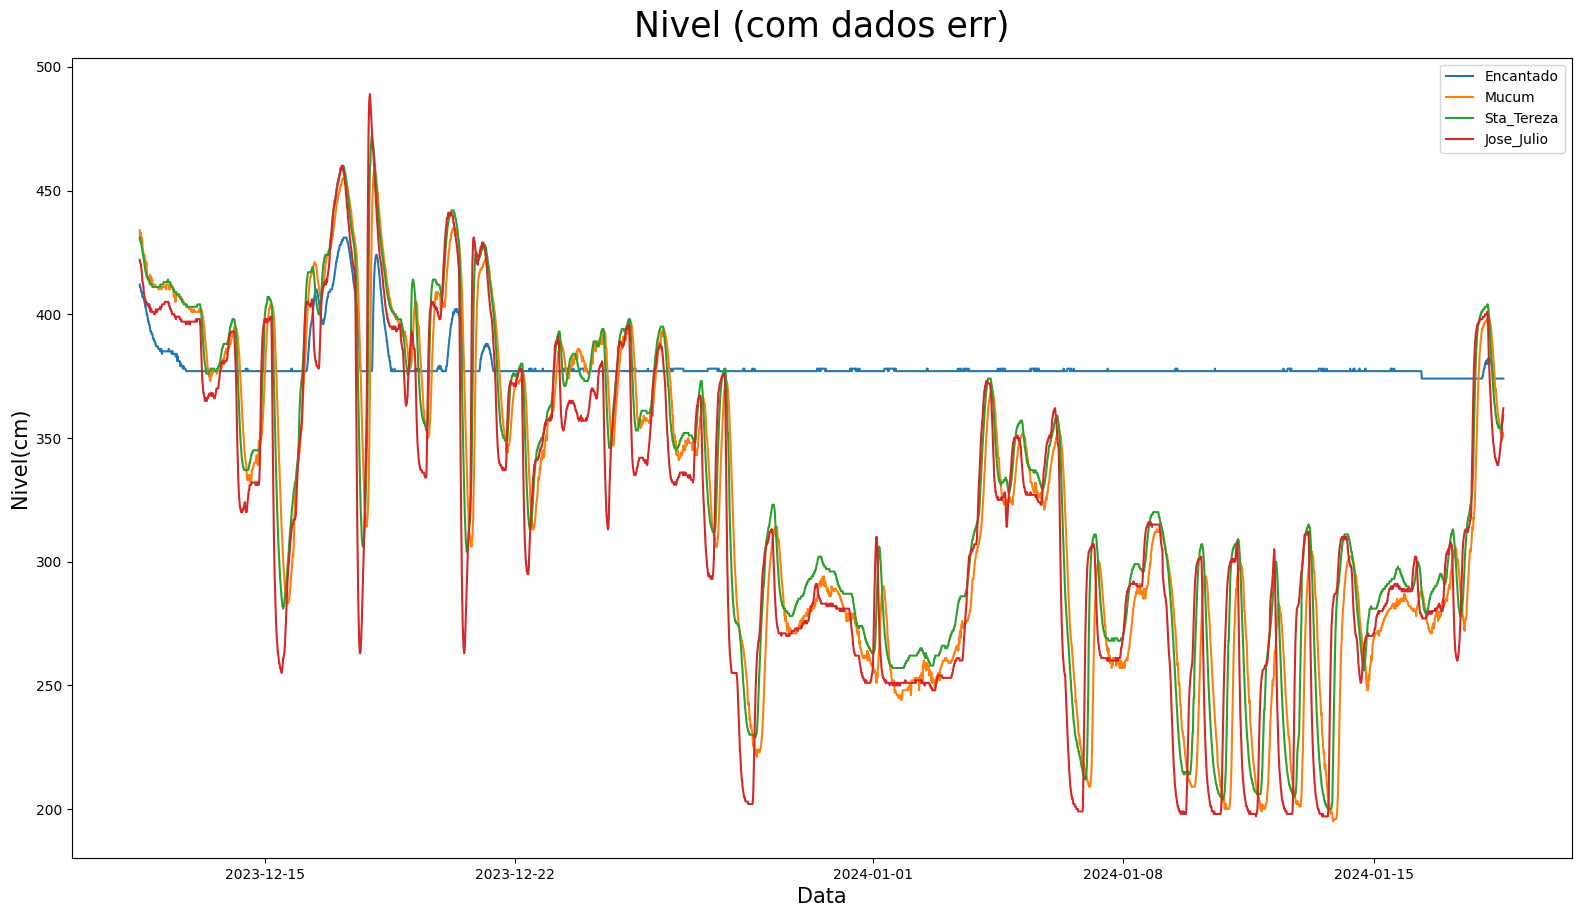

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-11 12:00')
data_fim = pd.to_datetime('2024-1-18 15:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-12-11 12:00')
data_final = pd.to_datetime('2024-1-18 15:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-11 12:00')
data_fim = pd.to_datetime('2024-1-18 15:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err removidos)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-1-26 12:00')
data_fim = pd.to_datetime('2024-2-27 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2024-1-26 12:00')
data_final = pd.to_datetime('2024-2-27 18:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-1-26 12:00')
data_fim = pd.to_datetime('2024-2-27 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (com dados err removidos)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-11 12:00')
data_fim = pd.to_datetime('2024-2-27 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (sem dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

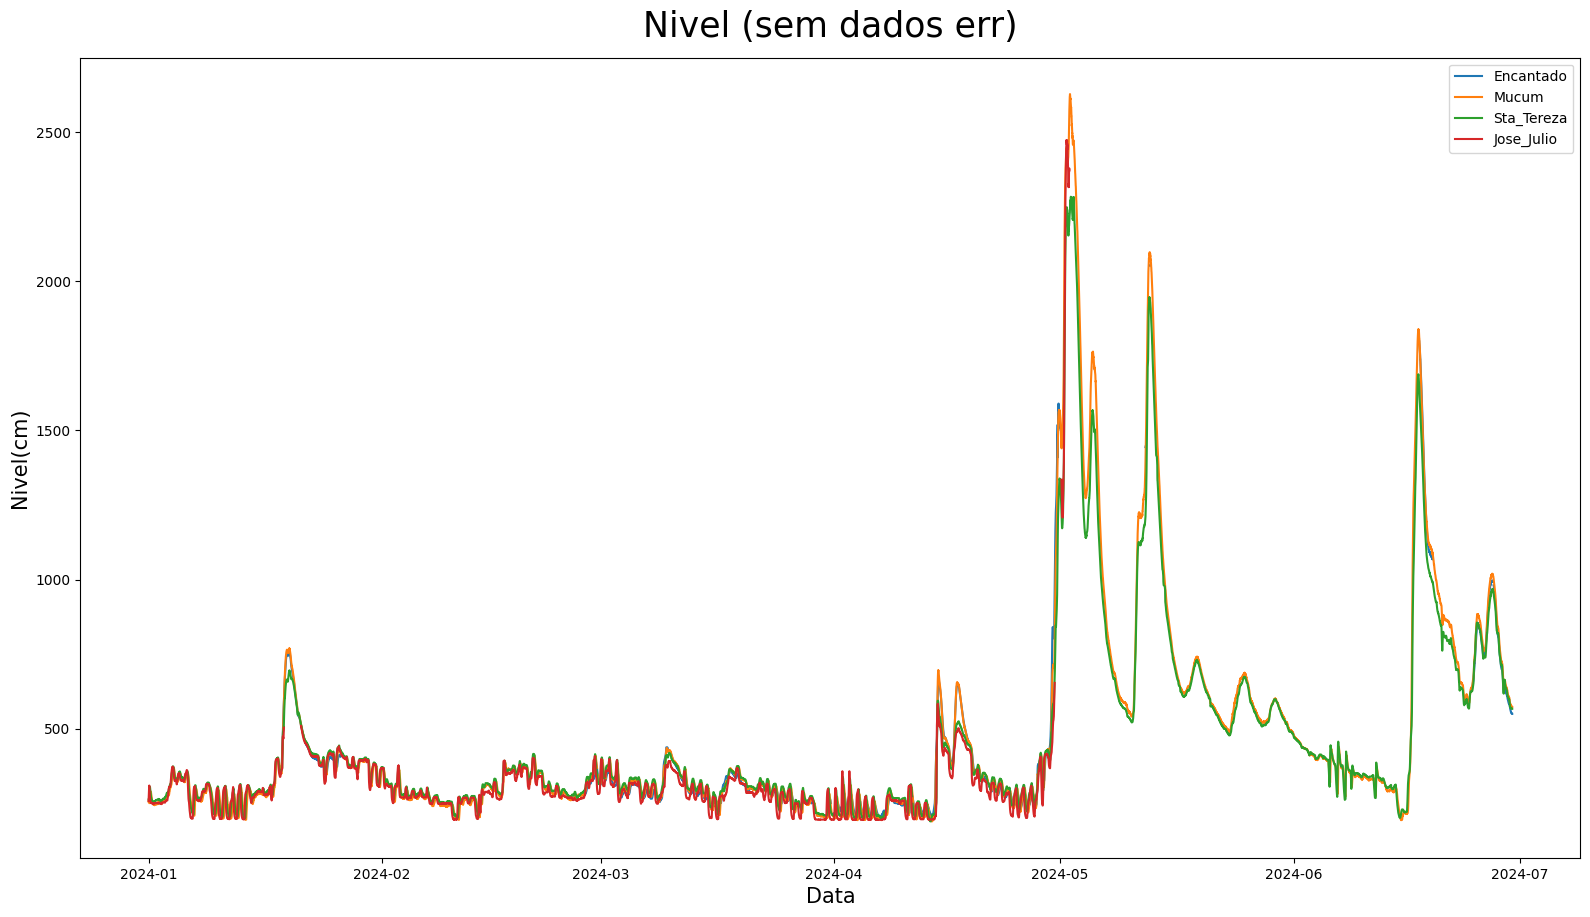

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-01-1')
data_fim = pd.to_datetime('2024-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (sem dados err)', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

## Grafico pós tratamento de valores do nivel fora do padrão

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-07-1')
data_fim = pd.to_datetime('2022-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2022', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-01-1')
data_fim = pd.to_datetime('2023-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2023/1', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-07-1')
data_fim = pd.to_datetime('2023-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2023/2', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-01-1')
data_fim = pd.to_datetime('2024-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2024/1', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 2024/2', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
df_Encantado_unico.tail()

In [ ]:
df_Mucum_unico.info()

## Deslocamento dos dados em relação a vasão (geral)

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-8-1')
data_fim = pd.to_datetime('2022-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 2022 (pre nivelamento)', 'Data', 'Vazão(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
df_Encantado_unico['Vazao(m3/s)'] = df_Encantado_unico['Vazao(m3/s)'] - 35
df_Mucum_unico['Vazao(m3/s)'] = df_Mucum_unico['Vazao(m3/s)'] - 0
df_Jose_Julio_unico['Vazao(m3/s)'] = df_Jose_Julio_unico['Vazao(m3/s)'] + 5

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-8-1')
data_fim = pd.to_datetime('2022-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 2022 (pos deslocamento)', 'Data', 'Vazão(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

## Deslocamento dos dados em relação da vazao (por partes)

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-17')
data_fim = pd.to_datetime('2024-01-21')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) (1 mes)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

no grafico aciima notamos que os valores não tem diferença em questão temporal mas vemoz que possuem niveis diferentes

- Os Valores abaixo são para eles terem uma diferença geral semelhante

In [ ]:
df_Encantado_unico['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'] + 180
df_Mucum_unico['Nivel(cm)'] = df_Mucum_unico['Nivel(cm)'] + 70
df_Sta_Tereza_unico['Nivel(cm)'] = df_Sta_Tereza_unico['Nivel(cm)'] + 50
df_Jose_Julio_unico['Nivel(cm)'] = df_Jose_Julio_unico['Nivel(cm)'] - 40

- Os graficos abaixo foram separados em faixa de 6 meses para facilitar a visualização

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-06-1')
data_fim = pd.to_datetime('2022-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2022 (nivelado)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-01-1')
data_fim = pd.to_datetime('2023-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2023/1 (nivelado)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-07-1')
data_fim = pd.to_datetime('2023-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2023/2 (nivelado)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-01-1')
data_fim = pd.to_datetime('2024-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2024/1 (nivelado)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2024/2 (nivelado)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

Foi possivel notar que em faixas temporais há diferença de altura pois o medidor deve ter sido realocado do ponto original

*   Será necessario fazer ajustes em faixas temporais especifica



In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-06-1')
data_fim = pd.to_datetime('2022-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2022 (nivelado)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-01-1')
data_fim = pd.to_datetime('2023-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2023/1 (nivelado)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-6')
data_fim = pd.to_datetime('2023-12-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Mucum_unico.loc[(df_Mucum_unico['Data/Hora'] >= data_inicio) &
                        (df_Mucum_unico['Data/Hora'] <= data_fim),
                        'Vazao(m3/s)'] -= 250

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-6')
data_fim = pd.to_datetime('2023-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) (nivelado + ajuste)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-07-1')
data_fim = pd.to_datetime('2023-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2023/1 (nivelado)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-01-1')
data_fim = pd.to_datetime('2024-6-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Mucum_unico.loc[(df_Mucum_unico['Data/Hora'] >= data_inicio) &
                        (df_Mucum_unico['Data/Hora'] <= data_fim),
                        'Vazao(m3/s)'] -= 100

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-01-1')
data_fim = pd.to_datetime('2024-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2024/1 (nivelado + ajuste)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Aplique a soma de 50 apenas para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicio) &
                        (df_Encantado_unico['Data/Hora'] <= data_fim),
                        'Vazao(m3/s)'] += 390

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2024/2 (nivelado + ajuste)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

## Fazendo correção nos graficos da vazao

Nos graficos há medidas constantes não refletindo na realidade, provavelmente falha no medidor
- Vamos remover estes valores

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-06-26')
data_fim = pd.to_datetime('2023-7-11')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) jun2023 (com dados err)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-06-26')
data_final = pd.to_datetime('2023-7-11')
# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Vazao(m3/s)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-06-26')
data_fim = pd.to_datetime('2023-7-11')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) jun2023 (com dados err removidos)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-25 19:00')
data_fim = pd.to_datetime('2023-10-23')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) out2023 (com dados err)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-09-25 19:00')
data_final = pd.to_datetime('2023-10-23')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Jose_Julio_unico.loc[(df_Jose_Julio_unico['Data/Hora'] >= data_inicial) &
                        (df_Jose_Julio_unico['Data/Hora'] <= data_final),
                        'Vazao(m3/s)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-25 19:00')
data_fim = pd.to_datetime('2023-10-23')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) out2023 (com dados err removidos)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-25 19:00')
data_fim = pd.to_datetime('2023-10-2 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) out2023 (com dados err)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-09-25 19:00')
data_final = pd.to_datetime('2023-10-2 18:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Mucum_unico.loc[(df_Mucum_unico['Data/Hora'] >= data_inicial) &
                        (df_Mucum_unico['Data/Hora'] <= data_final),
                        'Vazao(m3/s)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-25 19:00')
data_fim = pd.to_datetime('2023-10-2 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s)  out2023  (com dados err removidos)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-10-20 22:00')
data_fim = pd.to_datetime('2023-11-3 20:00')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) out/nov2023 (com dados err)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-10-20 22:00')
data_final = pd.to_datetime('2023-11-3 20:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Sta_Tereza_unico.loc[(df_Sta_Tereza_unico['Data/Hora'] >= data_inicial) &
                        (df_Sta_Tereza_unico['Data/Hora'] <= data_final),
                        'Nivel(cm)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-10-20 22:00')
data_final = pd.to_datetime('2023-10-31 16:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Vazao(m3/s)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-10-20 22:00')
data_fim = pd.to_datetime('2023-11-3 20:00')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) out/nov2023 (com dados err removidos)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-09-24')
data_fim = pd.to_datetime('2023-11-11')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) out-nov2023 (sem dados err)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-11 12:00')
data_fim = pd.to_datetime('2024-1-18 15:00')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) dez2023 (com dados err)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2023-12-11 12:00')
data_final = pd.to_datetime('2024-1-18 15:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Vazao(m3/s)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-11 12:00')
data_fim = pd.to_datetime('2024-1-18 15:00')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) dez2023 (com dados err removidos)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-1-26 12:00')
data_fim = pd.to_datetime('2024-2-27 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) fev2024 (com dados err)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2024-1-26 12:00')
data_final = pd.to_datetime('2024-2-27 18:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Vazao(m3/s)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-1-26 12:00')
data_fim = pd.to_datetime('2024-2-27 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) fev2024 (com dados err removidos)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-11 12:00')
data_fim = pd.to_datetime('2024-2-27 18:00')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) dec-fev2024', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-05-1')
data_fim = pd.to_datetime('2024-6-1')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) mai2024 (com dados err)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2024-05-1')
data_final = pd.to_datetime('2024-6-1')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Vazao(m3/s)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-05-1')
data_fim = pd.to_datetime('2024-6-1')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) mai2024 (com dados err removidos)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-01-1')
data_fim = pd.to_datetime('2024-6-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2024/1', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-07-22')
data_fim = pd.to_datetime('2024-9-5')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) ago2024 (com dados err)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2024-07-22')
data_final = pd.to_datetime('2024-08-23 23:00')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Vazao(m3/s)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicial = pd.to_datetime('2024-8-27')
data_final = pd.to_datetime('2024-9-5')

# Defina os valores como nulos para as linhas dentro do intervalo especificado
df_Encantado_unico.loc[(df_Encantado_unico['Data/Hora'] >= data_inicial) &
                        (df_Encantado_unico['Data/Hora'] <= data_final),
                        'Vazao(m3/s)'] = np.nan

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-07-22')
data_fim = pd.to_datetime('2024-9-5')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) ago2024 (com dados err removidos)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2024/2', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

## Grafico pós tratamento de Vasão

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-10-17')
data_fim = pd.to_datetime('2024-12-21')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão (2 anos)', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-12-17')
data_fim = pd.to_datetime('2023-06-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 23/1', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-7-01')
data_fim = pd.to_datetime('2023-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 23/2', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-17')
data_fim = pd.to_datetime('2024-06-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 24/1', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2024-7-01')
data_fim = pd.to_datetime('2024-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Vazão 24/2', 'Data', 'Vazão', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

## Media do Vazao

- Pegando os quatro graficos famos fazer uma media dos valores do nivel da agua
- Utulizaremos esta media para preencher os valores nulos dos do nivel da agua

In [ ]:
# Selecione apenas as colunas 'Data/Hora' e 'Vazao(m3/s)' de cada tabela
df1 = df_Encantado_unico[['Data/Hora', 'Vazao(m3/s)']]
df2 = df_Mucum_unico[['Data/Hora', 'Vazao(m3/s)']]
df3 = df_Sta_Tereza_unico[['Data/Hora', 'Vazao(m3/s)']]
df4 = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']]

# Renomeie a coluna 'Vazao(m3/s)' em cada DataFrame para identificá-los após o merge
df1 = df1.rename(columns={'Vazao(m3/s)': 'Vazao_1'})
df2 = df2.rename(columns={'Vazao(m3/s)': 'Vazao_2'})
df3 = df3.rename(columns={'Vazao(m3/s)': 'Vazao_3'})
df4 = df4.rename(columns={'Vazao(m3/s)': 'Vazao_4'})

# Combine as tabelas com base na coluna 'Data/Hora'
df_merged = pd.merge(df1, df2, on='Data/Hora', how='outer')
df_merged = pd.merge(df_merged, df3, on='Data/Hora', how='outer')
df_merged = pd.merge(df_merged, df4, on='Data/Hora', how='outer')

# Calcule a média dos valores de 'Vazao(m3/s)' ignorando valores nulos
df_merged['Vazao(m3/s)'] = df_merged[['Vazao_1', 'Vazao_2', 'Vazao_3', 'Vazao_4']].mean(axis=1)

# Plote o gráfico da média
plt.figure(figsize=(10, 6))
plt.plot(df_merged['Data/Hora'], df_merged['Vazao(m3/s)'], label='Média do Vazao(m3/s)')
plt.xlabel('Data/Hora')
plt.ylabel('Média do Vazao(m3/s)')
plt.title('Gráfico da Média do Vazao(m3/s) das Quatro Tabelas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_merged.info()

In [ ]:
df_merged.head()

In [ ]:
df_merged.tail()

Grafico da 4 cidades com valores nulos

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

Remover valores que usamos para media deixando apenas o que iremos utilizar

In [ ]:
# Excluir as colunas Vazao_1, Vazao_2, Vazao_3 e Vazao_4
df_merged = df_merged.drop(columns=['Vazao_1', 'Vazao_2', 'Vazao_3', 'Vazao_4'])

# Exibir informações do DataFrame após a exclusão
df_merged.info()

Interpolar os valores que faltaram pois em um pequeno intervalo de tempo as 4 estaçoes estavam inoperantes

In [ ]:
# Interpolar os valores nulos na coluna 'Vazao(m3/s)'
df_merged['Vazao(m3/s)'] = df_merged['Vazao(m3/s)'].interpolate()

# Remover todas as linhas que contenham valores nulos
#df_merged = df_merged.dropna()

# Exibir informações do DataFrame após a interpolação e remoção
df_merged.info()

Grafico da média do Nivel da agua das 4 estaçoes

In [ ]:
# Plote o gráfico da média
plt.figure(figsize=(10, 6))
plt.plot(df_merged['Data/Hora'], df_merged['Vazao(m3/s)'], label='Média do Vazao(m3/s)')
plt.xlabel('Data/Hora')
plt.ylabel('Média do Vazao(m3/s)')
plt.title('Gráfico da Média do Vazao(m3/s) das Quatro Tabelas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def plotar_matplot(titulo, labelx, labely, x, y, dataset):
  fig = plt.figure(figsize=(15,8))
  eixo = fig.add_axes([0,0,1,1])
  eixo.plot(x, y, data = dataset, marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)
  eixo = eixo

In [ ]:
plotar_matplot('merged Vazao(m3/s)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)', df_merged)

Grafico de uma das estaçoes para comparação posterior

In [ ]:
plotar_matplot('Jose_Julio Vazao', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)', df_Jose_Julio_unico)

Foi notado que alem de valores nulos há datas faltantes no intervalo de tempo de 2 anos
- Necessario criar linhas de datas faltantes

In [ ]:
# Criar um DataFrame com todas as datas de df_merged
df_todas_as_datas = pd.DataFrame({'Data/Hora': df_merged['Data/Hora'].unique()})

# Realizar o merge entre df_todas_as_datas e df_Encantado_unico
df_Encantado_unico = pd.merge(df_todas_as_datas, df_Encantado_unico, on='Data/Hora', how='left')

# Preencher os valores da coluna 'Vazao(m3/s)' com base em df_merged
df_Encantado_unico['Vazao(m3/s)'] = df_Encantado_unico['Vazao(m3/s)'].fillna(
    df_merged.set_index('Data/Hora')['Vazao(m3/s)']
)


In [ ]:
# Criar um DataFrame com todas as datas de df_merged
df_todas_as_datas = pd.DataFrame({'Data/Hora': df_merged['Data/Hora'].unique()})

# Realizar o merge entre df_todas_as_datas e df_Mucum_unico
df_Mucum_unico = pd.merge(df_todas_as_datas, df_Mucum_unico, on='Data/Hora', how='left')

# Preencher os valores da coluna 'Vazao(m3/s)' com base em df_merged
df_Mucum_unico['Vazao(m3/s)'] = df_Mucum_unico['Vazao(m3/s)'].fillna(
    df_merged.set_index('Data/Hora')['Vazao(m3/s)']
)


In [ ]:
# Criar um DataFrame com todas as datas de df_merged
df_todas_as_datas = pd.DataFrame({'Data/Hora': df_merged['Data/Hora'].unique()})

# Realizar o merge entre df_todas_as_datas e df_Sta_Tereza_unico
df_Sta_Tereza_unico = pd.merge(df_todas_as_datas, df_Sta_Tereza_unico, on='Data/Hora', how='left')

# Preencher os valores da coluna 'Vazao(m3/s)' com base em df_merged
df_Sta_Tereza_unico['Vazao(m3/s)'] = df_Sta_Tereza_unico['Vazao(m3/s)'].fillna(
    df_merged.set_index('Data/Hora')['Vazao(m3/s)']
)



In [ ]:
# Criar um DataFrame com todas as datas de df_merged
df_todas_as_datas = pd.DataFrame({'Data/Hora': df_merged['Data/Hora'].unique()})

# Realizar o merge entre df_todas_as_datas e df_Jose_Julio_unico
df_Jose_Julio_unico = pd.merge(df_todas_as_datas, df_Jose_Julio_unico, on='Data/Hora', how='left')

# Preencher os valores da coluna 'Vazao(m3/s)' com base em df_merged
df_Jose_Julio_unico['Vazao(m3/s)'] = df_Jose_Julio_unico['Vazao(m3/s)'].fillna(
    df_merged.set_index('Data/Hora')['Vazao(m3/s)']
)



Para os valores de Nivel faltantes (Nulos), foram preenchidos com o valor medio do nivel da agua das estaçoes restantes

In [ ]:
# Para cada tabela, preencha os valores nulos em 'Vazao(m3/s)' com base na tabela df_merged
for tabela in [df_Encantado_unico,df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico]:
    # Realizar o merge com base na coluna 'Data/Hora'
    tabela_merged = pd.merge(tabela, df_merged[['Data/Hora', 'Vazao(m3/s)']], on='Data/Hora', how='left', suffixes=('', '_from_merged'))

    # Preencher os valores nulos na coluna 'Vazao(m3/s)' com os valores da coluna 'Vazao(m3/s)' da tabela df_merged
    tabela['Vazao(m3/s)'] = tabela_merged['Vazao(m3/s)'].fillna(tabela_merged['Vazao(m3/s)_from_merged'])

In [ ]:
# Verificar quais linhas têm valores nulos na coluna 'Vazao(m3/s)' de df_Jose_Julio_unico
mask_nulos = df_Jose_Julio_unico['Vazao(m3/s)'].isnull()

# Para cada data onde 'Vazao(m3/s)' é nulo, buscar o valor correspondente em df_merged
for index, row in df_Jose_Julio_unico[mask_nulos].iterrows():
    data = row['Data/Hora']
    # Verificar se a data existe em df_merged
    valor_novo = df_merged.loc[df_merged['Data/Hora'] == data, 'Vazao(m3/s)']

    if not valor_novo.empty:
        # Substituir o valor nulo pela nova informação
        df_Jose_Julio_unico.at[index, 'Vazao(m3/s)'] = valor_novo.values[0]

In [ ]:
plotar_matplot('Jose julio Vazao(m3/s)', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)', df_Jose_Julio_unico)

Grafico das 4 estaçoes com o nivel da agua sem nenhum valor nulo

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Vazao(m3/s) 2 anos completa', 'Data', 'Vazao(m3/s)', 'Data/Hora', 'Vazao(m3/s)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

As datas faltantes nos intervalos possuem os Niveis preenchidos pela media mas os valores da chuva e vazão são nulos pois não tinha dados neste intervalo

In [ ]:
df_Encantado_unico.info()

In [ ]:
df_Mucum_unico.info()

In [ ]:
df_Sta_Tereza_unico.info()

In [ ]:
df_Jose_Julio_unico.info()

* deslocamento original de vazao

In [ ]:
df_Encantado_unico['Vazao(m3/s)'] = df_Encantado_unico['Vazao(m3/s)'] + 35
df_Mucum_unico['Vazao(m3/s)'] = df_Mucum_unico['Vazao(m3/s)'] - 0
df_Jose_Julio_unico['Vazao(m3/s)'] = df_Jose_Julio_unico['Vazao(m3/s)'] - 5

## Media do Nivel da agua

- Pegando os quatro graficos famos fazer uma media dos valores do nivel da agua
- Utulizaremos esta media para preencher os valores nulos dos do nivel da agua

In [ ]:
# Selecione apenas as colunas 'Data/Hora' e 'Nivel(cm)' de cada tabela
df1 = df_Encantado_unico[['Data/Hora', 'Nivel(cm)']]
df2 = df_Mucum_unico[['Data/Hora', 'Nivel(cm)']]
df3 = df_Sta_Tereza_unico[['Data/Hora', 'Nivel(cm)']]
df4 = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']]

# Renomeie a coluna 'Nivel(cm)' em cada DataFrame para identificá-los após o merge
df1 = df1.rename(columns={'Nivel(cm)': 'Nivel_1'})
df2 = df2.rename(columns={'Nivel(cm)': 'Nivel_2'})
df3 = df3.rename(columns={'Nivel(cm)': 'Nivel_3'})
df4 = df4.rename(columns={'Nivel(cm)': 'Nivel_4'})

# Combine as tabelas com base na coluna 'Data/Hora'
df_merged = pd.merge(df1, df2, on='Data/Hora', how='outer')
df_merged = pd.merge(df_merged, df3, on='Data/Hora', how='outer')
df_merged = pd.merge(df_merged, df4, on='Data/Hora', how='outer')

# Calcule a média dos valores de 'Nivel(cm)' ignorando valores nulos
df_merged['Nivel(cm)'] = df_merged[['Nivel_1', 'Nivel_2', 'Nivel_3', 'Nivel_4']].mean(axis=1)

# Plote o gráfico da média
plt.figure(figsize=(10, 6))
plt.plot(df_merged['Data/Hora'], df_merged['Nivel(cm)'], label='Média do Nível (cm)')
plt.xlabel('Data/Hora')
plt.ylabel('Média do Nível (cm)')
plt.title('Gráfico da Média do Nível (cm) das Quatro Tabelas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_merged.info()

In [ ]:
df_merged.head()

In [ ]:
df_merged.tail()

Grafico da 4 cidades com valores nulos

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
df_merged.info()

Remover valores que usamos para media deixando apenas o que iremos utilizar

In [ ]:
# Excluir as colunas Nivel_1, Nivel_2, Nivel_3 e Nivel_4
df_merged = df_merged.drop(columns=['Nivel_1', 'Nivel_2', 'Nivel_3', 'Nivel_4'])

# Exibir informações do DataFrame após a exclusão
df_merged.info()

Interpolar os valores que faltaram pois em um pequeno intervalo de tempo as 4 estaçoes estavam inoperantes

In [ ]:
# Interpolar os valores nulos na coluna 'Nivel(cm)'
df_merged['Nivel(cm)'] = df_merged['Nivel(cm)'].interpolate()

# Remover todas as linhas que contenham valores nulos
df_merged = df_merged.dropna()

# Exibir informações do DataFrame após a interpolação e remoção
df_merged.info()

Grafico da média do Nivel da agua das 4 estaçoes

In [ ]:
# Plote o gráfico da média
plt.figure(figsize=(10, 6))
plt.plot(df_merged['Data/Hora'], df_merged['Nivel(cm)'], label='Média do Nível (cm)')
plt.xlabel('Data/Hora')
plt.ylabel('Média do Nível (cm)')
plt.title('Gráfico da Média do Nível (cm) das Quatro Tabelas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def plotar_matplot(titulo, labelx, labely, x, y, dataset):
  fig = plt.figure(figsize=(15,8))
  eixo = fig.add_axes([0,0,1,1])
  eixo.plot(x, y, data = dataset, marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)
  eixo = eixo

In [ ]:
plotar_matplot('merged Nivel', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)', df_merged)

Grafico de uma das estaçoes para comparação posterior

In [ ]:
plotar_matplot('Jose_Julio Nivel', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio_unico)

Foi notado que alem de valores nulos há datas faltantes no intervalo de tempo de 2 anos
- Necessario criar linhas de datas faltantes

In [ ]:
# Criar um DataFrame com todas as datas de df_merged
df_todas_as_datas = pd.DataFrame({'Data/Hora': df_merged['Data/Hora'].unique()})

# Realizar o merge entre df_todas_as_datas e df_Encantado_unico
df_Encantado_unico = pd.merge(df_todas_as_datas, df_Encantado_unico, on='Data/Hora', how='left')

# Preencher os valores da coluna 'Nivel(cm)' com base em df_merged
df_Encantado_unico['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].fillna(
    df_merged.set_index('Data/Hora')['Nivel(cm)']
)


In [ ]:
# Criar um DataFrame com todas as datas de df_merged
df_todas_as_datas = pd.DataFrame({'Data/Hora': df_merged['Data/Hora'].unique()})

# Realizar o merge entre df_todas_as_datas e df_Mucum_unico
df_Mucum_unico = pd.merge(df_todas_as_datas, df_Mucum_unico, on='Data/Hora', how='left')

# Preencher os valores da coluna 'Nivel(cm)' com base em df_merged
df_Mucum_unico['Nivel(cm)'] = df_Mucum_unico['Nivel(cm)'].fillna(
    df_merged.set_index('Data/Hora')['Nivel(cm)']
)


In [ ]:
# Criar um DataFrame com todas as datas de df_merged
df_todas_as_datas = pd.DataFrame({'Data/Hora': df_merged['Data/Hora'].unique()})

# Realizar o merge entre df_todas_as_datas e df_Sta_Tereza_unico
df_Sta_Tereza_unico = pd.merge(df_todas_as_datas, df_Sta_Tereza_unico, on='Data/Hora', how='left')

# Preencher os valores da coluna 'Nivel(cm)' com base em df_merged
df_Sta_Tereza_unico['Nivel(cm)'] = df_Sta_Tereza_unico['Nivel(cm)'].fillna(
    df_merged.set_index('Data/Hora')['Nivel(cm)']
)



In [ ]:
# Criar um DataFrame com todas as datas de df_merged
df_todas_as_datas = pd.DataFrame({'Data/Hora': df_merged['Data/Hora'].unique()})

# Realizar o merge entre df_todas_as_datas e df_Jose_Julio_unico
df_Jose_Julio_unico = pd.merge(df_todas_as_datas, df_Jose_Julio_unico, on='Data/Hora', how='left')

# Preencher os valores da coluna 'Nivel(cm)' com base em df_merged
df_Jose_Julio_unico['Nivel(cm)'] = df_Jose_Julio_unico['Nivel(cm)'].fillna(
    df_merged.set_index('Data/Hora')['Nivel(cm)']
)



Para os valores de Nivel faltantes (Nulos), foram preenchidos com o valor medio do nivel da agua das estaçoes restantes

In [ ]:
# Para cada tabela, preencha os valores nulos em 'Nivel(cm)' com base na tabela df_merged
for tabela in [df_Encantado_unico,df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico]:
    # Realizar o merge com base na coluna 'Data/Hora'
    tabela_merged = pd.merge(tabela, df_merged[['Data/Hora', 'Nivel(cm)']], on='Data/Hora', how='left', suffixes=('', '_from_merged'))

    # Preencher os valores nulos na coluna 'Nivel(cm)' com os valores da coluna 'Nivel(cm)' da tabela df_merged
    tabela['Nivel(cm)'] = tabela_merged['Nivel(cm)'].fillna(tabela_merged['Nivel(cm)_from_merged'])

In [ ]:
# Verificar quais linhas têm valores nulos na coluna 'Nivel(cm)' de df_Jose_Julio_unico
mask_nulos = df_Jose_Julio_unico['Nivel(cm)'].isnull()

# Para cada data onde 'Nivel(cm)' é nulo, buscar o valor correspondente em df_merged
for index, row in df_Jose_Julio_unico[mask_nulos].iterrows():
    data = row['Data/Hora']
    # Verificar se a data existe em df_merged
    valor_novo = df_merged.loc[df_merged['Data/Hora'] == data, 'Nivel(cm)']

    if not valor_novo.empty:
        # Substituir o valor nulo pela nova informação
        df_Jose_Julio_unico.at[index, 'Nivel(cm)'] = valor_novo.values[0]

In [ ]:
plotar_matplot('Jose julio Nivel', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio_unico)

Grafico das 4 estaçoes com o nivel da agua sem nenhum valor nulo

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-07-1')
data_fim = pd.to_datetime('2024-12-30')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

As datas faltantes nos intervalos possuem os Niveis preenchidos pela media mas os valores da chuva e vazão são nulos pois não tinha dados neste intervalo

In [ ]:
df_Encantado_unico.info()

In [ ]:
df_Mucum_unico.info()

In [ ]:
df_Sta_Tereza_unico.info()

In [ ]:
df_Jose_Julio_unico.info()

foi necessario fazer mesma interpolação feita anteriormente para os valores da chuva e vazão para as novas linhas criadas

In [ ]:
df_Encantado_unico['Chuva(mm)'] = df_Encantado_unico['Chuva(mm)'].fillna(0)
df_Mucum_unico['Chuva(mm)'] = df_Mucum_unico['Chuva(mm)'].fillna(0)
df_Sta_Tereza_unico['Chuva(mm)'] = df_Sta_Tereza_unico['Chuva(mm)'].fillna(0)
df_Jose_Julio_unico['Chuva(mm)'] = df_Jose_Julio_unico['Chuva(mm)'].fillna(0)
df_Encantado_unico['Vazao(m3/s)'] = df_Encantado_unico['Vazao(m3/s)'].interpolate(method='linear')
df_Mucum_unico['Vazao(m3/s)'] = df_Mucum_unico['Vazao(m3/s)'].interpolate(method='linear')
df_Sta_Tereza_unico['Vazao(m3/s)'] = df_Sta_Tereza_unico['Vazao(m3/s)'].interpolate(method='linear')
df_Jose_Julio_unico['Vazao(m3/s)'] = df_Jose_Julio_unico['Vazao(m3/s)'].interpolate(method='linear')

## SHIFT BACK

- para os dados Voltarem em suas posiçoes originais é necessario fazer o deslocamento feito anteriormente com os valores opostos pondo os valores no seu ponto original

In [ ]:
# Definir os deslocamentos específicos para cada tabela
#shift1, shift2, shift3, shift4 = -12, -12, 7, 20
shift1, shift2, shift3, shift4 = -1, -1, 7, 15
# Alinhar as tabelas
df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico = deslocar_data_series(
    df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
    coluna_data='Data/Hora',
    shift1=shift1, shift2=shift2, shift3=shift3, shift4=shift4
)

In [ ]:
39# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-17')
data_fim = pd.to_datetime('2023-11-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (4 dias)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-17')
data_fim = pd.to_datetime('2024-01-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
df_Encantado_unico['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'] - 180
df_Mucum_unico['Nivel(cm)'] = df_Mucum_unico['Nivel(cm)'] - 70
df_Sta_Tereza_unico['Nivel(cm)'] = df_Sta_Tereza_unico['Nivel(cm)'] - 50
df_Jose_Julio_unico['Nivel(cm)'] = df_Jose_Julio_unico['Nivel(cm)'] + 40

In [ ]:
39# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-17')
data_fim = pd.to_datetime('2023-11-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (4 dias)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-17')
data_fim = pd.to_datetime('2024-01-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel(cm)', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

# Boxplot

In [ ]:
def plotar_boxplot(titulo, labelx, labely, x, y, dataset, tipo='linha'):
    # Verificar se o dataset não está vazio
    if dataset.empty:
        print("O dataset está vazio.")
        return

    # Verificar se as colunas especificadas existem no dataset
    if x not in dataset.columns or y not in dataset.columns:
        print(f"As colunas '{x}' e '{y}' devem existir no dataset.")
        return

    fig = plt.figure(figsize=(15, 8))
    eixo = fig.add_axes([0, 0, 1, 1])

    if tipo == 'linha':
        eixo.plot(dataset[x], dataset[y], marker='o', linestyle='-')  # Gráfico de linha com pontos
    elif tipo == 'boxplot':
        # Remover nulos apenas da coluna y
        dataset_cleaned = dataset.dropna(subset=[y])
        eixo.boxplot(dataset_cleaned[y], vert=True)
        eixo.set_xticklabels([labelx])  # Rótulo do eixo x

    # Configurar título e rótulos dos eixos
    eixo.set_title(titulo, fontsize=25, pad=15)
    eixo.set_xlabel(labelx, fontsize=15)
    eixo.set_ylabel(labely, fontsize=15)

    plt.show()


In [ ]:
plotar_boxplot('Nível da água em Encantado 2024', 'Encantado', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado24, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Encantado 2023', 'Encantado', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado23, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Mucum 2024', 'Mucum', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum24, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Mucum 2023', 'Mucum', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum23, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Sta_Tereza 2024', 'Sta_Tereza', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza24, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Sta_Tereza 2023', 'Sta_Tereza', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza23, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Jose_Julio 2024', 'Jose_Julio', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio24, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Jose_Julio 2023', 'Jose_Julio', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio23, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Encantado (2 anos)', 'Encantado', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Mucum (2 anos)', 'Mucum', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum_unico, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Sta_Tereza (2 anos)', 'Sta_Tereza', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza_unico, tipo='boxplot')

In [ ]:
plotar_boxplot('Nível da água em Jose_Julio (2 anos)', 'Jose_Julio', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio_unico, tipo='boxplot')

# Plot com seleção de intervalo (1 cidade)

In [ ]:
def plotar_1_intervalo(titulo, labelx, labely, x, y, dataset1, label1, intervalo_data=None):

  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]

  # Plotar os dados com os labels fornecidos
  eixo.plot(x, y, data=dataset1, label=label1, linestyle='-')

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-01')
data_fim = pd.to_datetime('2023-12-31')

# Chamando a função com intervalo de data
plotar_1_intervalo('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico,
                'Encantado',
                intervalo_data=(data_inicio, data_fim))

# 4 Graficos em um plot com seleção de intervalo

### grafico nivel da agua 3 meses descartado

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-8-01')
data_fim = pd.to_datetime('2023-10-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

### grafico nivel da agua relevantes

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (3 meses)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-17')
data_fim = pd.to_datetime('2023-11-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (5 dias)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado24, df_Mucum24, df_Sta_Tereza24, df_Jose_Julio24,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-17')
data_fim = pd.to_datetime('2023-11-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (5 dias)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-7-01')
data_fim = pd.to_datetime('2024-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 22-24', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

### Grafico Chuva 4 cidades

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-7-01')
data_fim = pd.to_datetime('2024-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Chuva 22-24', 'Data', 'Chuva', 'Data/Hora', 'Chuva(mm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

# Chamando a função com intervalo de data
plotar_matplot4('Chuva (3 meses)', 'Data', 'Chuva', 'Data/Hora', 'Chuva(mm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Chamando a função com intervalo de data
plotar_matplot4('Chuva (3 meses)', 'Data', 'Chuva', 'Data/Hora', 'Chuva(mm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

# Boxplot 4 em 1

In [ ]:
def plotar_boxplot4(titulo, labelx, labely, x, y, dataset1, dataset2, dataset3, dataset4, label1, label2, label3, label4, intervalo_data=None):
  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]
      dataset2 = dataset2[(dataset2[x] >= data_inicio) & (dataset2[x] <= data_fim)]
      dataset3 = dataset3[(dataset3[x] >= data_inicio) & (dataset3[x] <= data_fim)]
      dataset4 = dataset4[(dataset4[x] >= data_inicio) & (dataset4[x] <= data_fim)]

  # Criar uma lista com os dados para o boxplot, ignorando dados nulos
  dados_boxplot = [
      dataset1[y].dropna().values,
      dataset2[y].dropna().values,
      dataset3[y].dropna().values,
      dataset4[y].dropna().values
  ]

  # Plotar o boxplot
  eixo.boxplot(dados_boxplot, labels=[label1, label2, label3, label4])

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo


In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-8-01')
data_fim = pd.to_datetime('2024-10-31')

# Chamando a função com intervalo de data
plotar_boxplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio', intervalo_data=(data_inicio, data_fim))

# Nivel e chuva

### Nivel em linha / chuva em barra sobreposta

In [ ]:
import matplotlib.pyplot as plt

def plotar_chuva_nivel(dataset, titulo, labelx, labely1, labely2, coluna_data, coluna_chuva, coluna_nivel, intervalo_data=None):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dataset[coluna_data], dataset[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dataset[coluna_data], dataset[coluna_chuva], color='g', alpha=0.6, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')

    # Título e legendas
    fig.suptitle(titulo, fontsize=25)  # Removi o parâmetro `pad`
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.show()



In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim))

### Nivel em linha / chuva em barra sobreposta (Granulando ambos)
possivel selecionar agrupamento por dia, semana, mes ou hora

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plotar_chuva_nivel_agrupa_ambos(dataset, titulo, labelx, labely1, labely2, coluna_data, coluna_chuva, coluna_nivel, intervalo_data=None, frequencia='D'):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Converter a coluna de data para datetime, caso ainda não esteja
    dataset[coluna_data] = pd.to_datetime(dataset[coluna_data])

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Agrupar por frequência especificada (D - dia, W - semana, M - mês, H - hora)
    dados_agrupados = dataset.resample(frequencia, on=coluna_data).agg({coluna_chuva: 'sum', coluna_nivel: 'mean'}).reset_index()

    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dados_agrupados[coluna_data], dados_agrupados[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dados_agrupados[coluna_data], dados_agrupados[coluna_chuva], color='g', alpha=0.6, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')



In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_ambos(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='W' )

### Nivel em linha / chuva em barra sobreposta (Granulando chuva)
possivel selecionar agrupamento por dia, semana, mes ou hora

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plotar_chuva_nivel_agrupa_chuva(dataset, titulo, labelx, labely1, labely2, coluna_data, coluna_chuva, coluna_nivel, intervalo_data=None, frequencia='D'):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Converter a coluna de data para datetime, caso ainda não esteja
    dataset[coluna_data] = pd.to_datetime(dataset[coluna_data])

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Agrupar os dados de chuva pela frequência especificada (D - dia, W - semana, M - mês, H - hora)
    dados_chuva_agrupados = dataset.resample(frequencia, on=coluna_data).agg({coluna_chuva: 'sum'}).reset_index()

    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dataset[coluna_data], dataset[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dados_chuva_agrupados[coluna_data], dados_chuva_agrupados[coluna_chuva], color='g', alpha=0.6, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')

    # Título e legendas
    fig.suptitle(titulo, fontsize=25)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.show()


#### cidades intervalo 23-11-01 ate 24-1-31 (3 meses)

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_chuva(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

plotar_chuva_nivel_agrupa_chuva(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_chuva(df_Mucum_unico,
                   "Nível da Água e Chuva Mucum",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_chuva(df_Sta_Tereza_unico,
                   "Nível da Água e Chuva Sta_Tereza",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_chuva(df_Jose_Julio_unico,
                   "Nível da Água e Chuva Jose_Julio",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

#### cidades intervalo 22-11-01 ate 24-10-31 (2anos separado por ano)

---




In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-11-01')
data_fim = pd.to_datetime('2023-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-11-01')
data_fim = pd.to_datetime('2023-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Mucum_unico,
                   "Nível da Água e Chuva Mucum",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Mucum_unico,
                   "Nível da Água e Chuva Mucum",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-11-01')
data_fim = pd.to_datetime('2023-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Sta_Tereza_unico,
                   "Nível da Água e Chuva Sta_Tereza",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Sta_Tereza_unico,
                   "Nível da Água e Chuva Sta_Tereza",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-11-01')
data_fim = pd.to_datetime('2023-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Jose_Julio_unico,
                   "Nível da Água e Chuva Jose_Julio",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Jose_Julio_unico,
                   "Nível da Água e Chuva Jose_Julio",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

# Calcular correlação

Criamos um dataframe que junta as variáveis de todas as estações, não levando em consideração a coluna Data/Hora

Também calculamos a correlação de cada subgrupo de variáveis e a correlação geral de todas as variáveis do data frame

In [ ]:
niveis = [df_Encantado_unico['Nivel(cm)'],df_Mucum_unico['Nivel(cm)'],df_Sta_Tereza_unico['Nivel(cm)'],df_Jose_Julio_unico['Nivel(cm)']]
niveis = pd.concat(niveis, axis=1)
niveis.columns = ['Nivel_Encantado', 'Nivel_Mucum', 'Nivel_Sta_Tereza', 'Nivel_Jose_Julio']


correlacao_niveis = niveis.corr()


chuvas = [df_Encantado_unico['Chuva(mm)'],df_Mucum_unico['Chuva(mm)'],df_Sta_Tereza_unico['Chuva(mm)'],df_Jose_Julio_unico['Chuva(mm)']]
chuvas = pd.concat(chuvas, axis=1)
chuvas.columns = ['chuva_Encantado', 'chuva_Mucum', 'chuva_Sta_Tereza', 'chuva_Jose_Julio']

correlacao_chuvas= chuvas.corr()

vazoes = [df_Encantado_unico['Vazao(m3/s)'],df_Mucum_unico['Vazao(m3/s)'],df_Jose_Julio_unico['Vazao(m3/s)']]
vazoes = pd.concat(vazoes, axis=1)
vazoes.columns = ['Vazao_Encantado', 'Vazao_Mucum', 'Vazao_Jose_Julio']

correlacao_vazoes = vazoes.corr()

correlacoes = [correlacao_niveis, correlacao_chuvas, correlacao_vazoes]
correlacoes = pd.concat(correlacoes, axis=1)

df_geral = [niveis, chuvas, vazoes]
df_geral = pd.concat(df_geral, axis=1)
df_geral

correlacao_geral = df_geral.corr()
correlacao_geral

Criamos um gráfico que compara a correlação das vaiáveis Nível em relação ao Nível de Encantado.

In [ ]:
from matplotlib import pyplot as plt
correlacao_niveis['Nivel_Encantado'].plot(kind='bar', figsize=(8, 4), color = ['black','g','lightcoral','moccasin'], edgecolor='black', title='Correlações com o Nível de Encantado')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Criamos o heatmap, o gráfico da Matriz das Correlações, a fim de mais fácilmente visualizar a correlação entre variávies.

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_geral, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Mudamos a visualização dos dados para dar mais destaque da relação das variáveis com o Nível de Encantado, a cidade que buscamos prever o nível no projeto final. Escolhemos um formato de gráfico de barras para facilitar a visualização da correlação, com linhas que indicam a força da correlação.

In [ ]:
correlacao_geral['Nivel_Encantado'].plot(kind='bar', figsize=(8, 4), color = 'lightgreen', edgecolor='black', title='Correlações com o Nível de Encantado')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.yticks(np.arange(0, 1.1, 0.1))
# Adicionar linha horizontal
plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=0.3, color='b', linestyle='--')
# Adicionar texto acima da linha
plt.text(5, 0.62, 'Forte', color='r', ha='center', va='bottom')
plt.text(5, 0.32, 'Moderada', color='b', ha='center', va='bottom')
plt.show()

# Média, Mediana e Desvio Padrão

In [ ]:
# Calcula a média, mediana e desvio padrão
estatisticas_descritivas = df_geral.agg(['mean', 'median', 'std'])


# Combina as estatísticas em um único DataFrame
tabela_estatisticas = pd.DataFrame({'Média': estatisticas_descritivas.loc['mean'],
                                 'Mediana': estatisticas_descritivas.loc['median'],
                                 'Desvio Padrão': estatisticas_descritivas.loc['std']})
tabela_estatisticas

# Histograma

Montamos histogramas das variáveis analisadas para entender a distribuição dos dados.

In [ ]:
df_geral.hist(figsize=(12, 8), bins=10, edgecolor='black')
plt.suptitle('Histogramas das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

# Parte 2

### Seleção do intervalo

In [ ]:
import matplotlib.pyplot as plt

def plotar_chuva_nivel_vazao(dataset, titulo, labelx, labely1, labely2, labely3, coluna_data, coluna_chuva, coluna_nivel, coluna_vazao, intervalo_data=None, frequencia=None, largura_barras=0.3):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Agrupar os dados de chuva pela frequência especificada (D - dia, W - semana, M - mês, H - hora)
    # Se a frequência for 'None', não faz reamostragem (preserva o intervalo original)
    if frequencia is not None:
        dados_chuva_agrupados = dataset.resample(frequencia, on=coluna_data).agg({coluna_chuva: 'sum'}).reset_index()
    else:
        dados_chuva_agrupados = dataset[[coluna_data, coluna_chuva]]  # Mantém os dados originais



    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dataset[coluna_data], dataset[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dados_chuva_agrupados[coluna_data], dados_chuva_agrupados[coluna_chuva], color='g', alpha=0.6, width=largura_barras, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')

    # Eixo primário (eixo y à esquerda) para o Vazao da Agua (linha)
    ax3 = ax1.twinx()
    ax3.plot(dataset[coluna_data], dataset[coluna_vazao]/10, color='red', label='Vazao da Agua', linestyle='-')
    ax3.set_xlabel(labelx, fontsize=15)
    ax3.set_ylabel(labely1, color='red', fontsize=15)
    ax3.tick_params(axis='y', labelcolor='red')

    # Título e legendas
    fig.suptitle(titulo, fontsize=25)  # Removi o parâmetro `pad`
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    ax3.legend(loc="upper right")

    plt.show()



In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

plotar_chuva_nivel_vazao(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   "Vazao(m3/s)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   coluna_vazao='Vazao(m3/s)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' , largura_barras=0.8)

In [ ]:
def ajustar_coluna_por_horas(df, coluna_data, horas):

    # Como o intervalo é de 15 minutos, para deslocar por 1 hora, precisamos deslocar 4 unidades
    deslocamento = horas * 4  # 1 hora = 4 intervalos de 15 minutos

    # Gerar o nome da nova coluna com o sufixo '_deslocada'
    nome_coluna_deslocada = f'{coluna_data}_deslocada'

    # Deslocar a coluna de chuva
    df[nome_coluna_deslocada] = df[coluna_data].shift(deslocamento)

    return df


In [ ]:
# Exemplo de uso da função com a base de dados já carregada na variável df_Encantado
df_Encantado_unico = ajustar_coluna_por_horas(df_Encantado_unico, 'Chuva(mm)', 32)  # Desloca para frente 2 horas

# Exibir os primeiros registros para verificar
print(df_Encantado_unico.tail())

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

plotar_chuva_nivel_vazao(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)_deslocada",
                   "Vazao(m3/s)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)_deslocada',
                   coluna_nivel='Nivel(cm)',
                   coluna_vazao='Vazao(m3/s)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='3H', largura_barras=0.1)

In [ ]:
def normalizar_e_suavizar(dataset, coluna_chuva, janela_suavizacao=3):
    # Normalização da coluna de Chuva(mm)
    chuva_normalizada = (dataset[coluna_chuva] - dataset[coluna_chuva].min()) / (dataset[coluna_chuva].max() - dataset[coluna_chuva].min())

    # Suavização usando média móvel
    chuva_suavizada = dataset[coluna_chuva].rolling(window=janela_suavizacao, min_periods=1).mean()

    # Adicionando as colunas normalizada e suavizada ao dataset original
    dataset['Chuva_Normalizada'] = chuva_normalizada
    dataset['Chuva_Suavizada'] = chuva_suavizada

    return dataset

# Exemplo de uso da função com a base de dados já carregada em df_Encantado_unico
df_Encantado_unico = normalizar_e_suavizar(df_Encantado_unico, 'Chuva(mm)', janela_suavizacao=3)

# Exibir as primeiras linhas para verificar se as colunas foram adicionadas corretamente
print(df_Encantado_unico.head())

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

plotar_chuva_nivel_vazao(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)_deslocada",
                   "Vazao(m3/s)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva_Suavizada',
                   coluna_nivel='Nivel(cm)',
                   coluna_vazao='Vazao(m3/s)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='3H', largura_barras=0.1)

In [ ]:
# Exemplo de uso da função com a base de dados já carregada na variável df_Encantado
df_Encantado_unico = ajustar_coluna_por_horas(df_Encantado_unico, 'Chuva_Suavizada', 32)  # Desloca para frente 2 horas

# Exibir os primeiros registros para verificar
print(df_Encantado_unico.tail())

In [ ]:
# Exemplo de uso da função com a base de dados já carregada na variável df_Encantado
df_Encantado_unico = ajustar_coluna_por_horas(df_Encantado_unico, 'Chuva_Normalizada', 25)  # Desloca para frente 2 horas

# Exibir os primeiros registros para verificar
print(df_Encantado_unico.tail())

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

plotar_chuva_nivel_vazao(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)_deslocada",
                   "Vazao(m3/s)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva_Suavizada_deslocada',
                   coluna_nivel='Nivel(cm)',
                   coluna_vazao='Vazao(m3/s)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='3H', largura_barras=0.1)

In [ ]:
# Lista de DataFrames
databases = [df_Encantado_unico, df_Jose_Julio_unico, df_Sta_Tereza_unico, df_Mucum_unico]

# Combina os DataFrames pela coluna 'Data/Hora'
combined = pd.concat(databases, ignore_index=True)

# Soma de 'Chuva(mm)' para cada 'Data/Hora'
chuva_por_data = combined.groupby('Data/Hora')['Chuva(mm)'].sum().reset_index()

# Adiciona a soma como nova coluna ao primeiro DataFrame (db1)
df_Encantado_unico = df_Encantado_unico.merge(chuva_por_data, on='Data/Hora', suffixes=('', '_Total'))

print(df_Encantado_unico)

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

plotar_chuva_nivel_vazao(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)_Total",
                   "Vazao(m3/s)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)_Total',
                   coluna_nivel='Nivel(cm)',
                   coluna_vazao='Vazao(m3/s)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='3H', largura_barras=0.1)

In [ ]:
# Exemplo de uso da função com a base de dados já carregada na variável df_Encantado
df_Encantado_unico = ajustar_coluna_por_horas(df_Encantado_unico, 'Chuva(mm)_Total', 25)  # Desloca para frente 2 horas

# Exibir os primeiros registros para verificar
print(df_Encantado_unico.tail())

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

plotar_chuva_nivel_vazao(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)_Total_deslocada",
                   "Vazao(m3/s)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)_Total_deslocada',
                   coluna_nivel='Nivel(cm)',
                   coluna_vazao='Vazao(m3/s)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='3H', largura_barras=0.1)

## Calcular correlação

Criamos um dataframe que junta as variáveis de todas as estações, não levando em consideração a coluna Data/Hora

Também calculamos a correlação de cada subgrupo de variáveis e a correlação geral de todas as variáveis do data frame

In [ ]:
niveis = [df_Encantado_unico['Nivel(cm)'],df_Mucum_unico['Nivel(cm)'],df_Sta_Tereza_unico['Nivel(cm)'],df_Jose_Julio_unico['Nivel(cm)']]
niveis = pd.concat(niveis, axis=1)
niveis.columns = ['Nivel_Encantado', 'Nivel_Mucum', 'Nivel_Sta_Tereza', 'Nivel_Jose_Julio']


correlacao_niveis = niveis.corr()


chuvas = [df_Encantado_unico['Chuva(mm)_Total_deslocada']]
chuvas = pd.concat(chuvas, axis=1)
chuvas.columns = ['Chuva_Total_deslocada']

correlacao_chuvas= chuvas.corr()

vazoes = [df_Encantado_unico['Vazao(m3/s)'],df_Mucum_unico['Vazao(m3/s)'],df_Jose_Julio_unico['Vazao(m3/s)']]
vazoes = pd.concat(vazoes, axis=1)
vazoes.columns = ['Vazao_Encantado', 'Vazao_Mucum', 'Vazao_Jose_Julio']

correlacao_vazoes = vazoes.corr()

correlacoes = [correlacao_niveis, correlacao_chuvas, correlacao_vazoes]
correlacoes = pd.concat(correlacoes, axis=1)

df_geral = [niveis, chuvas, vazoes]
df_geral = pd.concat(df_geral, axis=1)
df_geral

correlacao_geral = df_geral.corr()
correlacao_geral

Criamos um gráfico que compara a correlação das vaiáveis Nível em relação ao Nível de Encantado.

In [ ]:
from matplotlib import pyplot as plt
correlacao_niveis['Nivel_Encantado'].plot(kind='bar', figsize=(8, 4), color = ['black','g','lightcoral','moccasin'], edgecolor='black', title='Correlações com o Nível de Encantado')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Criamos o heatmap, o gráfico da Matriz das Correlações, a fim de mais fácilmente visualizar a correlação entre variávies.

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_geral, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Mudamos a visualização dos dados para dar mais destaque da relação das variáveis com o Nível de Encantado, a cidade que buscamos prever o nível no projeto final. Escolhemos um formato de gráfico de barras para facilitar a visualização da correlação, com linhas que indicam a força da correlação.

In [ ]:
correlacao_geral['Nivel_Encantado'].plot(kind='bar', figsize=(8, 4), color = 'lightgreen', edgecolor='black', title='Correlações com o Nível de Encantado')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.yticks(np.arange(0, 1.1, 0.1))
# Adicionar linha horizontal
plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=0.3, color='b', linestyle='--')
# Adicionar texto acima da linha
plt.text(5, 0.62, 'Forte', color='r', ha='center', va='bottom')
plt.text(5, 0.32, 'Moderada', color='b', ha='center', va='bottom')
plt.show()

## Recorte de 1 mes selecionado

In [ ]:
# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2023-12-10')

# Filtra os dados entre as datas
df_Encantado_mes = df_Encantado_unico[(df_Encantado_unico['Data/Hora'] >= data_inicio) & (df_Encantado_unico['Data/Hora'] <= data_fim)]

# Filtra os dados entre as datas sem tratamento
df_Encantado_mes_ST = df_Encantado_sem_trat[(df_Encantado_sem_trat['Data/Hora'] >= data_inicio) & (df_Encantado_sem_trat['Data/Hora'] <= data_fim)]
#print("Base de dados original:")
#print(df_Encantado_unico)

#print("\nBase de dados filtrada:")
#print(df_Encantado_mes)

In [ ]:
# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2023-12-10')

# Filtra os dados entre as datas
df_Mucum_mes = df_Mucum_unico[(df_Mucum_unico['Data/Hora'] >= data_inicio) &
                                  (df_Mucum_unico['Data/Hora'] <= data_fim)]

# Filtra os dados entre as datas sem tratamento
df_Mucum_mes_ST = df_Mucum_sem_trat[(df_Mucum_sem_trat['Data/Hora'] >= data_inicio) &
                                  (df_Mucum_sem_trat['Data/Hora'] <= data_fim)]

#print("Base de dados original:")
#print(df_Encantado_unico)

#print("\nBase de dados filtrada:")
#print(df_Encantado_mes)

In [ ]:
# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2023-12-10')

# Filtra os dados entre as datas
df_Sta_Tereza_mes = df_Sta_Tereza_unico[(df_Sta_Tereza_unico['Data/Hora'] >= data_inicio) &
                                  (df_Sta_Tereza_unico['Data/Hora'] <= data_fim)]

# Filtra os dados entre as datas sem tratamento
df_Sta_Tereza_mes_ST = df_Sta_Tereza_sem_trat[(df_Sta_Tereza_sem_trat['Data/Hora'] >= data_inicio) &
                                  (df_Sta_Tereza_sem_trat['Data/Hora'] <= data_fim)]

#print("Base de dados original:")
#print(df_Encantado_unico)

#print("\nBase de dados filtrada:")
#print(df_Encantado_mes)

In [ ]:
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2023-12-10')

# Filtra os dados entre as datas
df_Jose_Julio_mes = df_Jose_Julio_unico[(df_Jose_Julio_unico['Data/Hora'] >= data_inicio) &
                                  (df_Jose_Julio_unico['Data/Hora'] <= data_fim)]

# Filtra os dados entre as datas sem tratamento
df_Jose_Julio_mes_ST = df_Jose_Julio_sem_trat[(df_Jose_Julio_sem_trat['Data/Hora'] >= data_inicio) &
                                  (df_Jose_Julio_sem_trat['Data/Hora'] <= data_fim)]

#print("Base de dados original:")
#print(df_Encantado_unico)

#print("\nBase de dados filtrada:")
#print(df_Encantado_mes)

In [ ]:
# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2024-6-10')

# Filtra os dados entre as datas
df_Encantado_7mes = df_Encantado_unico[(df_Encantado_unico['Data/Hora'] >= data_inicio) &
                                  (df_Encantado_unico['Data/Hora'] <= data_fim)]
df_Mucum_7mes = df_Mucum_unico[(df_Mucum_unico['Data/Hora'] >= data_inicio) &
                                  (df_Mucum_unico['Data/Hora'] <= data_fim)]
df_Sta_Tereza_7mes = df_Sta_Tereza_unico[(df_Sta_Tereza_unico['Data/Hora'] >= data_inicio) &
                                  (df_Sta_Tereza_unico['Data/Hora'] <= data_fim)]
df_Jose_Julio_7mes = df_Jose_Julio_unico[(df_Jose_Julio_unico['Data/Hora'] >= data_inicio) &
                                  (df_Jose_Julio_unico['Data/Hora'] <= data_fim)]

In [ ]:
df_Encantado_mes_ST.info()
df_Mucum_mes_ST.info()
df_Sta_Tereza_mes_ST.info()
df_Jose_Julio_mes_ST.info()

In [ ]:
df_Encantado_mes_ST['Chuva(mm)'] = df_Encantado_mes_ST['Chuva(mm)'].interpolate(method='linear')
df_Mucum_mes_ST['Chuva(mm)'] = df_Mucum_mes_ST['Chuva(mm)'].interpolate(method='linear')
df_Sta_Tereza_mes_ST['Chuva(mm)'] = df_Sta_Tereza_mes_ST['Chuva(mm)'].interpolate(method='linear')
df_Jose_Julio_mes_ST['Chuva(mm)'] = df_Jose_Julio_mes_ST['Chuva(mm)'].interpolate(method='linear')

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (Novembro - Dezembro 2023) Sem Tratamento', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_mes_ST, df_Mucum_mes_ST, df_Sta_Tereza_mes_ST, df_Jose_Julio_mes_ST,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

In [ ]:
df_Encantado_mes.head()

In [ ]:
df_Encantado_mes.drop(['Chuva(mm)_deslocada', 'Chuva_Normalizada', 'Chuva_Suavizada', 'Chuva_Suavizada_deslocada', 'Chuva_Normalizada_deslocada'], axis=1, inplace=True)


In [ ]:
df_Encantado_mes.head()

In [ ]:
df_Encantado_mes_ST = df_Encantado_mes_ST.sort_values(by='Data/Hora', ascending=True)

In [ ]:
df_Encantado_mes_ST = pd.merge(df_Encantado_mes_ST, df_Encantado_mes[['Data/Hora', 'Chuva(mm)_Total', 'Chuva(mm)_Total_deslocada']], on='Data/Hora', how='left')

In [ ]:
df_Encantado_mes_ST.head()

In [ ]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (Novembro - Dezembro 2023)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

### Calcular nova correlação

In [ ]:
niveis = [df_Encantado_mes['Nivel(cm)'],df_Mucum_mes['Nivel(cm)'],df_Sta_Tereza_mes['Nivel(cm)'],df_Jose_Julio_mes['Nivel(cm)']]
niveis = pd.concat(niveis, axis=1)
niveis.columns = ['Nivel_Encantado', 'Nivel_Mucum', 'Nivel_Sta_Tereza', 'Nivel_Jose_Julio']


correlacao_niveis = niveis.corr()


chuvas = [df_Encantado_mes['Chuva(mm)_Total_deslocada']]
chuvas = pd.concat(chuvas, axis=1)
chuvas.columns = ['Chuva_Total_deslocada']

correlacao_chuvas= chuvas.corr()

vazoes = [df_Encantado_mes['Vazao(m3/s)'],df_Mucum_mes['Vazao(m3/s)'],df_Jose_Julio_mes['Vazao(m3/s)']]
vazoes = pd.concat(vazoes, axis=1)
vazoes.columns = ['Vazao_Encantado', 'Vazao_Mucum', 'Vazao_Jose_Julio']

correlacao_vazoes = vazoes.corr()

correlacoes = [correlacao_niveis, correlacao_chuvas, correlacao_vazoes]
correlacoes = pd.concat(correlacoes, axis=1)

df_geral = [niveis, chuvas, vazoes]
df_geral = pd.concat(df_geral, axis=1)
df_geral

correlacao_geral = df_geral.corr()
correlacao_geral

Criamos um gráfico que compara a correlação das vaiáveis Nível em relação ao Nível de Encantado.

In [ ]:
from matplotlib import pyplot as plt
correlacao_niveis['Nivel_Encantado'].plot(kind='bar', figsize=(8, 4), color = ['black','g','lightcoral','moccasin'], edgecolor='black', title='Correlações com o Nível de Encantado')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Criamos o heatmap, o gráfico da Matriz das Correlações, a fim de mais fácilmente visualizar a correlação entre variávies.

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_geral, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Mudamos a visualização dos dados para dar mais destaque da relação das variáveis com o Nível de Encantado, a cidade que buscamos prever o nível no projeto final. Escolhemos um formato de gráfico de barras para facilitar a visualização da correlação, com linhas que indicam a força da correlação.

## Transformando os dados na escala de log

Identificamos que os dados apresentavam uma distribuição longe da normal, e aplicando o logarítmio aos valores das variáveis, a distribuição dos dados passou a se assemelhar mais com a distribuição normal, o que ajuda na acurácia do modelo.

In [ ]:
# Criar novo dataframe para log
df_geral_log = df_geral.copy()

df_geral_log['Nivel_Encantado'] = np.log(df_geral['Nivel_Encantado'])
df_geral_log['Nivel_Mucum'] = np.log(df_geral['Nivel_Mucum'])
df_geral_log['Nivel_Sta_Tereza'] = np.log(df_geral['Nivel_Sta_Tereza'])
df_geral_log['Nivel_Jose_Julio'] = np.log(df_geral['Nivel_Jose_Julio'])
df_geral_log['Chuva_Total_deslocada'] = np.log(df_geral['Chuva_Total_deslocada'] + 1)
df_geral_log['Vazao_Encantado'] = np.log(df_geral['Vazao_Encantado'])
df_geral_log['Vazao_Mucum'] = np.log(df_geral['Vazao_Mucum'])
df_geral_log['Vazao_Jose_Julio'] = np.log(df_geral['Vazao_Jose_Julio'])

# Adicionar 'LOG_' na frente de todos os nomes das colunas
df_geral_log.columns = ['LOG_' + col for col in df_geral_log.columns]

# Visualizar o DataFrame atualizado
df_geral_log.info()


In [ ]:
df_geral_log['LOG_Nivel_Encantado'].plot()


In [ ]:
# Gráfico sem ap´licação de LOG para comparação
df_geral['Nivel_Encantado'].plot()

In [ ]:
correlacao_geral['Nivel_Encantado'].plot(kind='bar', figsize=(8, 4), color = 'lightgreen', edgecolor='black', title='Correlações com o Nível de Encantado')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.yticks(np.arange(0, 1.1, 0.1))
# Adicionar linha horizontal
plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=0.3, color='b', linestyle='--')
# Adicionar texto acima da linha
plt.text(5, 0.62, 'Forte', color='r', ha='center', va='bottom')
plt.text(5, 0.32, 'Moderada', color='b', ha='center', va='bottom')
plt.show()

### Histograma

Montamos histogramas das variáveis analisadas para entender a distribuição dos dados.

In [ ]:
df_geral.hist(figsize=(12, 8), bins=30,edgecolor='black')
plt.suptitle('Histogramas das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

Histograma com aplicação de log - se aproxima da dist. Normal

In [ ]:
df_geral_log.hist(figsize=(12, 8), bins=30,edgecolor='black')
plt.suptitle('Histogramas das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

### Comparar distribuições

In [ ]:
# Encantado Nível

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico do primeiro conjunto de dados
sns.distplot(df_geral.Nivel_Encantado, kde=True, ax=axes[0])
axes[0].set_title('Nivel Encantado')

# Gráfico do segundo conjunto de dados
sns.distplot(df_geral_log.LOG_Nivel_Encantado, kde=True, ax=axes[1])
axes[1].set_title('LOG Nivel Encantado')

# Exibe os gráficos
plt.show()

In [ ]:
# Muçum  Nível

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico do primeiro conjunto de dados
sns.distplot(df_geral.Nivel_Mucum, kde=True, ax=axes[0])
axes[0].set_title('Nivel Mucum')

# Gráfico do segundo conjunto de dados
sns.distplot(df_geral_log.LOG_Nivel_Mucum, kde=True, ax=axes[1])
axes[1].set_title('LOG Nivel Mucum')

# Exibe os gráficos
plt.show()

In [ ]:
# Jose Julio  Nível

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico do primeiro conjunto de dados
sns.distplot(df_geral.Nivel_Jose_Julio, kde=True, ax=axes[0])
axes[0].set_title('Nivel José Julio')

# Gráfico do segundo conjunto de dados
sns.distplot(df_geral_log.LOG_Nivel_Jose_Julio, kde=True, ax=axes[1])
axes[1].set_title('LOG Nivel José Julio')

# Exibe os gráficos
plt.show()

In [ ]:
# Santa Tereza Nível

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico do primeiro conjunto de dados
sns.distplot(df_geral.Nivel_Sta_Tereza, kde=True, ax=axes[0])
axes[0].set_title('Nivel Santa Tereza')

# Gráfico do segundo conjunto de dados
sns.distplot(df_geral_log.LOG_Nivel_Sta_Tereza, kde=True, ax=axes[1])
axes[1].set_title('LOG Nivel Santa Tereza')

# Exibe os gráficos
plt.show()

In [ ]:
# Encantado Vazão

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico do primeiro conjunto de dados
sns.distplot(df_geral.Vazao_Encantado, kde=True, ax=axes[0])
axes[0].set_title('Vazao Encantado')

# Gráfico do segundo conjunto de dados
sns.distplot(df_geral_log.LOG_Vazao_Encantado, kde=True, ax=axes[1])
axes[1].set_title('LOG Vazao Encantado')

# Exibe os gráficos
plt.show()

In [ ]:
# Muçum Vazão

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico do primeiro conjunto de dados
sns.distplot(df_geral.Vazao_Mucum, kde=True, ax=axes[0])
axes[0].set_title('Vazao Mucum')

# Gráfico do segundo conjunto de dados
sns.distplot(df_geral_log.LOG_Vazao_Mucum, kde=True, ax=axes[1])
axes[1].set_title('LOG Vazao Mucum')

# Exibe os gráficos
plt.show()

In [ ]:
# Jose Julio Vazão

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico do primeiro conjunto de dados
sns.distplot(df_geral.Vazao_Jose_Julio, kde=True, ax=axes[0])
axes[0].set_title('Vazao José Julio')

# Gráfico do segundo conjunto de dados
sns.distplot(df_geral_log.LOG_Vazao_Jose_Julio, kde=True, ax=axes[1])
axes[1].set_title('LOG Vazao José Julio')

# Exibe os gráficos
plt.show()

In [ ]:
# Chuva Total Deslocada

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico do primeiro conjunto de dados
sns.distplot(df_geral.Chuva_Total_deslocada, kde=True, ax=axes[0])
axes[0].set_title('Chuva_Total_deslocada')

# Gráfico do segundo conjunto de dados
sns.distplot(df_geral_log.LOG_Chuva_Total_deslocada, kde=True, ax=axes[1])
axes[1].set_title('LOG Chuva_Total_deslocada')

# Exibe os gráficos
plt.show()


#Previsão para 3h

## Definir previsão do Nível Futuro de Encantado

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 3

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro = pd.concat(df_Encantado_futuro, axis=1)

df_Encantado_futuro['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2023-12-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes = df_Encantado_futuro[(df_Encantado_futuro['Data/Hora'] >= data_inicio) & (df_Encantado_futuro['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes

In [ ]:
df_Encantado_mes

In [ ]:
df_Encantado_futuro_comparativo = [df_Encantado_mes['Data/Hora'], df_Encantado_mes['Nivel(cm)'], df_Encantado_futuro_mes['Nivel(cm)']]
df_Encantado_futuro_comparativo = pd.concat(df_Encantado_futuro_comparativo, axis=1)
df_Encantado_futuro_comparativo.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo = df_Encantado_futuro_comparativo[(df_Encantado_futuro_comparativo['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo['Data/Hora'] <= '2023-11-20')]
df_Encantado_futuro_comparativo


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado = df_Jose_Julio_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado = df_Jose_Julio_mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado = df_Encantado_mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final = pd.merge(df1_selecionado, df2_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df3_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df4_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_log = df_final.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_log['nivel_Encantado_futuro'] = np.log(df_final['nivel_Encantado_futuro'])
df_final_log['nivel_Jose_Julio'] = np.log(df_final['nivel_Jose_Julio'])
df_final_log['vazao_Jose_Julio'] = np.log(df_final['vazao_Jose_Julio'])
df_final_log['chuva_total'] = np.log(df_final['chuva_total'] + 1)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_final_log.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_final_log.columns]

# Visualizar o resultado
print(df_final_log)


In [ ]:
df_total_sem_data = df_final.drop('Data/Hora', axis=1)
correlacao_total = df_total_sem_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_log['LOG_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(np.exp(y_test), np.exp(y_previsto))
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('LOG_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('LOG_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = np.exp(modelo.intercept_)
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('LOG_nivel_Encantado_futuro', fontsize=14)
ax

Calculando erro absoluto médio

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Transformando os valores para a escala original
y_test_original = np.exp(y_test)
y_previsto_original = np.exp(y_previsto)

# Calculando MAE e MAPE na escala original
mae = mean_absolute_error(y_test_original, y_previsto_original)
mape = mean_absolute_percentage_error(y_test_original, y_previsto_original)*100

print(f"MAE (em cm): {mae:.4f}")
print(f"MAPE (em %): {mape:.4f}")

##Gráficos das previsões

In [ ]:
entrada_mes = df_final_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_log['Data/Hora'] = pd.to_datetime(df_final_log['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_log['Data/Hora'], np.exp(y_previsto_mes), label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_log['Data/Hora'], np.exp(df_final_log['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_mes = metrics.r2_score(np.exp(df_final_log['LOG_nivel_Encantado_futuro']), np.exp(y_previsto_mes))
r_quadrado_prev_mes

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_log = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_log['nivel_Encantado_futuro'] = np.log(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_log['nivel_Jose_Julio'] = np.log(df_all['nivel_Jose_Julio']).fillna(0)
df_all_log['vazao_Jose_Julio'] = np.log(df_all['vazao_Jose_Julio']).fillna(0)
df_all_log['chuva_total'] = np.log(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_all_log.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_all_log.columns]

# Visualizar o resultado
print(df_all_log)


In [ ]:
entrada_all = df_all_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_log['Data/Hora'], np.exp(y_previsto_all), label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_log['Data/Hora'], np.exp(df_all_log['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_all = metrics.r2_score(np.exp(df_all_log['LOG_nivel_Encantado_futuro']), np.exp(y_previsto_all))
r_quadrado_prev_all

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_log[df_all_log['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], np.exp(y_previsto_all[df_2024.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], np.exp(df_2024['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_24 = metrics.r2_score(np.exp(df_2024['LOG_nivel_Encantado_futuro']), np.exp(y_previsto_all[df_2024.index]))
r_quadrado_prev_24

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_log[df_all_log['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], np.exp(y_previsto_all[df_2024.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], np.exp(df_2024['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_log[
    (df_all_log['Data/Hora'].dt.year == 2023) &
    (df_all_log['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], np.exp(y_previsto_all[df_2023_nd.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], np.exp(df_2023_nd['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_log[
    (df_all_log['Data/Hora'] >= data_inicio) &
    (df_all_log['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], np.exp(y_previsto_all[df_2023_nd.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], np.exp(df_2023_nd['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Chuva Deslocada

## Teste - Modelo chuva deslocada

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado2 = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado2 = df_Jose_Julio_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado2 = df_Jose_Julio_mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado2 = df_Encantado_mes[['Data/Hora', 'Chuva(mm)_Total_deslocada']].rename(columns={'Chuva(mm)_Total_deslocada': 'chuva_deslocada'})

# Realizando os merges em etapas
df_final2 = pd.merge(df1_selecionado2, df2_selecionado2, on='Data/Hora', how='outer')
df_final2 = pd.merge(df_final2, df3_selecionado2, on='Data/Hora', how='outer')
df_final2 = pd.merge(df_final2, df4_selecionado2, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final2)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_log2 = df_final2.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_log2['nivel_Encantado_futuro'] = np.log(df_final2['nivel_Encantado_futuro'])
df_all_log2['nivel_Jose_Julio'] = np.log(df_final2['nivel_Jose_Julio'])
df_all_log2['vazao_Jose_Julio'] = np.log(df_final2['vazao_Jose_Julio'])
df_all_log2['chuva_total'] = np.log(df_final2['chuva_deslocada'] + 1)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_all_log2.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_all_log2.columns]

# Visualizar o resultado
print(df_all_log2)


In [ ]:
# Criando um df para armazenar as variáveis explicativas

df_final2 = df_all_log2[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

X2 = df_all_log2[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y2 = df_all_log2['LOG_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=305)


In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante2 = sm.add_constant(X_train2)
X_train_constante2

In [ ]:
modelo_statsmodels2 = sm.OLS(y_train2, X_train_constante2, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels2.summary())

In [ ]:
entrada_all2 = df_all_log2[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

y_previsto_all2 = modelo.predict(entrada_all2)

In [ ]:
df_all_log2['Data/Hora'] = pd.to_datetime(df_all_log2['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_log2['Data/Hora'], np.exp(y_previsto_all2), label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_log2['Data/Hora'], np.exp(df_all_log2['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log2['Data/Hora'] = pd.to_datetime(df_all_log2['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_20242 = df_all_log2[df_all_log2['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_20242['Data/Hora'], np.exp(y_previsto_all2[df_20242.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_20242['Data/Hora'], np.exp(df_20242['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Previsão para 30h
alinhado com chuva

## Definir previsão do Nível Futuro de Encantado 30h

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 30

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro30 = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro30 = pd.concat(df_Encantado_futuro30, axis=1)

df_Encantado_futuro30['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2023-12-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes30 = df_Encantado_futuro30[(df_Encantado_futuro30['Data/Hora'] >= data_inicio) & (df_Encantado_futuro30['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes30

In [ ]:
df_Encantado_mes

In [ ]:
df_Encantado_futuro_comparativo30 = [df_Encantado_mes['Data/Hora'], df_Encantado_mes['Nivel(cm)'], df_Encantado_futuro_mes30['Nivel(cm)']]
df_Encantado_futuro_comparativo30 = pd.concat(df_Encantado_futuro_comparativo30, axis=1)
df_Encantado_futuro_comparativo30.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo30 = df_Encantado_futuro_comparativo30[(df_Encantado_futuro_comparativo30['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo30['Data/Hora'] <= '2023-11-20')]
df_Encantado_futuro_comparativo30


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo30['Data/Hora'], df_Encantado_futuro_comparativo30['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo30['Data/Hora'], df_Encantado_futuro_comparativo30['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado30 = df_Encantado_futuro_mes30[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado30 = df_Jose_Julio_mes_ST[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado30 = df_Jose_Julio_mes_ST[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado30 = df_Encantado_mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final30 = pd.merge(df1_selecionado30, df2_selecionado30, on='Data/Hora', how='outer')
df_final30 = pd.merge(df_final30, df3_selecionado30, on='Data/Hora', how='outer')
df_final30 = pd.merge(df_final30, df4_selecionado30, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final30)

In [ ]:
df_final30.info()

In [ ]:
# Configurando o gráfico
plt.figure(figsize=(15, 8))

for column in df_final30.columns[1:]:  # Excluindo 'Data/Hora'
    plt.plot(df_final30['Data/Hora'], df_final30[column], label=column)

plt.xlabel('Data/Hora', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.title('Séries Temporais', fontsize=16)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
df_final30['nivel_Jose_Julio'] = df_final30['nivel_Jose_Julio'].interpolate(method='linear')
df_final30['vazao_Jose_Julio'] = df_final30['vazao_Jose_Julio'].interpolate(method='linear')

In [ ]:
df_final30.info()

In [ ]:
# Configurando o gráfico
plt.figure(figsize=(15, 8))

for column in df_final30.columns[1:]:  # Excluindo 'Data/Hora'
    plt.plot(df_final30['Data/Hora'], df_final30[column], label=column)

plt.xlabel('Data/Hora', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.title('Séries Temporais', fontsize=16)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_log30 = df_final30.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_log30['nivel_Encantado_futuro'] = np.log(df_final30['nivel_Encantado_futuro'])
df_final_log30['nivel_Jose_Julio'] = np.log(df_final30['nivel_Jose_Julio'])
df_final_log30['vazao_Jose_Julio'] = np.log(df_final30['vazao_Jose_Julio'])
df_final_log30['chuva_total'] = np.log(df_final30['chuva_total'] + 1)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_final_log30.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_final_log30.columns]

# Visualizar o resultado
print(df_final_log30)


In [ ]:
df_total_sem_data30 = df_final30.drop('Data/Hora', axis=1)
correlacao_total30 = df_total_sem_data30.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total30, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_log30[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_log30['LOG_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(y_test, y_previsto)
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('LOG_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('LOG_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = np.exp(modelo.intercept_)
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('LOG_nivel_Encantado_futuro', fontsize=14)
ax

In [ ]:
# Transformando os valores para a escala original
y_test_original = np.exp(y_test)
y_previsto_original = np.exp(y_previsto)

# Calculando MAE e MAPE na escala original
mae = mean_absolute_error(y_test_original, y_previsto_original)
mape = mean_absolute_percentage_error(y_test_original, y_previsto_original)*100

print(f"MAE (em cm): {mae}")
print(f"MAPE (em %): {mape}")

##Gráficos das previsões

In [ ]:
entrada_mes30 = df_final_log30[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]
entrada_mes30

In [ ]:
y_previsto_mes30 = modelo.predict(entrada_mes30)
y_previsto_mes30

In [ ]:
df_final_log30['Data/Hora'] = pd.to_datetime(df_final_log30['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_log30['Data/Hora'], np.exp(y_previsto_mes30), label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_log30['Data/Hora'], np.exp(df_final_log30['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado30 = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado30 = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado30 = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado30 = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all30 = pd.merge(df21_selecionado30, df22_selecionado30, on='Data/Hora', how='outer')
df_all30 = pd.merge(df_all30, df23_selecionado30, on='Data/Hora', how='outer')
df_all30 = pd.merge(df_all30, df24_selecionado30, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all30)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_log30 = df_all30.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_log30['nivel_Encantado_futuro'] = np.log(df_all30['nivel_Encantado_futuro']).fillna(0)
df_all_log30['nivel_Jose_Julio'] = np.log(df_all30['nivel_Jose_Julio']).fillna(0)
df_all_log30['vazao_Jose_Julio'] = np.log(df_all30['vazao_Jose_Julio']).fillna(0)
df_all_log30['chuva_total'] = np.log(df_all30['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_all_log30.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_all_log30.columns]

# Visualizar o resultado
print(df_all_log30)


In [ ]:
entrada_all30 = df_all_log30[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

y_previsto_all30 = modelo.predict(entrada_all30)

In [ ]:
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_log30['Data/Hora'], np.exp(y_previsto_all30), label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_log30['Data/Hora'], np.exp(df_all_log30['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_202430 = df_all_log30[df_all_log30['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_202430['Data/Hora'], np.exp(y_previsto_all30[df_202430.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_202430['Data/Hora'], np.exp(df_202430['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_202430 = df_all_log30[df_all_log30['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_202430['Data/Hora'], np.exp(y_previsto_all30[df_202430.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_202430['Data/Hora'], np.exp(df_202430['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd30 = df_all_log30[
    (df_all_log30['Data/Hora'].dt.year == 2023) &
    (df_all_log30['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd30['Data/Hora'], np.exp(y_previsto_all30[df_2023_nd30.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd30['Data/Hora'], np.exp(df_2023_nd30['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd30 = df_all_log30[
    (df_all_log30['Data/Hora'] >= data_inicio) &
    (df_all_log30['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd30['Data/Hora'], np.exp(y_previsto_all30[df_2023_nd30.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd30['Data/Hora'], np.exp(df_2023_nd30['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Previsão para 3h (7 meses, 2 enchentes)

## Definir previsão do Nível Futuro de Encantado

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 3

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro = pd.concat(df_Encantado_futuro, axis=1)

df_Encantado_futuro['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2024-6-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes = df_Encantado_futuro[(df_Encantado_futuro['Data/Hora'] >= data_inicio) & (df_Encantado_futuro['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes

In [ ]:
df_Encantado_7mes

In [ ]:
df_Encantado_futuro_comparativo = [df_Encantado_7mes['Data/Hora'], df_Encantado_7mes['Nivel(cm)'], df_Encantado_futuro_mes['Nivel(cm)']]
df_Encantado_futuro_comparativo = pd.concat(df_Encantado_futuro_comparativo, axis=1)
df_Encantado_futuro_comparativo.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo = df_Encantado_futuro_comparativo[(df_Encantado_futuro_comparativo['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo['Data/Hora'] <= '2024-7-10')]
df_Encantado_futuro_comparativo


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
df_Encantado_7mes.tail()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado = df_Encantado_7mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final = pd.merge(df1_selecionado, df2_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df3_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df4_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_log = df_final.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_log['nivel_Encantado_futuro'] = np.log(df_final['nivel_Encantado_futuro'])
df_final_log['nivel_Jose_Julio'] = np.log(df_final['nivel_Jose_Julio'])
df_final_log['vazao_Jose_Julio'] = np.log(df_final['vazao_Jose_Julio'])
df_final_log['chuva_total'] = np.log(df_final['chuva_total'] + 1)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_final_log.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_final_log.columns]

# Visualizar o resultado
print(df_final_log)


In [ ]:
df_final_log.info()

In [ ]:
df_final_log['LOG_vazao_Jose_Julio'] = df_final_log['LOG_vazao_Jose_Julio'].interpolate(method='linear')

In [ ]:
df_total_sem_data = df_final.drop('Data/Hora', axis=1)
correlacao_total = df_total_sem_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_log['LOG_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(y_test, y_previsto)
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('LOG_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('LOG_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = np.exp(modelo.intercept_)
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('LOG_nivel_Encantado_futuro', fontsize=14)
ax

##Gráficos das previsões

In [ ]:
entrada_mes = df_final_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_log['Data/Hora'] = pd.to_datetime(df_final_log['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_log['Data/Hora'], np.exp(y_previsto_mes), label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_log['Data/Hora'], np.exp(df_final_log['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_log = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_log['nivel_Encantado_futuro'] = np.log(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_log['nivel_Jose_Julio'] = np.log(df_all['nivel_Jose_Julio']).fillna(0)
df_all_log['vazao_Jose_Julio'] = np.log(df_all['vazao_Jose_Julio']).fillna(0)
df_all_log['chuva_total'] = np.log(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_all_log.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_all_log.columns]

# Visualizar o resultado
print(df_all_log)


In [ ]:
entrada_all = df_all_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_log['Data/Hora'], np.exp(y_previsto_all), label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_log['Data/Hora'], np.exp(df_all_log['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_log[df_all_log['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], np.exp(y_previsto_all[df_2024.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], np.exp(df_2024['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_log[df_all_log['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], np.exp(y_previsto_all[df_2024.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], np.exp(df_2024['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_log[
    (df_all_log['Data/Hora'].dt.year == 2023) &
    (df_all_log['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], np.exp(y_previsto_all[df_2023_nd.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], np.exp(df_2023_nd['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_log[
    (df_all_log['Data/Hora'] >= data_inicio) &
    (df_all_log['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], np.exp(y_previsto_all[df_2023_nd.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], np.exp(df_2023_nd['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Previsão para 30h (7 meses, 2 enchentes)
alinhado com chuva

## Definir previsão do Nível Futuro de Encantado 30h

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 30

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro30 = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro30 = pd.concat(df_Encantado_futuro30, axis=1)

df_Encantado_futuro30['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2024-6-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes30 = df_Encantado_futuro30[(df_Encantado_futuro30['Data/Hora'] >= data_inicio) & (df_Encantado_futuro30['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes30

In [ ]:
df_Encantado_mes

In [ ]:
df_Encantado_futuro_comparativo30 = [df_Encantado_7mes['Data/Hora'], df_Encantado_7mes['Nivel(cm)'], df_Encantado_futuro_mes30['Nivel(cm)']]
df_Encantado_futuro_comparativo30 = pd.concat(df_Encantado_futuro_comparativo30, axis=1)
df_Encantado_futuro_comparativo30.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo30 = df_Encantado_futuro_comparativo30[(df_Encantado_futuro_comparativo30['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo30['Data/Hora'] <= '2024-7-10')]
df_Encantado_futuro_comparativo30


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo30['Data/Hora'], df_Encantado_futuro_comparativo30['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo30['Data/Hora'], df_Encantado_futuro_comparativo30['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado30 = df_Encantado_futuro_mes30[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado30 = df_Jose_Julio_7mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado30 = df_Jose_Julio_7mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado30 = df_Encantado_7mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final30 = pd.merge(df1_selecionado30, df2_selecionado30, on='Data/Hora', how='outer')
df_final30 = pd.merge(df_final30, df3_selecionado30, on='Data/Hora', how='outer')
df_final30 = pd.merge(df_final30, df4_selecionado30, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final30)

In [ ]:
df_final30.info()

In [ ]:
# Configurando o gráfico
plt.figure(figsize=(15, 8))

for column in df_final30.columns[1:]:  # Excluindo 'Data/Hora'
    plt.plot(df_final30['Data/Hora'], df_final30[column], label=column)

plt.xlabel('Data/Hora', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.title('Séries Temporais', fontsize=16)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
df_final30['nivel_Jose_Julio'] = df_final30['nivel_Jose_Julio'].interpolate(method='linear')
df_final30['vazao_Jose_Julio'] = df_final30['vazao_Jose_Julio'].interpolate(method='linear')

In [ ]:
df_final30.info()

In [ ]:
# Configurando o gráfico
plt.figure(figsize=(15, 8))

for column in df_final30.columns[1:]:  # Excluindo 'Data/Hora'
    plt.plot(df_final30['Data/Hora'], df_final30[column], label=column)

plt.xlabel('Data/Hora', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.title('Séries Temporais', fontsize=16)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_log30 = df_final30.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_log30['nivel_Encantado_futuro'] = np.log(df_final30['nivel_Encantado_futuro'])
df_final_log30['nivel_Jose_Julio'] = np.log(df_final30['nivel_Jose_Julio'])
df_final_log30['vazao_Jose_Julio'] = np.log(df_final30['vazao_Jose_Julio'])
df_final_log30['chuva_total'] = np.log(df_final30['chuva_total'] + 1)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_final_log30.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_final_log30.columns]

# Visualizar o resultado
print(df_final_log30)


In [ ]:
df_final_log30.info()

In [ ]:
df_final_log30['LOG_vazao_Jose_Julio'] = df_final_log30['LOG_vazao_Jose_Julio'].interpolate(method='linear')

In [ ]:
df_total_sem_data30 = df_final30.drop('Data/Hora', axis=1)
correlacao_total30 = df_total_sem_data30.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total30, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_log30[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_log30['LOG_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(y_test, y_previsto)
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('LOG_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('LOG_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = np.exp(modelo.intercept_)
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('LOG_nivel_Encantado_futuro', fontsize=14)
ax

##Gráficos das previsões

In [ ]:
entrada_mes30 = df_final_log30[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]
entrada_mes30

In [ ]:
y_previsto_mes30 = modelo.predict(entrada_mes30)
y_previsto_mes30

In [ ]:
df_final_log30['Data/Hora'] = pd.to_datetime(df_final_log30['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_log30['Data/Hora'], np.exp(y_previsto_mes30), label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_log30['Data/Hora'], np.exp(df_final_log30['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado30 = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado30 = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado30 = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado30 = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all30 = pd.merge(df21_selecionado30, df22_selecionado30, on='Data/Hora', how='outer')
df_all30 = pd.merge(df_all30, df23_selecionado30, on='Data/Hora', how='outer')
df_all30 = pd.merge(df_all30, df24_selecionado30, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all30)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_log30 = df_all30.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_log30['nivel_Encantado_futuro'] = np.log(df_all30['nivel_Encantado_futuro']).fillna(0)
df_all_log30['nivel_Jose_Julio'] = np.log(df_all30['nivel_Jose_Julio']).fillna(0)
df_all_log30['vazao_Jose_Julio'] = np.log(df_all30['vazao_Jose_Julio']).fillna(0)
df_all_log30['chuva_total'] = np.log(df_all30['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_all_log30.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_all_log30.columns]

# Visualizar o resultado
print(df_all_log30)


In [ ]:
entrada_all30 = df_all_log30[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

y_previsto_all30 = modelo.predict(entrada_all30)

In [ ]:
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_log30['Data/Hora'], np.exp(y_previsto_all30), label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_log30['Data/Hora'], np.exp(df_all_log30['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_202430 = df_all_log30[df_all_log30['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_202430['Data/Hora'], np.exp(y_previsto_all30[df_202430.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_202430['Data/Hora'], np.exp(df_202430['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_202430 = df_all_log30[df_all_log30['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_202430['Data/Hora'], np.exp(y_previsto_all30[df_202430.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_202430['Data/Hora'], np.exp(df_202430['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd30 = df_all_log30[
    (df_all_log30['Data/Hora'].dt.year == 2023) &
    (df_all_log30['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd30['Data/Hora'], np.exp(y_previsto_all30[df_2023_nd30.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd30['Data/Hora'], np.exp(df_2023_nd30['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log30['Data/Hora'] = pd.to_datetime(df_all_log30['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd30 = df_all_log30[
    (df_all_log30['Data/Hora'] >= data_inicio) &
    (df_all_log30['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd30['Data/Hora'], np.exp(y_previsto_all30[df_2023_nd30.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd30['Data/Hora'], np.exp(df_2023_nd30['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Modelo Treinado com 2 anos de dados

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_log = df_all.copy()

# Criar cópia e calcular logaritmos
df_all_log = df_all.copy()
df_all_log['nivel_Encantado_futuro'] = np.log(df_all['nivel_Encantado_futuro'].replace(0, np.nan)).fillna(0)
df_all_log['nivel_Jose_Julio'] = np.log(df_all['nivel_Jose_Julio'].replace(0, np.nan)).fillna(0)
df_all_log['vazao_Jose_Julio'] = np.log(df_all['vazao_Jose_Julio'].replace(0, np.nan)).fillna(0)
df_all_log['chuva_total'] = np.log(df_all['chuva_total'] + 1).fillna(0)


# Adicionar 'LOG_' no início dos nomes das colunas
df_all_log.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_all_log.columns]


In [ ]:
# Visualizar o resultado
df_all_log

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X_all = df_all_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y_all = df_all_log['LOG_nivel_Encantado_futuro']

In [ ]:
# Tratar NaN e infinitos antes de dividir os dados
X_all = X_all.replace([np.inf, -np.inf], np.nan).dropna()
y_all = y_all.replace([np.inf, -np.inf], np.nan).dropna()

# Sincronizar X_all e y_all
mask = y_all.notna()
X_all = X_all[mask]
y_all = y_all[mask]

# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=305)


### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels_all = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels_all.summary())

### Modelo com dados de treino e teste

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(np.exp(y_test), np.exp(y_previsto))
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('LOG_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('LOG_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = np.exp(modelo.intercept_)
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('LOG_nivel_Encantado_futuro', fontsize=14)
ax

Calculando erro absoluto médio

In [ ]:
# Transformando os valores para a escala original
y_test_original = np.exp(y_test)
y_previsto_original = np.exp(y_previsto)

# Calculando MAE e MAPE na escala original
mae = mean_absolute_error(y_test_original, y_previsto_original)
mape = mean_absolute_percentage_error(y_test_original, y_previsto_original)*100

print(f"MAE (em cm): {mae}")
print(f"MAPE (em %): {mape}")

###Gráficos das previsões

In [ ]:
entrada_mes = df_final_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_log['Data/Hora'] = pd.to_datetime(df_final_log['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_log['Data/Hora'], np.exp(y_previsto_mes), label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_log['Data/Hora'], np.exp(df_final_log['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_mes = metrics.r2_score(np.exp(df_final_log['LOG_nivel_Encantado_futuro']), np.exp(y_previsto_mes))
r_quadrado_prev_mes

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_log = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_log['nivel_Encantado_futuro'] = np.log(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_log['nivel_Jose_Julio'] = np.log(df_all['nivel_Jose_Julio']).fillna(0)
df_all_log['vazao_Jose_Julio'] = np.log(df_all['vazao_Jose_Julio']).fillna(0)
df_all_log['chuva_total'] = np.log(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_all_log.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_all_log.columns]

# Visualizar o resultado
print(df_all_log)


In [ ]:
entrada_all = df_all_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_log['Data/Hora'], np.exp(y_previsto_all), label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_log['Data/Hora'], np.exp(df_all_log['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_all = metrics.r2_score(np.exp(df_all_log['LOG_nivel_Encantado_futuro']), np.exp(y_previsto_all))
r_quadrado_prev_all

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_log[df_all_log['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], np.exp(y_previsto_all[df_2024.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], np.exp(df_2024['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_24 = metrics.r2_score(np.exp(df_2024['LOG_nivel_Encantado_futuro']), np.exp(y_previsto_all[df_2024.index]))
r_quadrado_prev_24

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_log[df_all_log['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], np.exp(y_previsto_all[df_2024.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], np.exp(df_2024['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_log[
    (df_all_log['Data/Hora'].dt.year == 2023) &
    (df_all_log['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], np.exp(y_previsto_all[df_2023_nd.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], np.exp(df_2023_nd['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_log[
    (df_all_log['Data/Hora'] >= data_inicio) &
    (df_all_log['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], np.exp(y_previsto_all[df_2023_nd.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], np.exp(df_2023_nd['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Previsão para 3h (7 meses, 2 enchentes) SQRT

## Definir previsão do Nível Futuro de Encantado

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 3

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro = pd.concat(df_Encantado_futuro, axis=1)

df_Encantado_futuro['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2024-6-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes = df_Encantado_futuro[(df_Encantado_futuro['Data/Hora'] >= data_inicio) & (df_Encantado_futuro['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes

In [ ]:
df_Encantado_7mes

In [ ]:
df_Encantado_futuro_comparativo = [df_Encantado_7mes['Data/Hora'], df_Encantado_7mes['Nivel(cm)'], df_Encantado_futuro_mes['Nivel(cm)']]
df_Encantado_futuro_comparativo = pd.concat(df_Encantado_futuro_comparativo, axis=1)
df_Encantado_futuro_comparativo.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo = df_Encantado_futuro_comparativo[(df_Encantado_futuro_comparativo['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo['Data/Hora'] <= '2024-7-10')]
df_Encantado_futuro_comparativo


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
df_Encantado_7mes.tail()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado = df_Encantado_7mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final = pd.merge(df1_selecionado, df2_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df3_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df4_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_sqrt = df_final.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_sqrt['nivel_Encantado_futuro'] = np.sqrt(df_final['nivel_Encantado_futuro'])
df_final_sqrt['nivel_Jose_Julio'] = np.sqrt(df_final['nivel_Jose_Julio'])
df_final_sqrt['vazao_Jose_Julio'] = np.sqrt(df_final['vazao_Jose_Julio'])
df_final_sqrt['chuva_total'] = np.sqrt(df_final['chuva_total'])

# Adicionar 'LOG_' no início dos nomes das colunas
df_final_sqrt.columns = ['sqrt_' + col if col not in ['Data/Hora'] else col for col in df_final_sqrt.columns]

# Visualizar o resultado
print(df_final_sqrt)


In [ ]:
df_final_sqrt.info()

In [ ]:
df_final_sqrt['sqrt_vazao_Jose_Julio'] = df_final_sqrt['sqrt_vazao_Jose_Julio'].interpolate(method='linear')

In [ ]:
df_total_sem_data = df_final.drop('Data/Hora', axis=1)
correlacao_total = df_total_sem_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_sqrt[['sqrt_nivel_Jose_Julio', 'sqrt_vazao_Jose_Julio', 'sqrt_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_sqrt['sqrt_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(y_test, y_previsto)
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('sqrt_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('sqrt_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = (modelo.intercept_)**2
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'sqrt_nivel_Jose_Julio', 'sqrt_vazao_Jose_Julio', 'sqrt_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('LOG_nivel_Encantado_futuro', fontsize=14)
ax

##Gráficos das previsões

In [ ]:
entrada_mes = df_final_sqrt[['sqrt_nivel_Jose_Julio', 'sqrt_vazao_Jose_Julio', 'sqrt_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_sqrt['Data/Hora'] = pd.to_datetime(df_final_sqrt['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_sqrt['Data/Hora'], (y_previsto_mes)**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_sqrt['Data/Hora'], (df_final_sqrt['sqrt_nivel_Encantado_futuro'])**2, label='Nível em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_sqrt = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_sqrt['nivel_Encantado_futuro'] = np.sqrt(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_sqrt['nivel_Jose_Julio'] = np.sqrt(df_all['nivel_Jose_Julio']).fillna(0)
df_all_sqrt['vazao_Jose_Julio'] = np.sqrt(df_all['vazao_Jose_Julio']).fillna(0)
df_all_sqrt['chuva_total'] = np.sqrt(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'sqrt_' no início dos nomes das colunas
df_all_sqrt.columns = ['sqrt_' + col if col not in ['Data/Hora'] else col for col in df_all_sqrt.columns]

# Visualizar o resultado
print(df_all_sqrt)


In [ ]:
entrada_all = df_all_sqrt[['sqrt_nivel_Jose_Julio', 'sqrt_vazao_Jose_Julio', 'sqrt_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_sqrt['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_sqrt['Data/Hora'], (y_previsto_all)**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_sqrt['Data/Hora'], (df_all_sqrt['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_sqrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_sqrt[df_all_sqrt['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_sqrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_sqrt[df_all_sqrt['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_sqrt[
    (df_all_sqrt['Data/Hora'].dt.year == 2023) &
    (df_all_sqrt['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_sqrt['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_sqrt[
    (df_all_sqrt['Data/Hora'] >= data_inicio) &
    (df_all_sqrt['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Previsão para 30h (7 meses, 2 enchentes) SQRT

## Definir previsão do Nível Futuro de Encantado

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 30

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro = pd.concat(df_Encantado_futuro, axis=1)

df_Encantado_futuro['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2024-6-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes = df_Encantado_futuro[(df_Encantado_futuro['Data/Hora'] >= data_inicio) & (df_Encantado_futuro['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes

In [ ]:
df_Encantado_7mes

In [ ]:
df_Encantado_futuro_comparativo = [df_Encantado_7mes['Data/Hora'], df_Encantado_7mes['Nivel(cm)'], df_Encantado_futuro_mes['Nivel(cm)']]
df_Encantado_futuro_comparativo = pd.concat(df_Encantado_futuro_comparativo, axis=1)
df_Encantado_futuro_comparativo.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo = df_Encantado_futuro_comparativo[(df_Encantado_futuro_comparativo['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo['Data/Hora'] <= '2024-7-10')]
df_Encantado_futuro_comparativo


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
df_Encantado_7mes.tail()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado = df_Encantado_7mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final = pd.merge(df1_selecionado, df2_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df3_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df4_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_sqrt = df_final.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_sqrt['nivel_Encantado_futuro'] = np.sqrt(df_final['nivel_Encantado_futuro'])
df_final_sqrt['nivel_Jose_Julio'] = np.sqrt(df_final['nivel_Jose_Julio'])
df_final_sqrt['vazao_Jose_Julio'] = np.sqrt(df_final['vazao_Jose_Julio'])
df_final_sqrt['chuva_total'] = np.sqrt(df_final['chuva_total'])

# Adicionar 'LOG_' no início dos nomes das colunas
df_final_sqrt.columns = ['sqrt_' + col if col not in ['Data/Hora'] else col for col in df_final_sqrt.columns]

# Visualizar o resultado
print(df_final_sqrt)


In [ ]:
df_final_sqrt.info()

In [ ]:
df_final_sqrt['sqrt_vazao_Jose_Julio'] = df_final_sqrt['sqrt_vazao_Jose_Julio'].interpolate(method='linear')

In [ ]:
df_total_sem_data = df_final.drop('Data/Hora', axis=1)
correlacao_total = df_total_sem_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_sqrt[['sqrt_nivel_Jose_Julio', 'sqrt_vazao_Jose_Julio', 'sqrt_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_sqrt['sqrt_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(y_test, y_previsto)
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('sqrt_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('sqrt_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = (modelo.intercept_)**2
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'sqrt_nivel_Jose_Julio', 'sqrt_vazao_Jose_Julio', 'sqrt_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('LOG_nivel_Encantado_futuro', fontsize=14)
ax

##Gráficos das previsões

In [ ]:
entrada_mes = df_final_sqrt[['sqrt_nivel_Jose_Julio', 'sqrt_vazao_Jose_Julio', 'sqrt_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_sqrt['Data/Hora'] = pd.to_datetime(df_final_sqrt['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_sqrt['Data/Hora'], (y_previsto_mes)**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_sqrt['Data/Hora'], (df_final_sqrt['sqrt_nivel_Encantado_futuro'])**2, label='Nível em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_sqrt = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_sqrt['nivel_Encantado_futuro'] = np.sqrt(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_sqrt['nivel_Jose_Julio'] = np.sqrt(df_all['nivel_Jose_Julio']).fillna(0)
df_all_sqrt['vazao_Jose_Julio'] = np.sqrt(df_all['vazao_Jose_Julio']).fillna(0)
df_all_sqrt['chuva_total'] = np.sqrt(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'sqrt_' no início dos nomes das colunas
df_all_sqrt.columns = ['sqrt_' + col if col not in ['Data/Hora'] else col for col in df_all_sqrt.columns]

# Visualizar o resultado
print(df_all_sqrt)


In [ ]:
entrada_all = df_all_sqrt[['sqrt_nivel_Jose_Julio', 'sqrt_vazao_Jose_Julio', 'sqrt_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_sqrt['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_sqrt['Data/Hora'], (y_previsto_all)**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_sqrt['Data/Hora'], (df_all_sqrt['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_sqrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_sqrt[df_all_sqrt['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_sqrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_sqrt[df_all_sqrt['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_sqrt[
    (df_all_sqrt['Data/Hora'].dt.year == 2023) &
    (df_all_sqrt['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_sqrt['Data/Hora'] = pd.to_datetime(df_all_sqrt['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_sqrt[
    (df_all_sqrt['Data/Hora'] >= data_inicio) &
    (df_all_sqrt['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**2, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['sqrt_nivel_Encantado_futuro'])**2, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Previsão para 3h (7 meses, 2 enchentes) cubica

## Definir previsão do Nível Futuro de Encantado

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 3

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro = pd.concat(df_Encantado_futuro, axis=1)

df_Encantado_futuro['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2024-6-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes = df_Encantado_futuro[(df_Encantado_futuro['Data/Hora'] >= data_inicio) & (df_Encantado_futuro['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes

In [ ]:
df_Encantado_7mes

In [ ]:
df_Encantado_futuro_comparativo = [df_Encantado_7mes['Data/Hora'], df_Encantado_7mes['Nivel(cm)'], df_Encantado_futuro_mes['Nivel(cm)']]
df_Encantado_futuro_comparativo = pd.concat(df_Encantado_futuro_comparativo, axis=1)
df_Encantado_futuro_comparativo.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo = df_Encantado_futuro_comparativo[(df_Encantado_futuro_comparativo['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo['Data/Hora'] <= '2024-7-10')]
df_Encantado_futuro_comparativo


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
df_Encantado_7mes.tail()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado = df_Encantado_7mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final = pd.merge(df1_selecionado, df2_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df3_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df4_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_cbrt = df_final.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_final['nivel_Encantado_futuro'])
df_final_cbrt['nivel_Jose_Julio'] = np.cbrt(df_final['nivel_Jose_Julio'])
df_final_cbrt['vazao_Jose_Julio'] = np.cbrt(df_final['vazao_Jose_Julio'])
df_final_cbrt['chuva_total'] = np.cbrt(df_final['chuva_total'])


# Adicionar 'LOG_' no início dos nomes das colunas
df_final_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_final_cbrt.columns]

# Visualizar o resultado
print(df_final_cbrt)


In [ ]:
df_final_cbrt.info()

In [ ]:
df_final_cbrt['cbrt_vazao_Jose_Julio'] = df_final_cbrt['cbrt_vazao_Jose_Julio'].interpolate(method='linear')

In [ ]:
df_total_sem_data = df_final.drop('Data/Hora', axis=1)
correlacao_total = df_total_sem_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_cbrt['cbrt_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(y_test, y_previsto)
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('cbrt_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('cbrt_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = (modelo.intercept_)**3
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('cbrt_nivel_Encantado_futuro', fontsize=14)
ax

##Gráficos das previsões

In [ ]:
entrada_mes = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_cbrt['Data/Hora'] = pd.to_datetime(df_final_cbrt['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_cbrt['Data/Hora'], (y_previsto_mes)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_cbrt['Data/Hora'], (df_final_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nível em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_cbrt = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_cbrt['nivel_Jose_Julio'] = np.cbrt(df_all['nivel_Jose_Julio']).fillna(0)
df_all_cbrt['vazao_Jose_Julio'] = np.cbrt(df_all['vazao_Jose_Julio']).fillna(0)
df_all_cbrt['chuva_total'] = np.cbrt(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'cbrt_' no início dos nomes das colunas
df_all_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_all_cbrt.columns]

# Visualizar o resultado
print(df_all_cbrt)


In [ ]:
entrada_all = df_all_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_cbrt['Data/Hora'], (y_previsto_all)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_cbrt['Data/Hora'], (df_all_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'].dt.year == 2023) &
    (df_all_cbrt['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'] >= data_inicio) &
    (df_all_cbrt['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Previsão para 30h (7 meses, 2 enchentes) cubica

## Definir previsão do Nível Futuro de Encantado

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 30

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro = pd.concat(df_Encantado_futuro, axis=1)

df_Encantado_futuro['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2024-6-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes = df_Encantado_futuro[(df_Encantado_futuro['Data/Hora'] >= data_inicio) & (df_Encantado_futuro['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes

In [ ]:
df_Encantado_7mes

In [ ]:
df_Encantado_futuro_comparativo = [df_Encantado_7mes['Data/Hora'], df_Encantado_7mes['Nivel(cm)'], df_Encantado_futuro_mes['Nivel(cm)']]
df_Encantado_futuro_comparativo = pd.concat(df_Encantado_futuro_comparativo, axis=1)
df_Encantado_futuro_comparativo.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo = df_Encantado_futuro_comparativo[(df_Encantado_futuro_comparativo['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo['Data/Hora'] <= '2024-7-10')]
df_Encantado_futuro_comparativo


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
df_Encantado_7mes.tail()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado = df_Encantado_7mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final = pd.merge(df1_selecionado, df2_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df3_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df4_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_cbrt = df_final.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_final['nivel_Encantado_futuro'])
df_final_cbrt['nivel_Jose_Julio'] = np.cbrt(df_final['nivel_Jose_Julio'])
df_final_cbrt['vazao_Jose_Julio'] = np.cbrt(df_final['vazao_Jose_Julio'])
df_final_cbrt['chuva_total'] = np.cbrt(df_final['chuva_total'])


# Adicionar 'LOG_' no início dos nomes das colunas
df_final_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_final_cbrt.columns]

# Visualizar o resultado
print(df_final_cbrt)


In [ ]:
df_final_cbrt.info()

In [ ]:
df_final_cbrt['cbrt_vazao_Jose_Julio'] = df_final_cbrt['cbrt_vazao_Jose_Julio'].interpolate(method='linear')

In [ ]:
df_total_sem_data = df_final.drop('Data/Hora', axis=1)
correlacao_total = df_total_sem_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_cbrt['cbrt_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(y_test, y_previsto)
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('cbrt_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('cbrt_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = (modelo.intercept_)**2
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('cbrt_nivel_Encantado_futuro', fontsize=14)
ax

##Gráficos das previsões

In [ ]:
entrada_mes = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_cbrt['Data/Hora'] = pd.to_datetime(df_final_cbrt['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_cbrt['Data/Hora'], (y_previsto_mes)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_cbrt['Data/Hora'], (df_final_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nível em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_cbrt = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_cbrt['nivel_Jose_Julio'] = np.cbrt(df_all['nivel_Jose_Julio']).fillna(0)
df_all_cbrt['vazao_Jose_Julio'] = np.cbrt(df_all['vazao_Jose_Julio']).fillna(0)
df_all_cbrt['chuva_total'] = np.cbrt(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'cbrt_' no início dos nomes das colunas
df_all_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_all_cbrt.columns]

# Visualizar o resultado
print(df_all_cbrt)


In [ ]:
entrada_all = df_all_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_cbrt['Data/Hora'], (y_previsto_all)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_cbrt['Data/Hora'], (df_all_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.axhline(y=500, color='green', linestyle='--', label='Atenção')
plt.axhline(y=900, color='purple', linestyle='--', label='Alerta')
plt.axhline(y=1200, color='red', linestyle='--', label='Inundação')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'].dt.year == 2023) &
    (df_all_cbrt['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.axhline(y=500, color='green', linestyle='--', label='Atenção')
plt.axhline(y=900, color='purple', linestyle='--', label='Alerta')
plt.axhline(y=1200, color='red', linestyle='--', label='Inundação')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'] >= data_inicio) &
    (df_all_cbrt['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.axhline(y=500, color='green', linestyle='--', label='Atenção')
plt.axhline(y=900, color='purple', linestyle='--', label='Alerta')
plt.axhline(y=1200, color='red', linestyle='--', label='Inundação')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Previsão para 3h

## Definir previsão do Nível Futuro de Encantado

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 3

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro = pd.concat(df_Encantado_futuro, axis=1)

df_Encantado_futuro['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2023-12-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes = df_Encantado_futuro[(df_Encantado_futuro['Data/Hora'] >= data_inicio) & (df_Encantado_futuro['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes

In [ ]:
df_Encantado_mes

In [ ]:
df_Encantado_futuro_comparativo = [df_Encantado_mes['Data/Hora'], df_Encantado_mes['Nivel(cm)'], df_Encantado_futuro_mes['Nivel(cm)']]
df_Encantado_futuro_comparativo = pd.concat(df_Encantado_futuro_comparativo, axis=1)
df_Encantado_futuro_comparativo.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo = df_Encantado_futuro_comparativo[(df_Encantado_futuro_comparativo['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo['Data/Hora'] <= '2023-11-20')]
df_Encantado_futuro_comparativo


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado = df_Jose_Julio_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado = df_Jose_Julio_mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado = df_Encantado_mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final = pd.merge(df1_selecionado, df2_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df3_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df4_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_cbrt = df_final.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_final['nivel_Encantado_futuro'])
df_final_cbrt['nivel_Jose_Julio'] = np.cbrt(df_final['nivel_Jose_Julio'])
df_final_cbrt['vazao_Jose_Julio'] = np.cbrt(df_final['vazao_Jose_Julio'])
df_final_cbrt['chuva_total'] = np.cbrt(df_final['chuva_total'])


# Adicionar 'LOG_' no início dos nomes das colunas
df_final_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_final_cbrt.columns]

# Visualizar o resultado
print(df_final_cbrt)


In [ ]:
df_final_cbrt.info()

In [ ]:
df_total_sem_data = df_final.drop('Data/Hora', axis=1)
correlacao_total = df_total_sem_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_cbrt['cbrt_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(np.exp(y_test), np.exp(y_previsto))
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('cbrt_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('cbrt_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de cubico
intercepto_semlog = (modelo.intercept_)**3
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('cbrt_nivel_Encantado_futuro', fontsize=14)
ax

Calculando erro absoluto médio

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Transformando os valores para a escala original
y_test_original = np.exp(y_test)
y_previsto_original = np.exp(y_previsto)

# Calculando MAE e MAPE na escala original
mae = mean_absolute_error(y_test_original, y_previsto_original)
mape = mean_absolute_percentage_error(y_test_original, y_previsto_original)*100

print(f"MAE (em cm): {mae:.4f}")
print(f"MAPE (em %): {mape:.4f}")

##Gráficos das previsões

In [ ]:
entrada_mes = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_cbrt['Data/Hora'] = pd.to_datetime(df_final_cbrt['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_cbrt['Data/Hora'], (y_previsto_mes)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_cbrt['Data/Hora'], (df_final_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nível em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_mes = metrics.r2_score((df_final_cbrt['cbrt_nivel_Encantado_futuro'])**3, (y_previsto_mes)**3)
r_quadrado_prev_mes

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_cbrt = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_cbrt['nivel_Jose_Julio'] = np.cbrt(df_all['nivel_Jose_Julio']).fillna(0)
df_all_cbrt['vazao_Jose_Julio'] = np.cbrt(df_all['vazao_Jose_Julio']).fillna(0)
df_all_cbrt['chuva_total'] = np.cbrt(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'cbrt_' no início dos nomes das colunas
df_all_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_all_cbrt.columns]

# Visualizar o resultado
print(df_all_cbrt)


In [ ]:
entrada_all = df_all_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_cbrt['Data/Hora'], (y_previsto_all)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_cbrt['Data/Hora'], (df_all_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_all = metrics.r2_score((df_all_cbrt['cbrt_nivel_Encantado_futuro'])**3, (y_previsto_all)**3)
r_quadrado_prev_all

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_24 = metrics.r2_score((df_2024['cbrt_nivel_Encantado_futuro'])**3, (y_previsto_all[df_2024.index])**3)
r_quadrado_prev_24

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'].dt.year == 2023) &
    (df_all_cbrt['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'] >= data_inicio) &
    (df_all_cbrt['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Previsão para 3h (7 meses, 2 enchentes) cubica, removendo valores de nivel abaixo de 500

## Definir previsão do Nível Futuro de Encantado

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 12

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro = pd.concat(df_Encantado_futuro, axis=1)

df_Encantado_futuro['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2024-6-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes = df_Encantado_futuro[(df_Encantado_futuro['Data/Hora'] >= data_inicio) & (df_Encantado_futuro['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes

In [ ]:
df_Encantado_7mes

In [ ]:
df_Encantado_futuro_comparativo = [df_Encantado_7mes['Data/Hora'], df_Encantado_7mes['Nivel(cm)'], df_Encantado_futuro_mes['Nivel(cm)']]
df_Encantado_futuro_comparativo = pd.concat(df_Encantado_futuro_comparativo, axis=1)
df_Encantado_futuro_comparativo.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo = df_Encantado_futuro_comparativo[(df_Encantado_futuro_comparativo['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo['Data/Hora'] <= '2024-7-10')]
df_Encantado_futuro_comparativo


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

plt.axhline(y=500, color='green', linestyle='--', label='Atenção')
plt.axhline(y=900, color='purple', linestyle='--', label='Alerta')
plt.axhline(y=1200, color='red', linestyle='--', label='Inundação')

# Exibir o gráfico
plt.show()

In [ ]:
df_Encantado_7mes.tail()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado = df_Jose_Julio_7mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado = df_Encantado_7mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final = pd.merge(df1_selecionado, df2_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df3_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df4_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final)

In [ ]:
df_final.info()

In [ ]:
# Filter the DataFrame for values above 500
df_final = df_final[df_final['nivel_Jose_Julio'] > 500]

# Get the count of filtered values
count_above_500 = len(df_final)

# Print the result
print(f"Number of values in 'nivel_Jose_Julio' above 500: {count_above_500}")

In [ ]:
df_final.info()

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_cbrt = df_final.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_final['nivel_Encantado_futuro'])
df_final_cbrt['nivel_Jose_Julio'] = np.cbrt(df_final['nivel_Jose_Julio'])
df_final_cbrt['vazao_Jose_Julio'] = np.cbrt(df_final['vazao_Jose_Julio'])
df_final_cbrt['chuva_total'] = np.cbrt(df_final['chuva_total'])


# Adicionar 'LOG_' no início dos nomes das colunas
df_final_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_final_cbrt.columns]

# Visualizar o resultado
print(df_final_cbrt)


In [ ]:
df_final_cbrt.info()

In [ ]:
df_final_cbrt['cbrt_vazao_Jose_Julio'] = df_final_cbrt['cbrt_vazao_Jose_Julio'].interpolate(method='linear')

In [ ]:
df_total_sem_data = df_final.drop('Data/Hora', axis=1)
correlacao_total = df_total_sem_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_cbrt['cbrt_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(y_test, y_previsto)
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('cbrt_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('cbrt_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = (modelo.intercept_)**3
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('cbrt_nivel_Encantado_futuro', fontsize=14)
ax

##Gráficos das previsões

In [ ]:
entrada_mes = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_cbrt['Data/Hora'] = pd.to_datetime(df_final_cbrt['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_cbrt['Data/Hora'], (y_previsto_mes)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_cbrt['Data/Hora'], (df_final_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nível em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_cbrt = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_cbrt['nivel_Jose_Julio'] = np.cbrt(df_all['nivel_Jose_Julio']).fillna(0)
df_all_cbrt['vazao_Jose_Julio'] = np.cbrt(df_all['vazao_Jose_Julio']).fillna(0)
df_all_cbrt['chuva_total'] = np.cbrt(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'cbrt_' no início dos nomes das colunas
df_all_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_all_cbrt.columns]

# Visualizar o resultado
print(df_all_cbrt)


In [ ]:
entrada_all = df_all_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_cbrt['Data/Hora'], (y_previsto_all)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_cbrt['Data/Hora'], (df_all_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'].dt.year == 2023) &
    (df_all_cbrt['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'] >= data_inicio) &
    (df_all_cbrt['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Previsão para 3h , removendo valores de nivel abaixo de 500

## Definir previsão do Nível Futuro de Encantado

In [ ]:
# Criar variável de nível futuro de Encantado

# Alterar para definir quantas horas de previsão são desejadas
n_horas_futuras = 3

# Cálculo dos 15 mins
calculo_minutos = int((n_horas_futuras * 60) / 15)

# Criação do df
df_Encantado_futuro = [df_Encantado_unico['Data/Hora'], df_Encantado_unico['Nivel(cm)']]
df_Encantado_futuro = pd.concat(df_Encantado_futuro, axis=1)

df_Encantado_futuro['Nivel(cm)'] = df_Encantado_unico['Nivel(cm)'].shift(-calculo_minutos)


# Define o intervalo de datas
data_inicio = pd.Timestamp('2023-11-10')
data_fim = pd.Timestamp('2023-12-10')

# Filtra os dados entre as datas
df_Encantado_futuro_mes = df_Encantado_futuro[(df_Encantado_futuro['Data/Hora'] >= data_inicio) & (df_Encantado_futuro['Data/Hora'] <= data_fim)]


In [ ]:
calculo_minutos

In [ ]:
df_Encantado_futuro_mes

In [ ]:
df_Encantado_mes

In [ ]:
df_Encantado_futuro_comparativo = [df_Encantado_mes['Data/Hora'], df_Encantado_mes['Nivel(cm)'], df_Encantado_futuro_mes['Nivel(cm)']]
df_Encantado_futuro_comparativo = pd.concat(df_Encantado_futuro_comparativo, axis=1)
df_Encantado_futuro_comparativo.columns = ['Data/Hora', 'Nivel_Encantado_Atual', 'Nivel_Encantado_Futuro']
df_Encantado_futuro_comparativo = df_Encantado_futuro_comparativo[(df_Encantado_futuro_comparativo['Data/Hora'] >= '2023-11-10') & (df_Encantado_futuro_comparativo['Data/Hora'] <= '2023-11-20')]
df_Encantado_futuro_comparativo


In [ ]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar a primeira série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Futuro'], label='Encantado Futuro', color='blue')

# Plotar a segunda série
plt.plot(df_Encantado_futuro_comparativo['Data/Hora'], df_Encantado_futuro_comparativo['Nivel_Encantado_Atual'], label='Encantado Atual', color='orange')

# Adicionar título, legendas e rótulos aos eixos
plt.title('Níveis - Futuro vs Atual')
plt.xlabel('Índice')
plt.ylabel('Nível (cm)')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df1_selecionado = df_Encantado_futuro_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df2_selecionado = df_Jose_Julio_mes[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df3_selecionado = df_Jose_Julio_mes[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df4_selecionado = df_Encantado_mes[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_final = pd.merge(df1_selecionado, df2_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df3_selecionado, on='Data/Hora', how='outer')
df_final = pd.merge(df_final, df4_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_final)

In [ ]:
# Filter the DataFrame for values above 500
df_final = df_final[df_final['nivel_Jose_Julio'] > 500]

# Get the count of filtered values
count_above_500 = len(df_final)

# Print the result
print(f"Number of values in 'nivel_Jose_Julio' above 500: {count_above_500}")

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_final_cbrt = df_final.copy()

# Calculando o logaritmo para as colunas desejadas
df_final_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_final['nivel_Encantado_futuro'])
df_final_cbrt['nivel_Jose_Julio'] = np.cbrt(df_final['nivel_Jose_Julio'])
df_final_cbrt['vazao_Jose_Julio'] = np.cbrt(df_final['vazao_Jose_Julio'])
df_final_cbrt['chuva_total'] = np.cbrt(df_final['chuva_total'])


# Adicionar 'LOG_' no início dos nomes das colunas
df_final_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_final_cbrt.columns]

# Visualizar o resultado
print(df_final_cbrt)


In [ ]:
df_final_cbrt.info()

In [ ]:
df_total_sem_data = df_final.drop('Data/Hora', axis=1)
correlacao_total = df_total_sem_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y = df_final_cbrt['cbrt_nivel_Encantado_futuro']

In [ ]:
# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=305)


In [ ]:
import statsmodels.api as sm

### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

### Modelo com dados de treino e teste

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(np.exp(y_test), np.exp(y_previsto))
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('cbrt_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('cbrt_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de cubico
intercepto_semlog = (modelo.intercept_)**3
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
media_residuo = np.mean(residuo)
media_residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('cbrt_nivel_Encantado_futuro', fontsize=14)
ax

Calculando erro absoluto médio

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Transformando os valores para a escala original
y_test_original = np.exp(y_test)
y_previsto_original = np.exp(y_previsto)

# Calculando MAE e MAPE na escala original
mae = mean_absolute_error(y_test_original, y_previsto_original)
mape = mean_absolute_percentage_error(y_test_original, y_previsto_original)*100

print(f"MAE (em cm): {mae:.4f}")
print(f"MAPE (em %): {mape:.4f}")

##Gráficos das previsões

In [ ]:
entrada_mes = df_final_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_cbrt['Data/Hora'] = pd.to_datetime(df_final_cbrt['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_cbrt['Data/Hora'], (y_previsto_mes)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_cbrt['Data/Hora'], (df_final_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nível em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_mes = metrics.r2_score((df_final_cbrt['cbrt_nivel_Encantado_futuro'])**3, (y_previsto_mes)**3)
r_quadrado_prev_mes

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_cbrt = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_cbrt['nivel_Encantado_futuro'] = np.cbrt(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_cbrt['nivel_Jose_Julio'] = np.cbrt(df_all['nivel_Jose_Julio']).fillna(0)
df_all_cbrt['vazao_Jose_Julio'] = np.cbrt(df_all['vazao_Jose_Julio']).fillna(0)
df_all_cbrt['chuva_total'] = np.cbrt(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'cbrt_' no início dos nomes das colunas
df_all_cbrt.columns = ['cbrt_' + col if col not in ['Data/Hora'] else col for col in df_all_cbrt.columns]

# Visualizar o resultado
print(df_all_cbrt)


In [ ]:
entrada_all = df_all_cbrt[['cbrt_nivel_Jose_Julio', 'cbrt_vazao_Jose_Julio', 'cbrt_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_cbrt['Data/Hora'], (y_previsto_all)**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_cbrt['Data/Hora'], (df_all_cbrt['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_all = metrics.r2_score((df_all_cbrt['cbrt_nivel_Encantado_futuro'])**3, (y_previsto_all)**3)
r_quadrado_prev_all

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_24 = metrics.r2_score((df_2024['cbrt_nivel_Encantado_futuro'])**3, (y_previsto_all[df_2024.index])**3)
r_quadrado_prev_24

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_cbrt[df_all_cbrt['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], (y_previsto_all[df_2024.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], (df_2024['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'].dt.year == 2023) &
    (df_all_cbrt['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_cbrt['Data/Hora'] = pd.to_datetime(df_all_cbrt['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_cbrt[
    (df_all_cbrt['Data/Hora'] >= data_inicio) &
    (df_all_cbrt['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], (y_previsto_all[df_2023_nd.index])**3, label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], (df_2023_nd['cbrt_nivel_Encantado_futuro'])**3, label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Modelo Treinado com 2 anos de dados  , removendo valores de nivel abaixo de 500

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_log = df_all.copy()

In [ ]:
# Filter the DataFrame for values above 500
df_all_log = df_all_log[df_all_log['nivel_Jose_Julio'] > 500]

# Get the count of filtered values
count_above_500 = len(df_all_log)

# Print the result
print(f"Number of values in 'nivel_Jose_Julio' above 500: {count_above_500}")

In [ ]:


# Criar cópia e calcular logaritmos
df_all_log = df_all.copy()
df_all_log['nivel_Encantado_futuro'] = np.log(df_all['nivel_Encantado_futuro'].replace(0, np.nan)).fillna(0)
df_all_log['nivel_Jose_Julio'] = np.log(df_all['nivel_Jose_Julio'].replace(0, np.nan)).fillna(0)
df_all_log['vazao_Jose_Julio'] = np.log(df_all['vazao_Jose_Julio'].replace(0, np.nan)).fillna(0)
df_all_log['chuva_total'] = np.log(df_all['chuva_total'] + 1).fillna(0)


# Adicionar 'LOG_' no início dos nomes das colunas
df_all_log.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_all_log.columns]


In [ ]:
# Visualizar o resultado
df_all_log

In [ ]:
# Criando um df para armazenar as variáveis explicativas

X_all = df_all_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

# Criando uma series para armazenar a variavel dependete
y_all = df_all_log['LOG_nivel_Encantado_futuro']

In [ ]:
# Tratar NaN e infinitos antes de dividir os dados
X_all = X_all.replace([np.inf, -np.inf], np.nan).dropna()
y_all = y_all.replace([np.inf, -np.inf], np.nan).dropna()

# Sincronizar X_all e y_all
mask = y_all.notna()
X_all = X_all[mask]
y_all = y_all[mask]

# Criando os datasets de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=305)


### Modelo preliminar para verificar a significancia dos parametros e outros indicadores

In [ ]:
# Adicionar constante para o modelo "preencher"

X_train_constante = sm.add_constant(X_train)
X_train_constante

In [ ]:
modelo_statsmodels_all = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels_all.summary())

### Modelo com dados de treino e teste

Estimar o modelo linear utilizando os dados de Treino

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

Obtendo o R²



In [ ]:
r_quadrado = modelo.score(X_train, y_train)
r_quadrado

Gerando previsões para os dados de teste

In [ ]:
y_previsto = modelo.predict(X_test)

Obtendo o R² para as previsões do modelo

In [ ]:
r_quadrado_prev = metrics.r2_score(np.exp(y_test), np.exp(y_previsto))
r_quadrado_prev

Gráfico de dispersão entre os dados previstos pelo modelo e os dados de teste

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=14)
ax.set_xlabel('LOG_nivel_Encantado_futuro - Real', fontsize=12)
ax.set_ylabel('LOG_nivel_Encantado_futuro - Previsão', fontsize=12)
ax

Obtendo os parametros do modelo

In [ ]:
#Intercepto do modelo
intercepto = modelo.intercept_
intercepto

In [ ]:
# Tirando de log
intercepto_semlog = np.exp(modelo.intercept_)
intercepto_semlog

In [ ]:
# Coeficientes

coeficientes = modelo.coef_
coeficientes

In [ ]:
colunas_parametros = ['Intercepto', 'LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']

In [ ]:
parametros_df = pd.DataFrame(data=np.append(intercepto, coeficientes), index=colunas_parametros, columns=['Parâmetros'])
parametros_df

Calculando resíduos

In [ ]:
residuo = y_test - y_previsto
residuo

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Resíduos', fontsize=18)
ax.set_xlabel('LOG_nivel_Encantado_futuro', fontsize=14)
ax

Calculando erro absoluto médio

In [ ]:
# Transformando os valores para a escala original
y_test_original = np.exp(y_test)
y_previsto_original = np.exp(y_previsto)

# Calculando MAE e MAPE na escala original
mae = mean_absolute_error(y_test_original, y_previsto_original)
mape = mean_absolute_percentage_error(y_test_original, y_previsto_original)*100

print(f"MAE (em cm): {mae}")
print(f"MAPE (em %): {mape}")

###Gráficos das previsões

In [ ]:
entrada_mes = df_final_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]
entrada_mes

In [ ]:
y_previsto_mes = modelo.predict(entrada_mes)
y_previsto_mes

In [ ]:
df_final_log['Data/Hora'] = pd.to_datetime(df_final_log['Data/Hora'])

plt.figure(figsize=(10, 6))
plt.plot(df_final_log['Data/Hora'], np.exp(y_previsto_mes), label='Previsto pelo Modelo', color='blue')
plt.plot(df_final_log['Data/Hora'], np.exp(df_final_log['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_mes = metrics.r2_score(np.exp(df_final_log['LOG_nivel_Encantado_futuro']), np.exp(y_previsto_mes))
r_quadrado_prev_mes

In [ ]:
# Selecionando as colunas específicas de cada DataFrame
df21_selecionado = df_Encantado_futuro[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Encantado_futuro'})
df22_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Nivel(cm)']].rename(columns={'Nivel(cm)': 'nivel_Jose_Julio'})
df23_selecionado = df_Jose_Julio_unico[['Data/Hora', 'Vazao(m3/s)']].rename(columns={'Vazao(m3/s)': 'vazao_Jose_Julio'})
df24_selecionado = df_Encantado_unico[['Data/Hora', 'Chuva(mm)_Total']].rename(columns={'Chuva(mm)_Total': 'chuva_total'})

# Realizando os merges em etapas
df_all = pd.merge(df21_selecionado, df22_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df23_selecionado, on='Data/Hora', how='outer')
df_all = pd.merge(df_all, df24_selecionado, on='Data/Hora', how='outer')

# Visualizando o resultado
print(df_all)

In [ ]:
# Criar uma cópia do DataFrame para armazenar os valores logaritmados
df_all_log = df_all.copy()

# Calculando o logaritmo para as colunas desejadas
df_all_log['nivel_Encantado_futuro'] = np.log(df_all['nivel_Encantado_futuro']).fillna(0)
df_all_log['nivel_Jose_Julio'] = np.log(df_all['nivel_Jose_Julio']).fillna(0)
df_all_log['vazao_Jose_Julio'] = np.log(df_all['vazao_Jose_Julio']).fillna(0)
df_all_log['chuva_total'] = np.log(df_all['chuva_total'] + 1).fillna(0)  # Adicionando 1 para evitar log(0)

# Adicionar 'LOG_' no início dos nomes das colunas
df_all_log.columns = ['LOG_' + col if col not in ['Data/Hora'] else col for col in df_all_log.columns]

# Visualizar o resultado
print(df_all_log)


In [ ]:
entrada_all = df_all_log[['LOG_nivel_Jose_Julio', 'LOG_vazao_Jose_Julio', 'LOG_chuva_total']]

y_previsto_all = modelo.predict(entrada_all)

In [ ]:
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])


plt.figure(figsize=(10, 6))
plt.plot(df_all_log['Data/Hora'], np.exp(y_previsto_all), label='Previsto pelo Modelo', color='blue')
plt.plot(df_all_log['Data/Hora'], np.exp(df_all_log['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_all = metrics.r2_score(np.exp(df_all_log['LOG_nivel_Encantado_futuro']), np.exp(y_previsto_all))
r_quadrado_prev_all

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_log[df_all_log['Data/Hora'].dt.year == 2024]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], np.exp(y_previsto_all[df_2024.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], np.exp(df_2024['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculando R² das previsões

r_quadrado_prev_24 = metrics.r2_score(np.exp(df_2024['LOG_nivel_Encantado_futuro']), np.exp(y_previsto_all[df_2024.index]))
r_quadrado_prev_24

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2024
df_2024 = df_all_log[df_all_log['Data/Hora'].dt.year == 2023]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data/Hora'], np.exp(y_previsto_all[df_2024.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2024['Data/Hora'], np.exp(df_2024['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Filtrar os dados para o ano de 2023
df_2023_nd = df_all_log[
    (df_all_log['Data/Hora'].dt.year == 2023) &
    (df_all_log['Data/Hora'].dt.month.isin([11, 12]))
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], np.exp(y_previsto_all[df_2023_nd.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], np.exp(df_2023_nd['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna 'Data/Hora' para datetime (se já não tiver sido feito)
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Definir as datas de início e fim do intervalo
data_inicio = pd.to_datetime('2023-11-10')
data_fim = pd.to_datetime('2023-12-10')

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_log[
    (df_all_log['Data/Hora'] >= data_inicio) &
    (df_all_log['Data/Hora'] <= data_fim)
]

# Plotando o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_2023_nd['Data/Hora'], np.exp(y_previsto_all[df_2023_nd.index]), label='Previsto pelo Modelo', color='blue')
plt.plot(df_2023_nd['Data/Hora'], np.exp(df_2023_nd['LOG_nivel_Encantado_futuro']), label='Nivel em Encantado Futuro', color='orange')

plt.title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')
plt.xlabel('Data/Hora')
plt.ylabel('Nível (cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### prepara csv

In [ ]:
print(type(y_previsto_all))

In [ ]:
# Converter o array para um DataFrame
y_previsto_all_df = pd.DataFrame(y_previsto_all, columns=["y_previsto_all"])

# Salvar como CSV
y_previsto_all_df.to_csv('y_previsto_all.csv', index=False)

In [ ]:
df_all_log.to_csv('df_all_log.csv', index=False)
df_Encantado_unico.to_csv('df_Encantado_unico.csv', index=False)
df_Encantado_7mes.to_csv('df_Encantado_7mes.csv', index=False)



#Streamlit

In [ ]:
#Install Streamlit library

!pip install -q streamlit

In [ ]:
#Create a streamlit app example

%%writefile app.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataframe e y_previsto_all
df_all_log = pd.read_csv('df_all_log.csv')  # Carregar o DataFrame
y_previsto_all = pd.read_csv('y_previsto_all.csv').to_numpy().flatten()  # Carregar y_previsto_all como array

# Converter a coluna 'Data/Hora' para datetime
df_all_log['Data/Hora'] = pd.to_datetime(df_all_log['Data/Hora'])

# Interface do Streamlit
st.title("Visualização de Previsão vs Real")
st.sidebar.header("Configurações de Filtro")

# Entrada de datas
data_inicio = st.sidebar.date_input("Data de Início", pd.to_datetime('2023-11-10'))
data_fim = st.sidebar.date_input("Data de Fim", pd.to_datetime('2023-12-10'))

# Conversão para datetime
data_inicio = pd.to_datetime(data_inicio)
data_fim = pd.to_datetime(data_fim)

# Entrada para n_horas_futuras
n_horas_futuras = st.sidebar.number_input("Horas Futuras", min_value=1, max_value=48, value=6)

# Filtrar os dados dentro do intervalo de datas
df_2023_nd = df_all_log[
    (df_all_log['Data/Hora'] >= data_inicio) &
    (df_all_log['Data/Hora'] <= data_fim)
]

# Checar se há dados no intervalo
if df_2023_nd.empty:
    st.warning("Nenhum dado encontrado no intervalo de datas selecionado.")
else:
    # Plotar os gráficos
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(
        df_2023_nd['Data/Hora'],
        np.exp(y_previsto_all[df_2023_nd.index]),
        label='Previsto pelo Modelo',
        color='blue'
    )
    ax.plot(
        df_2023_nd['Data/Hora'],
        np.exp(df_2023_nd['LOG_nivel_Encantado_futuro']),
        label='Nível em Encantado Futuro',
        color='orange'
    )
    ax.set_title(f'Previsão vs Real - Nível de Encantado futuro em {n_horas_futuras} horas')  # Corrigido aqui
    ax.set_xlabel('Data/Hora')
    ax.set_ylabel('Nível (cm)')
    ax.legend()
    plt.xticks(rotation=45)
    st.pyplot(fig)


In [ ]:
#Install localtunnel to serve the Streamlit app

!npm install localtunnel

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

In [ ]:
#Run the Streamlit app in the background

!streamlit run app.py &>/content/logs.txt &

In [ ]:
#Expose the Streamlit app on port 8501
#Then just click in the url showed.

!npx localtunnel --port 8501

⠙your url is: https://lazy-ideas-matter.loca.lt
⠙